# DATA PREPROCESSING

In this code we will fetch the missing datas about the stock like importing the Sectors and Industry of the stock they are trading, buy and sell time and date. Preprocess the data, perform Data Cleaning, perform Exploratory Data Analysis and at last will do Feature Engineering to find the hidden patterns and trends in the data.

Now we will import the necessary libaries.

In [1]:
import pandas as pd
import numpy as np  
import yfinance as yf
from datetime import datetime  
from datetime import time
import matplotlib.pyplot as plt
import seaborn as sns

Now we will load the Dataset to Preprocess.

In [2]:
import pandas as pd

def load_clean_excel(file_path, start_keywords=['Stock name'], end_keywords=['Unrealised trades', 'Disclaimer']):
    # Preview file to find header and footer
    preview = pd.read_excel(file_path, header=None)
    
    # Find where the actual table starts
    start_mask = preview.apply(lambda row: row.astype(str).str.contains('|'.join(start_keywords), case=False, na=False)).any(axis=1)
    start_index = start_mask[start_mask].index.min()
    
    # Find where table ends
    end_mask = preview.apply(lambda row: row.astype(str).str.contains('|'.join(end_keywords), case=False, na=False)).any(axis=1)
    end_index = end_mask[end_mask].index.min() if end_mask.any() else len(preview)
    
    print(f"{file_path}")
    print(f"Data starts at row {start_index}, ends before row {end_index}")
    
    # Read only the relevant data rows
    df = pd.read_excel(file_path, header=start_index, nrows=end_index - start_index - 1)
    
    # Clean column names
    df.columns = (df.columns
                  .astype(str)
                  .str.strip()
                  .str.replace('\u00A0', ' ', regex=True)
                  .str.replace('\s+', ' ', regex=True))
    
    # Drop empty rows/columns
    df.dropna(how='all', inplace=True)
    df.dropna(axis=1, how='all', inplace=True)
    
    print(f" Clean Data Loaded — Shape: {df.shape}\n")
    return df


# Step 1: File Paths
# ---- Harsh ----
pnl_path = "Stocks_PnL_Report_3788142010_01-10-2020_06-11-2025.xlsx"
order_path = "Stocks_Order_History_3788142010_01-10-2020_06-11-2025.xlsx"

# ---- Rudra ----
# pnl_path = "Stocks_PnL_4961823605_01-04-2023_08-11-2025_report.xlsx" 
# order_path = "Stocks_Order_History_4961823605_2023-04-01_2025-11-08_1762690161916.xlsx"

# Step 2: Load both files dynamically
pnl = load_clean_excel(pnl_path)
order_history = load_clean_excel(order_path)

# Step 3: Verify loaded datasets
print("PnL Columns:", pnl.columns.tolist())
print("Order History Columns:", order_history.columns.tolist())

# Optional — display samples
print("\nPnL Preview:")
print(pnl.head(3))

print("\nOrder History Preview:")
print(order_history.head(3))


<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kejri\AppData\Local\Temp\ipykernel_22116\3368167394.py:26: SyntaxWarning: invalid escape sequence '\s'
  .str.replace('\s+', ' ', regex=True))
C:\Users\kejri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\kejri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Stocks_PnL_Report_3788142010_01-10-2020_06-11-2025.xlsx
Data starts at row 25, ends before row 251
 Clean Data Loaded — Shape: (224, 11)



C:\Users\kejri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\kejri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Stocks_Order_History_3788142010_01-10-2020_06-11-2025.xlsx
Data starts at row 5, ends before row 402
 Clean Data Loaded — Shape: (396, 10)

PnL Columns: ['Stock name', 'ISIN', 'Quantity', 'Buy date', 'Buy price', 'Buy value', 'Sell date', 'Sell price', 'Sell value', 'Realised P&L', 'Remark']
Order History Columns: ['Stock name', 'Symbol', 'ISIN', 'Type', 'Quantity', 'Value', 'Exchange', 'Exchange Order Id', 'Execution date and time', 'Order status']

PnL Preview:
                  Stock name          ISIN  Quantity    Buy date  Buy price  \
0  ONE 97 COMMUNICATIONS LTD  INE982J01020         1  25-11-2021    1833.55   
1        INDIAN OIL CORP LTD  INE242A01010        10  30-05-2022     114.40   
2             COAL INDIA LTD  INE522F01014         1  02-06-2022     195.50   

   Buy value   Sell date  Sell price  Sell value  Realised P&L          Remark  
0    1833.55  25-11-2021     1823.00      1823.0        -10.55  Intraday trade  
1    1144.00  18-05-2023       86.85       868.5     

Now let's find some information about the data

In [3]:
pnl.info()
pnl.shape
pnl.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Stock name    224 non-null    object 
 1   ISIN          224 non-null    object 
 2   Quantity      224 non-null    int64  
 3   Buy date      224 non-null    object 
 4   Buy price     224 non-null    float64
 5   Buy value     224 non-null    float64
 6   Sell date     224 non-null    object 
 7   Sell price    224 non-null    float64
 8   Sell value    224 non-null    float64
 9   Realised P&L  224 non-null    float64
 10  Remark        153 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 19.4+ KB


Quantity    Buy price     Buy value   Sell price    Sell value  \
count  224.000000   224.000000    224.000000   224.000000    224.000000   
mean    10.848214   880.041250   6474.073482   882.256429   6609.405804   
std     13.936248   896.907418   6810.764111   867.502117   6895.331850   
min      1.000000     0.000000      0.000000    27.640000     72.600000   
25%      4.000000   198.112500   1438.927500   198.500000   1425.737500   
50%      9.000000   644.475000   4212.750000   649.140000   4405.700000   
75%     10.000000  1399.975000   9740.125000  1416.000000   9846.937500   
max    100.000000  5466.000000  32465.000000  5085.250000  32439.000000   

       Realised P&L  
count    224.000000  
mean     135.332321  
std      787.631269  
min    -2329.400000  
25%      -43.750000  
50%       -0.630000  
75%       50.825000  
max     7202.000000

similarly for the Order's history

In [4]:
order_history.info()
order_history.shape
order_history.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Stock name               396 non-null    object 
 1   Symbol                   396 non-null    object 
 2   ISIN                     396 non-null    object 
 3   Type                     396 non-null    object 
 4   Quantity                 396 non-null    int64  
 5   Value                    396 non-null    float64
 6   Exchange                 396 non-null    object 
 7   Exchange Order Id        396 non-null    int64  
 8   Execution date and time  396 non-null    object 
 9   Order status             396 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 31.1+ KB


Quantity         Value  Exchange Order Id
count  396.000000    396.000000       3.960000e+02
mean    12.300505   7400.965000       4.023615e+16
std     16.096170   7501.459137       2.570357e+17
min      1.000000      0.700000       8.247315e+06
25%      4.000000   1686.850000       1.000000e+15
50%     10.000000   5011.725000       1.100000e+15
75%     10.250000  11811.300000       1.200000e+15
max    138.000000  44490.000000       1.755493e+18

Now Let's see how the data looks 

In [5]:
pnl.head()
pnl.sample(5)

Stock name          ISIN  Quantity    Buy date  Buy price  \
68   BIKAJI FOODS INTERN LTD  INE00E101023        50  14-11-2022     300.00   
140            HDFC BANK LTD  INE040A01034         1  27-02-2024    1416.90   
141   JUNIPER HOTELS LIMITED  INE696F01016        40  27-02-2024     360.00   
83     INDUSIND BANK LIMITED  INE095A01012        10  26-10-2023    1397.95   
56     BERGER PAINTS (I) LTD  INE463A01038         3  05-08-2022     674.70   

     Buy value   Sell date  Sell price  Sell value  Realised P&L  \
68     15000.0  16-11-2022      324.30    16215.00       1215.00   
140     1416.9  27-02-2024     1420.45     1420.45          3.55   
141    14400.0  28-02-2024      375.31    15012.40        612.40   
83     13979.5  26-10-2023     1416.00    14160.00        180.50   
56      2024.1  05-08-2022      674.00     2022.00         -2.10   

                         Remark  
68   New shares credit from IPO  
140              Intraday trade  
141  New shares credit from IPO  
83               Intraday trade  
56               Intraday trade

Similarly for the Order history

In [6]:
order_history.head()
order_history.sample(5)

Stock name      Symbol          ISIN Type  Quantity  \
191      BHARTI AIRTEL LIMITED  BHARTIARTL  INE397D01024  BUY        10   
111  INDIAN RAILWAY FIN CORP L        IRFC  INE053F01010  BUY        10   
145      INDUSIND BANK LIMITED  INDUSINDBK  INE095A01012  BUY        10   
305    RELIANCE INDUSTRIES LTD    RELIANCE  INE002A01018  BUY        10   
334  BAJAJ HINDUSTHAN SUGAR LT   BAJAJHIND  INE306A01021  BUY         3   

        Value Exchange  Exchange Order Id Execution date and time Order status  
191   9972.50      NSE   1000000030284734     11-12-2023 02:18 PM     Executed  
111    358.00      NSE   1100000001271731     29-11-2022 09:21 AM     Executed  
145  14220.50      NSE   1100000011393074     27-10-2023 10:42 AM     Executed  
305  29252.50      NSE   1300000023198002     26-04-2024 12:03 PM     Executed  
334    108.87      NSE   1000000042493095     11-06-2024 03:15 PM     Executed

Let's check for the missing values and the duplicated values

In [7]:
pnl.isnull().sum()

Stock name       0
ISIN             0
Quantity         0
Buy date         0
Buy price        0
Buy value        0
Sell date        0
Sell price       0
Sell value       0
Realised P&L     0
Remark          71
dtype: int64

In [8]:
pnl.duplicated().sum()

np.int64(1)

Similarly for the order history

In [9]:
order_history.isnull().sum()

Stock name                 0
Symbol                     0
ISIN                       0
Type                       0
Quantity                   0
Value                      0
Exchange                   0
Exchange Order Id          0
Execution date and time    0
Order status               0
dtype: int64

In [10]:
order_history.duplicated().sum()

np.int64(0)

# Data Fetching

Now lets fetch the execution date and time for both the buy and sell orders from the order history to the pnl to do the further preprocesses and find the time-based analysis. 

In [11]:
# Ensure datetime column exists and is clean
order_history.columns = order_history.columns.str.strip().str.replace('\u00A0', ' ', regex=True)
order_history['Execution date and time'] = pd.to_datetime(order_history['Execution date and time'], errors='coerce')

# Split date and time safely
order_history['Execution Date'] = order_history['Execution date and time'].dt.date
order_history['Execution Time'] = order_history['Execution date and time'].dt.time

# ---------- Step 3: Clean and convert buy/sell dates safely ----------
pnl['Buy date'] = pd.to_datetime(pnl['Buy date'], errors='coerce').dt.date
pnl['Sell date'] = pd.to_datetime(pnl['Sell date'], errors='coerce').dt.date

# Drop any rows where dates failed to parse
pnl = pnl.dropna(subset=['Buy date', 'Sell date'])

# ---------- Step 4: Define market hours helper ----------
def is_market_time(dt):
    if pd.notna(dt):
        time = dt.time()
        return (time >= pd.Timestamp('09:15:00').time()) and (time <= pd.Timestamp('15:30:00').time())
    return False

# ---------- Step 5: Function to get times from order history ----------
def get_times_from_order_history(pnl_row, order_df):
    stock_name = pnl_row['Stock name']
    isin = pnl_row['ISIN']
    buy_date = pnl_row['Buy date']
    sell_date = pnl_row['Sell date']
    
    stock_orders = order_df[
        (order_df['Stock name'] == stock_name) &
        (order_df['ISIN'] == isin)
    ].copy()
    
    # Case 1: Intraday (same date)
    if buy_date == sell_date:
        buy_order = stock_orders[
            (stock_orders['Execution date and time'].dt.date == buy_date) &
            (stock_orders['Type'].str.upper() == 'BUY') &
            (stock_orders['Execution date and time'].apply(is_market_time))
        ].sort_values('Execution date and time').head(1)
        
        sell_order = stock_orders[
            (stock_orders['Execution date and time'].dt.date == sell_date) &
            (stock_orders['Type'].str.upper() == 'SELL') &
            (stock_orders['Execution date and time'].apply(is_market_time))
        ].sort_values('Execution date and time').tail(1)
    
    # Case 2: Delivery
    else:
        buy_order = stock_orders[
            (stock_orders['Execution date and time'].dt.date == buy_date) &
            (stock_orders['Type'].str.upper() == 'BUY') &
            (stock_orders['Execution date and time'].apply(is_market_time))
        ].sort_values('Execution date and time').head(1)
        
        sell_order = stock_orders[
            (stock_orders['Execution date and time'].dt.date == sell_date) &
            (stock_orders['Type'].str.upper() == 'SELL') &
            (stock_orders['Execution date and time'].apply(is_market_time))
        ].sort_values('Execution date and time').tail(1)
    
    # Extract times or set defaults
    buy_time = buy_order['Execution date and time'].iloc[0].time() if not buy_order.empty else pd.Timestamp('09:15:00').time()
    sell_time = sell_order['Execution date and time'].iloc[0].time() if not sell_order.empty else pd.Timestamp('15:30:00').time()
    
    return buy_time, sell_time

# ---------- Step 6: Apply function ----------
pnl[['Buy Time', 'Sell Time']] = pnl.apply(
    lambda row: pd.Series(get_times_from_order_history(row, order_history)), axis=1
)

print("Buy/Sell times added successfully!")
print(pnl[['Stock name', 'Buy date', 'Buy Time', 'Sell date', 'Sell Time']].head(20))


C:\Users\kejri\AppData\Local\Temp\ipykernel_22116\1051223471.py:3: UserWarning: Parsing dates in %d-%m-%Y %I:%M %p format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  order_history['Execution date and time'] = pd.to_datetime(order_history['Execution date and time'], errors='coerce')
C:\Users\kejri\AppData\Local\Temp\ipykernel_22116\1051223471.py:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pnl['Buy date'] = pd.to_datetime(pnl['Buy date'], errors='coerce').dt.date
C:\Users\kejri\AppData\Local\Temp\ipykernel_22116\1051223471.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pnl['Sell date'] = pd.to_datetime(pnl['Sell date'], errors='coerce').dt.date


Buy/Sell times added successfully!
                   Stock name    Buy date  Buy Time   Sell date Sell Time
0   ONE 97 COMMUNICATIONS LTD  2021-11-25  09:23:00  2021-11-25  09:27:00
1         INDIAN OIL CORP LTD  2022-05-30  10:29:00  2023-05-18  11:48:00
2              COAL INDIA LTD  2022-06-02  09:34:00  2022-08-08  13:54:00
3             ETERNAL LIMITED  2022-06-03  13:12:00  2022-06-03  13:07:00
4              COAL INDIA LTD  2022-06-03  10:32:00  2022-08-08  13:54:00
5       INDUSIND BANK LIMITED  2022-06-08  10:13:00  2022-08-05  15:23:00
6              COAL INDIA LTD  2022-06-09  15:11:00  2022-06-09  10:24:00
7       INDUSIND BANK LIMITED  2022-06-14  10:34:00  2022-06-14  10:41:00
8       INDUSIND BANK LIMITED  2022-06-14  10:34:00  2022-06-14  10:41:00
9              COAL INDIA LTD  2022-06-14  09:17:00  2022-06-14  10:51:00
10             COAL INDIA LTD  2022-06-14  09:17:00  2022-06-14  10:51:00
11             COAL INDIA LTD  2022-06-14  09:17:00  2022-06-14  10:51:00
12 

Similarly, now let's fetch the sectors and industry for each of the trades to find the sector-based and industry-based trends and patterns in the user trade history 

In [12]:
# Create symbol mapping from order history (Symbol to Stock name)
symbol_to_name = dict(zip(order_history['Symbol'], order_history['Stock name']))
name_to_symbol = {v: k for k, v in symbol_to_name.items()}

# Get unique symbols from order history
unique_symbols = order_history['Symbol'].unique()

# Fetch sector data
sector_data = {}
for symbol in unique_symbols:
    try:
        ticker = yf.Ticker(f"{symbol}.NS")
        info = ticker.info
        sector_data[symbol] = (
            info.get('sector', 'Unknown'),
            info.get('industry', 'Unknown')
        )
    except Exception as e:
        print(f"Error fetching {symbol}: {str(e)}")
        sector_data[symbol] = ('Unknown', 'Unknown')

# Add to order history
order_history['Sector'] = order_history['Symbol'].map(lambda x: sector_data.get(x, ('Unknown', 'Unknown'))[0])
order_history['Industry'] = order_history['Symbol'].map(lambda x: sector_data.get(x, ('Unknown', 'Unknown'))[1])

# Add to PnL - first extract symbol from stock name
pnl['Symbol'] = pnl['Stock name'].map(name_to_symbol)
pnl['Sector'] = pnl['Symbol'].map(lambda x: sector_data.get(x, ('Unknown', 'Unknown'))[0])
pnl['Industry'] = pnl['Symbol'].map(lambda x: sector_data.get(x, ('Unknown', 'Unknown'))[1])

print("Sector and Industry data added successfully!")

Error fetching BAJAJHIND: Expecting value: line 1 column 1 (char 0)


HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: STANCAP$.NS"}}}


Sector and Industry data added successfully!


Since we imported the necessary Timing and Sectorial datas for the trades, now we will be moving towards the Data Cleaning part and afterwards we will apply some EDA techniques to find some hidden patterns.  

# Data Cleaning

In [13]:
#Let's check the information of the datasets again
pnl.info()
pnl.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Stock name    224 non-null    object 
 1   ISIN          224 non-null    object 
 2   Quantity      224 non-null    int64  
 3   Buy date      224 non-null    object 
 4   Buy price     224 non-null    float64
 5   Buy value     224 non-null    float64
 6   Sell date     224 non-null    object 
 7   Sell price    224 non-null    float64
 8   Sell value    224 non-null    float64
 9   Realised P&L  224 non-null    float64
 10  Remark        153 non-null    object 
 11  Buy Time      224 non-null    object 
 12  Sell Time     224 non-null    object 
 13  Symbol        224 non-null    object 
 14  Sector        224 non-null    object 
 15  Industry      224 non-null    object 
dtypes: float64(5), int64(1), object(10)
memory usage: 28.1+ KB


(224, 16)

Since Remarks have so many missing values, lets fill them

In [14]:
pnl['Remark'].value_counts()

Remark
Intraday trade                  143
New shares credit from IPO        8
New shares credit from Bonus      2
Name: count, dtype: int64

In [15]:
pnl['Remark'] = pnl['Remark'].fillna('Delivery Trade')
pnl['Remark'].value_counts()

Remark
Intraday trade                  143
Delivery Trade                   71
New shares credit from IPO        8
New shares credit from Bonus      2
Name: count, dtype: int64

Since we have duplicate values, let's deal with them

In [16]:
pnl = pnl.drop_duplicates()
pnl.duplicated().sum()
pnl.shape

(223, 16)

Let's handle the missing Sector and Industry names.

In [17]:
pnl['Sector'].to_list()
pnl['Sector'] = pnl['Sector'].replace(['Unknown', ''], 'Others')

In [18]:
pnl['Industry'].to_list()
pnl['Industry'] = pnl['Industry'].replace(['Unknown', ''], 'Others')

# Exploratory Data Analysis

In [19]:
pnl.info()
pnl.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 223
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Stock name    223 non-null    object 
 1   ISIN          223 non-null    object 
 2   Quantity      223 non-null    int64  
 3   Buy date      223 non-null    object 
 4   Buy price     223 non-null    float64
 5   Buy value     223 non-null    float64
 6   Sell date     223 non-null    object 
 7   Sell price    223 non-null    float64
 8   Sell value    223 non-null    float64
 9   Realised P&L  223 non-null    float64
 10  Remark        223 non-null    object 
 11  Buy Time      223 non-null    object 
 12  Sell Time     223 non-null    object 
 13  Symbol        223 non-null    object 
 14  Sector        223 non-null    object 
 15  Industry      223 non-null    object 
dtypes: float64(5), int64(1), object(10)
memory usage: 29.6+ KB


Quantity    Buy price     Buy value   Sell price    Sell value  \
count  223.000000   223.000000    223.000000   223.000000    223.000000   
mean    10.852018   883.488296   6498.111928   885.823274   6635.149776   
std     13.967484   897.436877   6816.555967   867.805959   6900.046776   
min      1.000000     0.000000      0.000000    27.640000     72.600000   
25%      4.000000   199.200000   1448.010000   200.025000   1434.750000   
50%      9.000000   644.900000   4212.750000   649.500000   4411.400000   
75%     10.000000  1400.300000   9742.750000  1416.000000   9948.375000   
max    100.000000  5466.000000  32465.000000  5085.250000  32439.000000   

       Realised P&L  
count    223.000000  
mean     137.037848  
std      788.988551  
min    -2329.400000  
25%      -42.235000  
50%       -0.600000  
75%       51.150000  
max     7202.000000

Before Proceedings we will find the Buy Hour, Buy Month, Buy Year, and similarly will find for the Selling.

In [20]:
pnl['Buy date'] = pd.to_datetime(pnl['Buy date'])
pnl['Sell date'] = pd.to_datetime(pnl['Sell date'])

pnl['Buy Year'] = pnl['Buy date'].dt.year.astype('int64')
pnl['Buy Month'] = pnl['Buy date'].dt.strftime('%b').astype('object')
pnl['Buy Day'] = pnl['Buy date'].dt.day.astype('int64')
pnl['Buy Day of Week'] = pnl['Buy date'].dt.strftime('%A').astype('object')

pnl['Sell Year'] = pnl['Sell date'].dt.year.astype('int64')
pnl['Sell Month'] = pnl['Sell date'].dt.strftime('%b').astype('object')
pnl['Sell Day'] = pnl['Sell date'].dt.day.astype('int64')
pnl['Sell Day of Week'] = pnl['Sell date'].dt.strftime('%A').astype('object')

if 'Buy Time' in pnl.columns:
    pnl['Buy Time'] = pd.to_datetime(pnl['Buy Time'], format='%H:%M:%S', errors='coerce')
    pnl['Buy Hour'] = pnl['Buy Time'].dt.hour.astype('int64')
    
    pnl['Buy Interval'] = pnl['Buy Time'].apply(lambda x: 
        f"{x.hour:02d}:{(x.minute // 30) * 30:02d}-{x.hour if (x.minute // 30) * 30 + 30 < 60 else x.hour + 1:02d}:{(x.minute // 30) * 30 + 30 if (x.minute // 30) * 30 + 30 < 60 else 0:02d}"
        if pd.notna(x) else None
    )
    
    pnl['Buy Time'] = pnl['Buy Time'].dt.time

if 'Sell Time' in pnl.columns:
    pnl['Sell Time'] = pd.to_datetime(pnl['Sell Time'], format='%H:%M:%S', errors='coerce')
    pnl['Sell Hour'] = pnl['Sell Time'].dt.hour.astype('int64')
    
    pnl['Sell Interval'] = pnl['Sell Time'].apply(lambda x: 
        f"{x.hour:02d}:{(x.minute // 30) * 30:02d}-{x.hour if (x.minute // 30) * 30 + 30 < 60 else x.hour + 1:02d}:{(x.minute // 30) * 30 + 30 if (x.minute // 30) * 30 + 30 < 60 else 0:02d}"
        if pd.notna(x) else None
    )
    
    pnl['Sell Time'] = pnl['Sell Time'].dt.time

if 'Buy Interval' in pnl.columns:
    pnl['Buy Interval'] = pnl['Buy Interval'].replace('15:30-16:00', '15:00-15:30')
    pnl['Buy Interval'] = pnl['Buy Interval'].fillna('09:00-10:00')
    pnl['Buy Interval'] = pnl['Buy Interval'].astype('object')

if 'Sell Interval' in pnl.columns:
    pnl['Sell Interval'] = pnl['Sell Interval'].replace('15:30-16:00', '15:00-15:30')
    pnl['Sell Interval'] = pnl['Sell Interval'].fillna('15:00-15:30')
    pnl['Sell Interval'] = pnl['Sell Interval'].astype('object')

pnl['Buy date'] = pd.to_datetime(pnl['Buy date']).dt.date
pnl['Sell date'] = pd.to_datetime(pnl['Sell date']).dt.date

# Convert Buy Time and Sell Time to numerical format while preserving all information
# Convert to minutes from market open (09:00:00)
pnl['Buy Time Minutes'] = pd.to_datetime(pnl['Buy Time'], format='%H:%M:%S').apply(
    lambda x: (x.hour * 60 + x.minute) if pd.notna(x) else None
).astype('float64')

pnl['Sell Time Minutes'] = pd.to_datetime(pnl['Sell Time'], format='%H:%M:%S').apply(
    lambda x: (x.hour * 60 + x.minute) if pd.notna(x) else None
).astype('float64')

# Convert Buy Hour and Sell Hour to decimal format (preserves minutes)
pnl['Buy Hour Decimal'] = pd.to_datetime(pnl['Buy Time'], format='%H:%M:%S').apply(
    lambda x: (x.hour + x.minute/60) if pd.notna(x) else None
).astype('float64')

pnl['Sell Hour Decimal'] = pd.to_datetime(pnl['Sell Time'], format='%H:%M:%S').apply(
    lambda x: (x.hour + x.minute/60) if pd.notna(x) else None
).astype('float64')

# Verify
print(pnl[['Buy Time', 'Buy Hour', 'Buy Hour Decimal', 'Buy Interval']].head(10))

# Verify conversion
print("Buy Time format conversions:")
print(pnl[['Buy Time', 'Buy Time Minutes']].head())
print("\nSell Time format conversions:")
print(pnl[['Sell Time', 'Sell Time Minutes']].head())

print("="*80)
print("DATA QUALITY CHECK")
print("="*80)
print("\nMISSING VALUES:")
print("-"*80)
missing_data = pnl.isnull().sum()
print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "No missing values found!")

print("\n" + "="*80)
print("DUPLICATE ROWS:")
print("-"*80)
duplicates = pnl.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")
if duplicates > 0:
    print("\nDuplicate row indices:")
    print(pnl[pnl.duplicated(keep=False)].index.tolist())

print("\n" + "="*80)
print("DATA TYPES:")
print("-"*80)
print(pnl.dtypes)


   Buy Time  Buy Hour  Buy Hour Decimal Buy Interval
0  09:23:00         9          9.383333  09:00-09:30
1  10:29:00        10         10.483333  10:00-10:30
2  09:34:00         9          9.566667  09:30-10:00
3  13:12:00        13         13.200000  13:00-13:30
4  10:32:00        10         10.533333  10:30-11:00
5  10:13:00        10         10.216667  10:00-10:30
6  15:11:00        15         15.183333  15:00-15:30
7  10:34:00        10         10.566667  10:30-11:00
8  10:34:00        10         10.566667  10:30-11:00
9  09:17:00         9          9.283333  09:00-09:30
Buy Time format conversions:
   Buy Time  Buy Time Minutes
0  09:23:00             563.0
1  10:29:00             629.0
2  09:34:00             574.0
3  13:12:00             792.0
4  10:32:00             632.0

Sell Time format conversions:
  Sell Time  Sell Time Minutes
0  09:27:00              567.0
1  11:48:00              708.0
2  13:54:00              834.0
3  13:07:00              787.0
4  13:54:00           

In [21]:
pnl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 223
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stock name         223 non-null    object 
 1   ISIN               223 non-null    object 
 2   Quantity           223 non-null    int64  
 3   Buy date           223 non-null    object 
 4   Buy price          223 non-null    float64
 5   Buy value          223 non-null    float64
 6   Sell date          223 non-null    object 
 7   Sell price         223 non-null    float64
 8   Sell value         223 non-null    float64
 9   Realised P&L       223 non-null    float64
 10  Remark             223 non-null    object 
 11  Buy Time           223 non-null    object 
 12  Sell Time          223 non-null    object 
 13  Symbol             223 non-null    object 
 14  Sector             223 non-null    object 
 15  Industry           223 non-null    object 
 16  Buy Year           223 non-null

1. Univariate Analysis

Let's do the Univariate Analysis for the numerical features

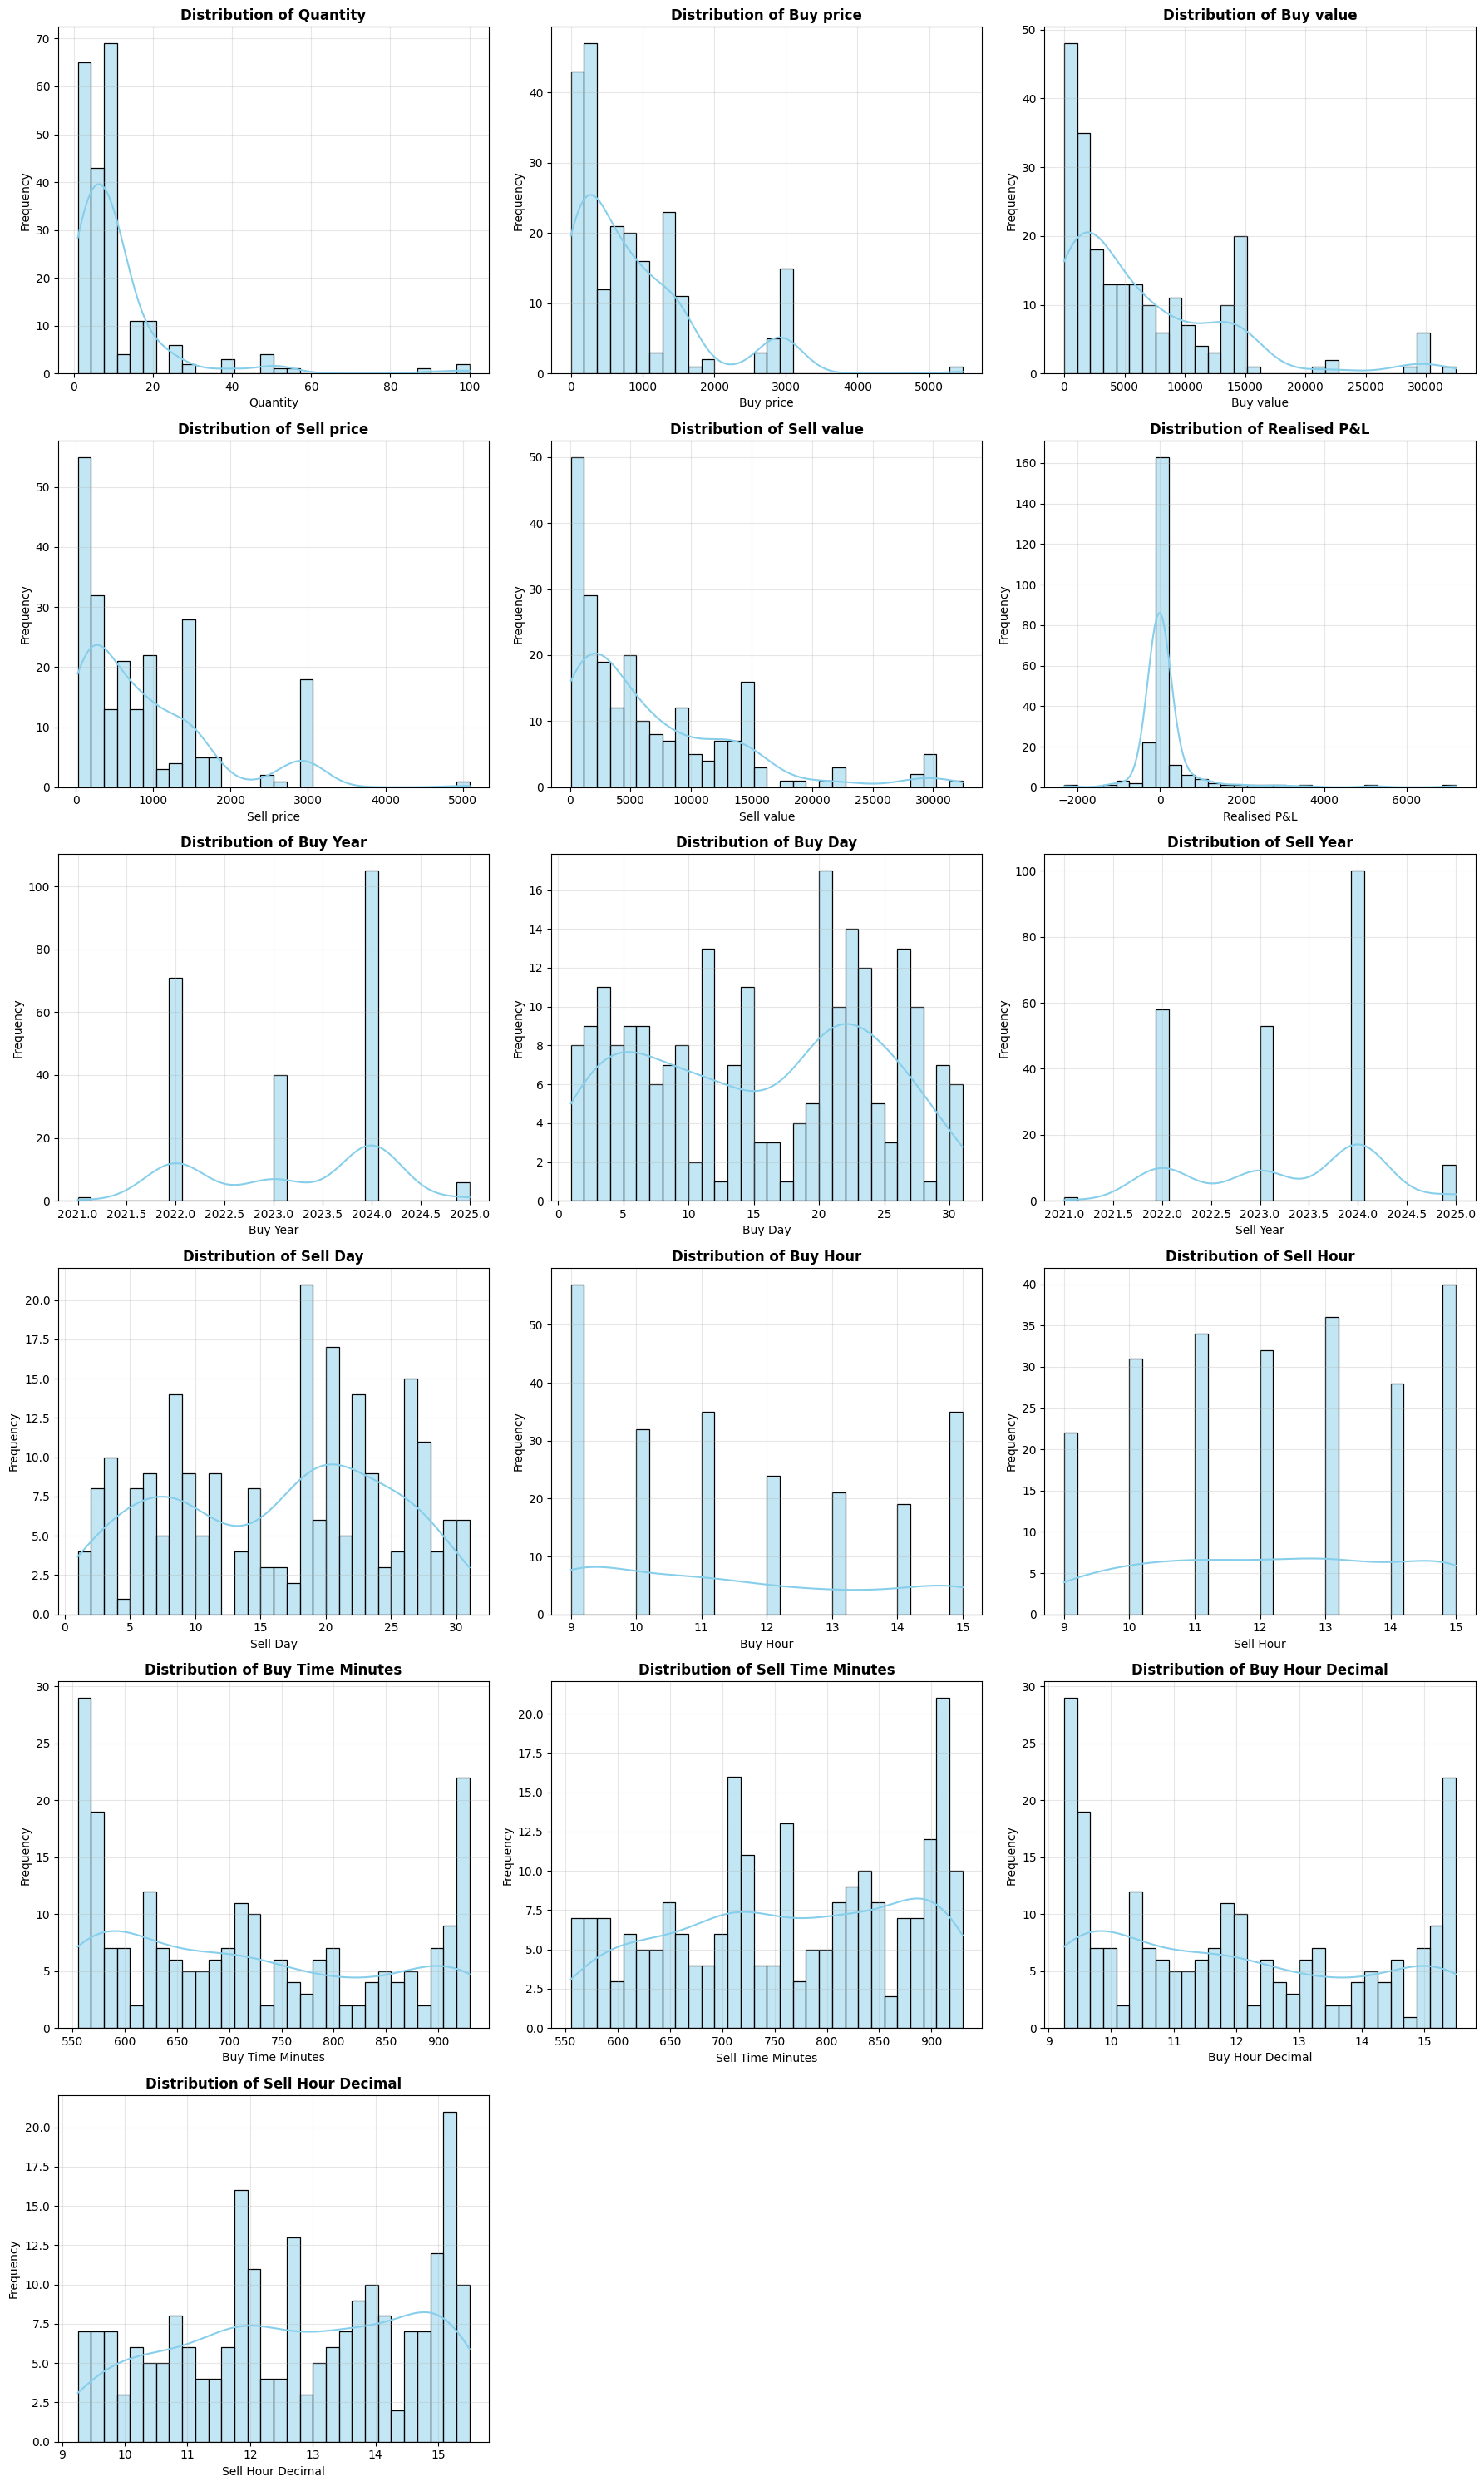

In [22]:
# Select numeric columns
numerical_cols = pnl.select_dtypes(include=['int64', 'float64']).columns

# Dynamically set rows and columns for subplot grid
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot each numeric column
for i, col in enumerate(numerical_cols):
    sns.histplot(pnl[col].dropna(), kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f"Distribution of {col}", fontsize=12, weight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(alpha=0.3)

# Remove any unused axes (in case of fewer numeric columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

These plots tells us that there are too much skewness in the numerical cols. Also explaining that there are too much correlation between the Numerical cols

Now, let's do the Univariate Analysis for the Categorical features

In [23]:
# Merging the Industry rows appearing less than 4 times
uncommon_industry = pnl['Industry'].value_counts() 
pnl['Industry'] = pnl['Industry'].replace(uncommon_industry[uncommon_industry < 4].index, 'Others')

In [24]:
# Merging the Symbols rows appearing less than 5 times
uncommon_Symbols = pnl['Symbol'].value_counts() 
pnl['Symbol'] = pnl['Symbol'].replace(uncommon_Symbols[uncommon_Symbols < 4].index, 'Others')

C:\Users\kejri\AppData\Local\Temp\ipykernel_22116\4123969910.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='pastel')
C:\Users\kejri\AppData\Local\Temp\ipykernel_22116\4123969910.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='pastel')
C:\Users\kejri\AppData\Local\Temp\ipykernel_22116\4123969910.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i]

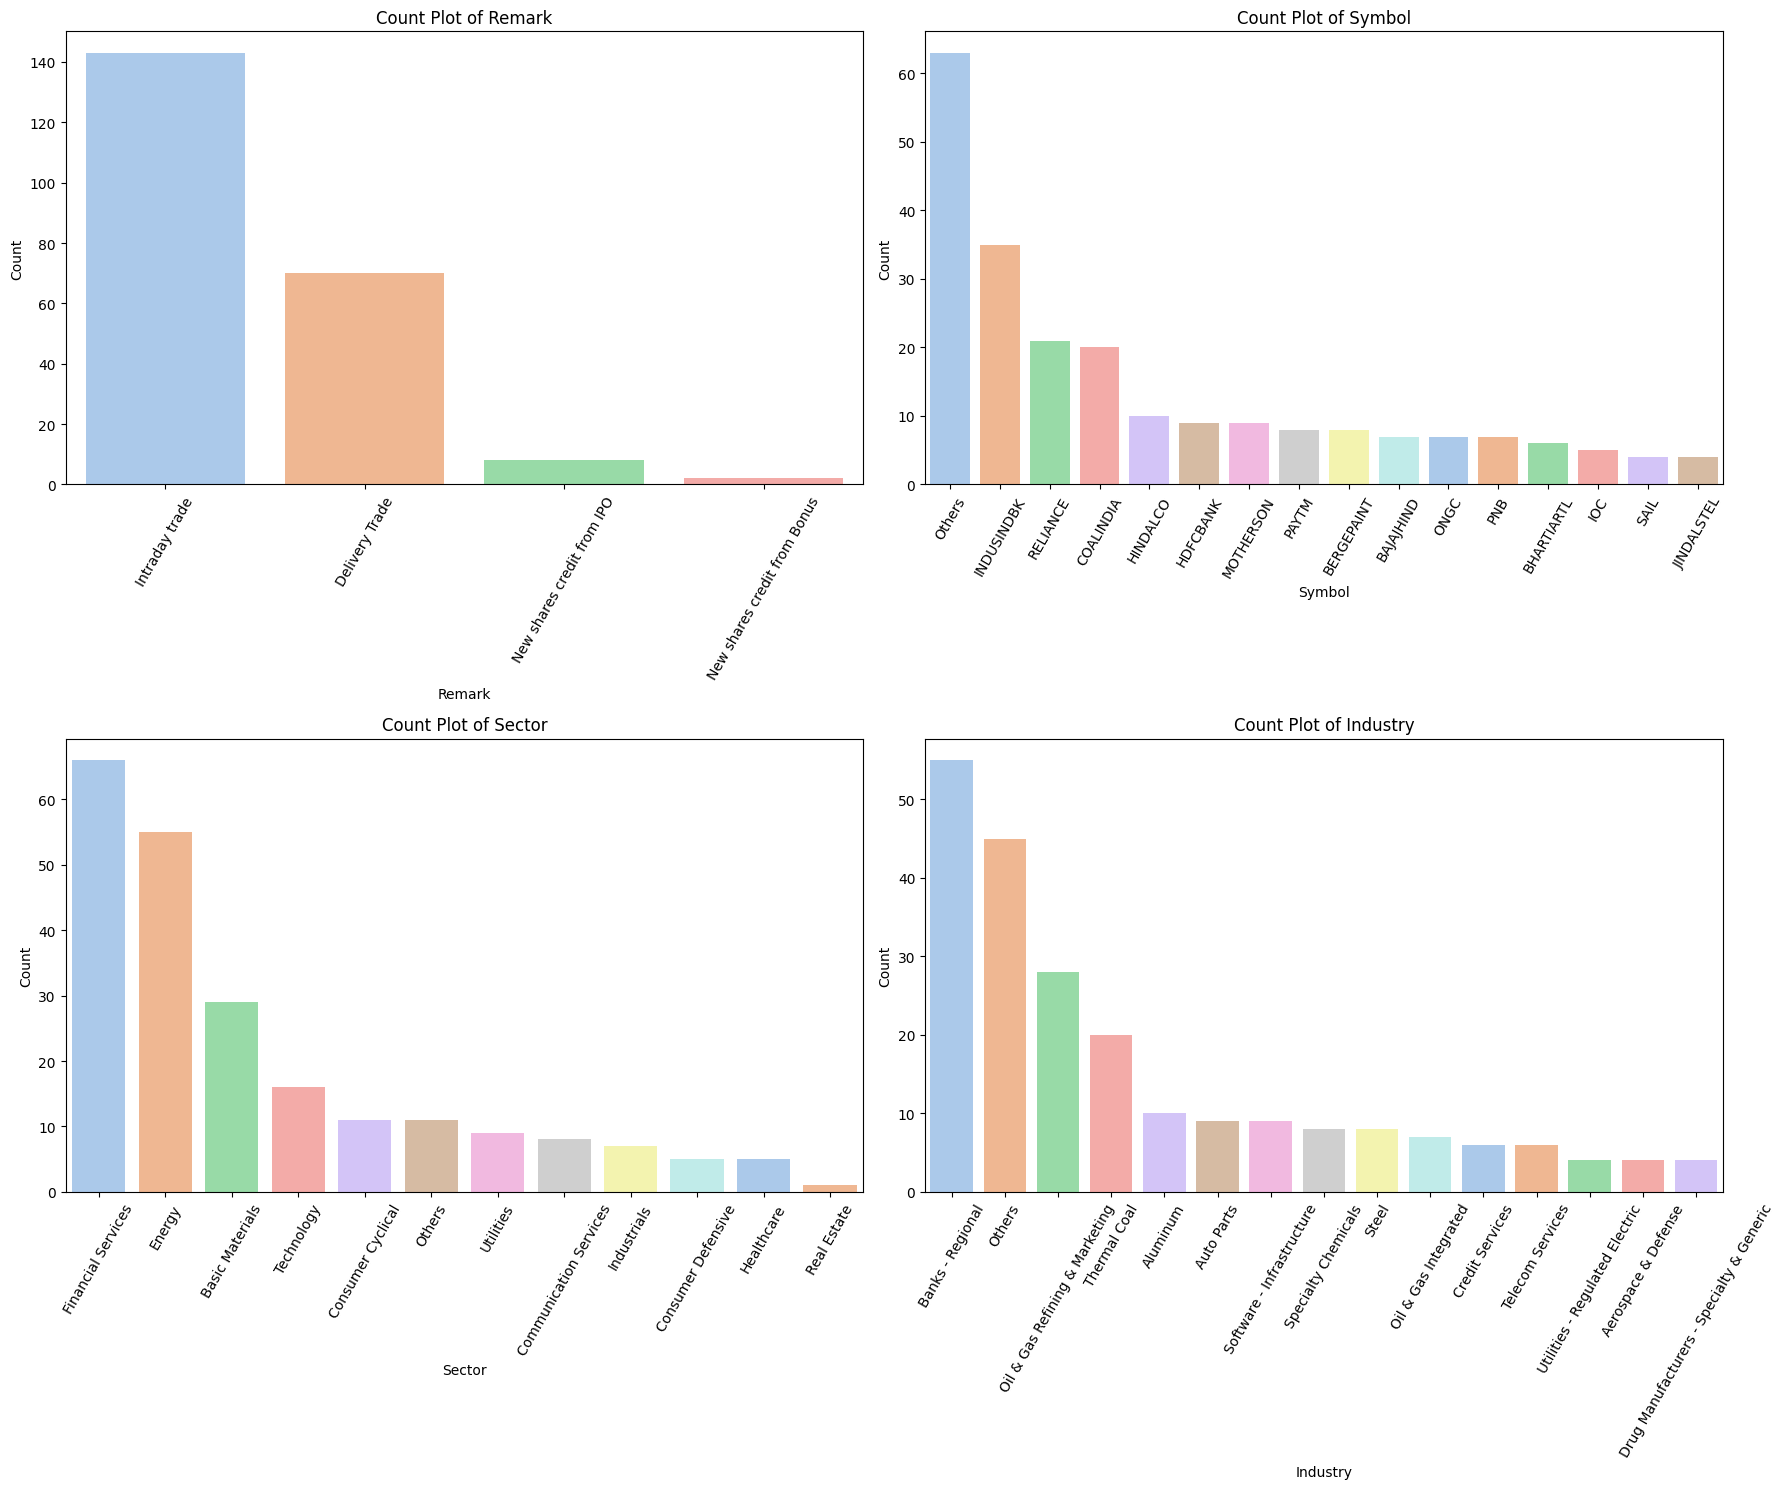

In [25]:
categorical_cols = pnl[['Remark', 'Symbol', 'Sector', 'Industry']]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each categorical column
for i, col in enumerate(categorical_cols):
    value_counts = pnl[col].value_counts().head(20)  # top 15 categories
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='pastel')
    axes[i].set_title(f"Count Plot of {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=60)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

First plot tells us that the user has traded mostly intraday then swing trades, also got lucky to get some IPO's allotment and got bonus shares for some of the holdings he had. 
Second plot tells us that user had traded different stocks while he had traded IndusInd Bank stock the most number of times. Third and Fourth plot tells us that the user had traded the stocks which comes from the different types of sectors and industry but his most traded were Financial Services and Regional Banks.

Let's plot the graph for the rest of the categorical features

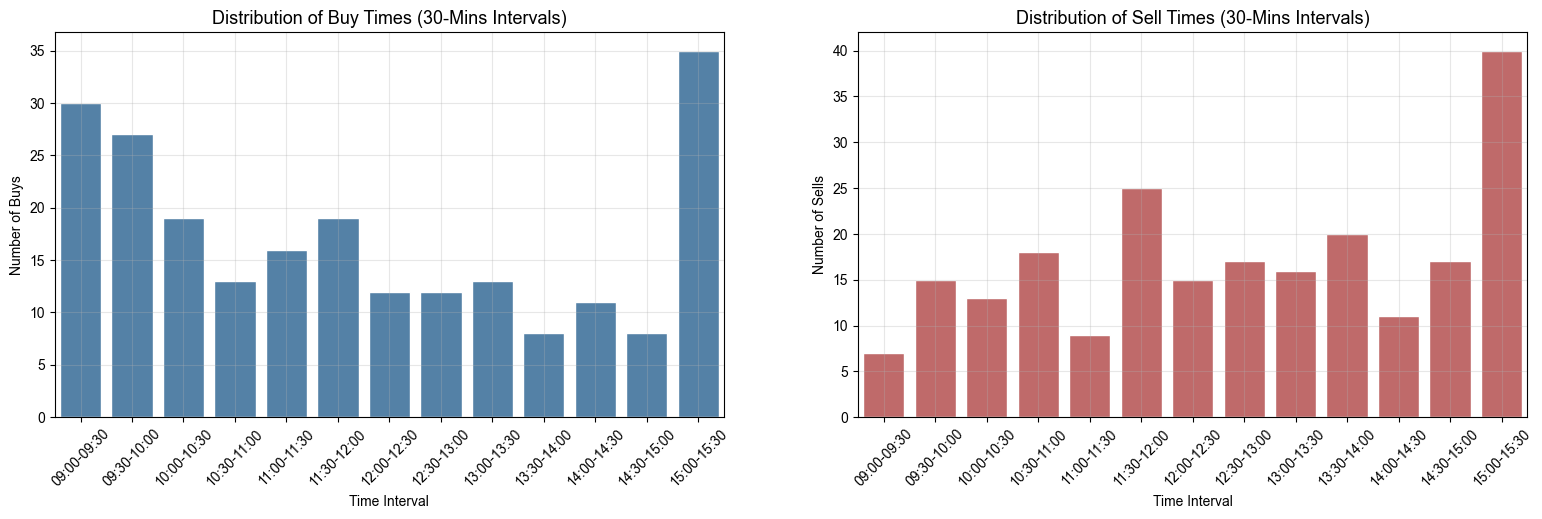

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(19, 5))
sns.set(style='whitegrid')

# Buy Time - ordered by time interval
axes[0].set_title("Distribution of Buy Times (30-Mins Intervals)", fontsize=13)
buy_time_data = pnl['Buy Interval'].value_counts().sort_index()
sns.barplot(x=buy_time_data.index, y=buy_time_data.values, ax=axes[0], color='steelblue')
axes[0].set_xlabel("Time Interval")
axes[0].set_ylabel("Number of Buys")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(alpha=0.3)

# Sell Time - ordered by time interval
axes[1].set_title("Distribution of Sell Times (30-Mins Intervals)", fontsize=13)
sell_time_data = pnl['Sell Interval'].value_counts().sort_index()
sns.barplot(x=sell_time_data.index, y=sell_time_data.values, ax=axes[1], color='indianred')
axes[1].set_xlabel("Time Interval")
axes[1].set_ylabel("Number of Sells")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(alpha=0.3)

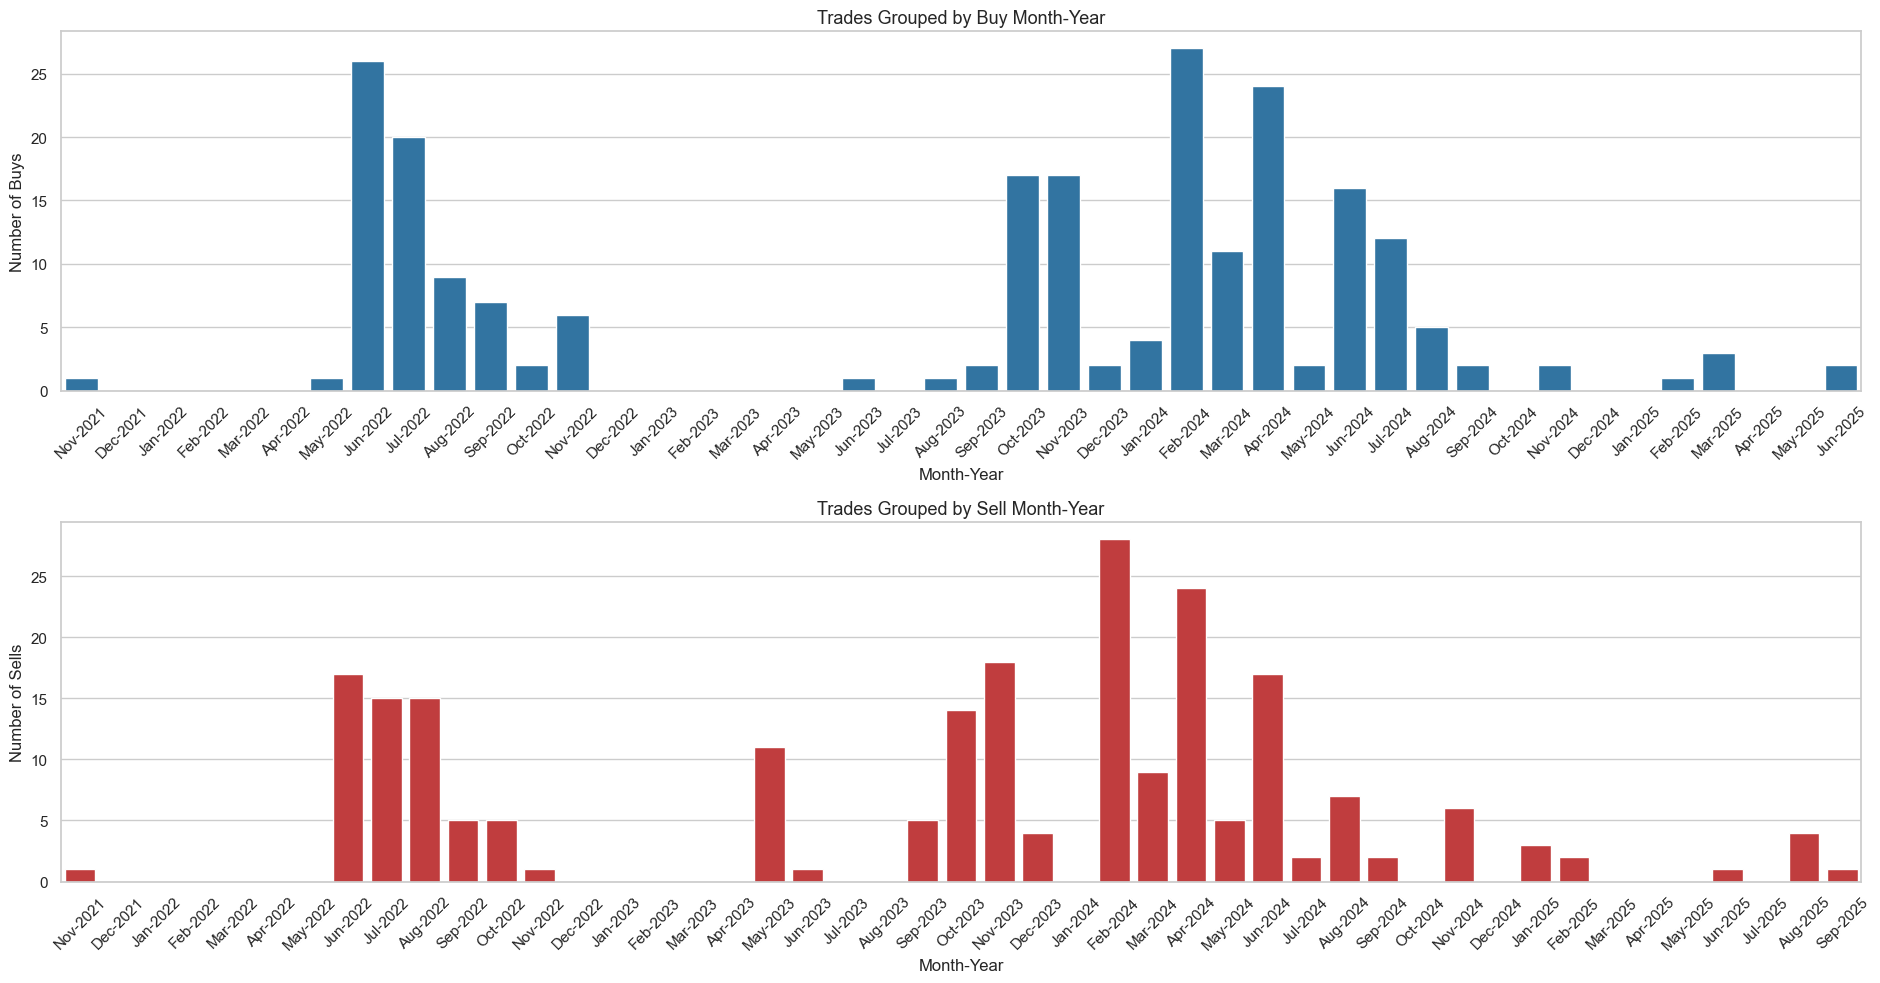

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(19, 10))
sns.set(style='whitegrid')

# Buy Month-Year trades with all months filled
axes[0].set_title("Trades Grouped by Buy Month-Year", fontsize=13)
pnl['Buy Month-Year'] = pnl['Buy Month'] + '-' + pnl['Buy Year'].astype(str)
min_date = pd.to_datetime(pnl['Buy Month-Year'], format='%b-%Y').min()
max_date = pd.to_datetime(pnl['Buy Month-Year'], format='%b-%Y').max()
all_months_buy = pd.date_range(start=min_date, end=max_date, freq='MS').strftime('%b-%Y')
buy_month_year_data = pnl['Buy Month-Year'].value_counts().reindex(all_months_buy, fill_value=0)
sns.barplot(x=buy_month_year_data.index, y=buy_month_year_data.values, ax=axes[0], color='#1f77b4')
axes[0].set_xlabel("Month-Year")
axes[0].set_ylabel("Number of Buys")
axes[0].tick_params(axis='x', rotation=45)

# Sell Month-Year trades with all months filled
axes[1].set_title("Trades Grouped by Sell Month-Year", fontsize=13)
pnl['Sell Month-Year'] = pnl['Sell Month'] + '-' + pnl['Sell Year'].astype(str)
min_date = pd.to_datetime(pnl['Sell Month-Year'], format='%b-%Y').min()
max_date = pd.to_datetime(pnl['Sell Month-Year'], format='%b-%Y').max()
all_months_sell = pd.date_range(start=min_date, end=max_date, freq='MS').strftime('%b-%Y')
sell_month_year_data = pnl['Sell Month-Year'].value_counts().reindex(all_months_sell, fill_value=0)
sns.barplot(x=sell_month_year_data.index, y=sell_month_year_data.values, ax=axes[1], color='#d62728')
axes[1].set_xlabel("Month-Year")
axes[1].set_ylabel("Number of Sells")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

These Plots tells us that the user had buy the most number of the stocks in the first hour of the day and sell stocks in the last hour of the day while also says that the user was trading from the Nov,21 but were mostly active between the June,22 to Sept,22 and Oct,23 to July,24 telling that he is not focused properly or gets unactive after huge losses and also he had taken some gaps between the months were he was completely unactive.

2. Bivariate Analysis

Now, let's do the bivariate analysis. Starting with the plots between the Numerical vs Numerical features

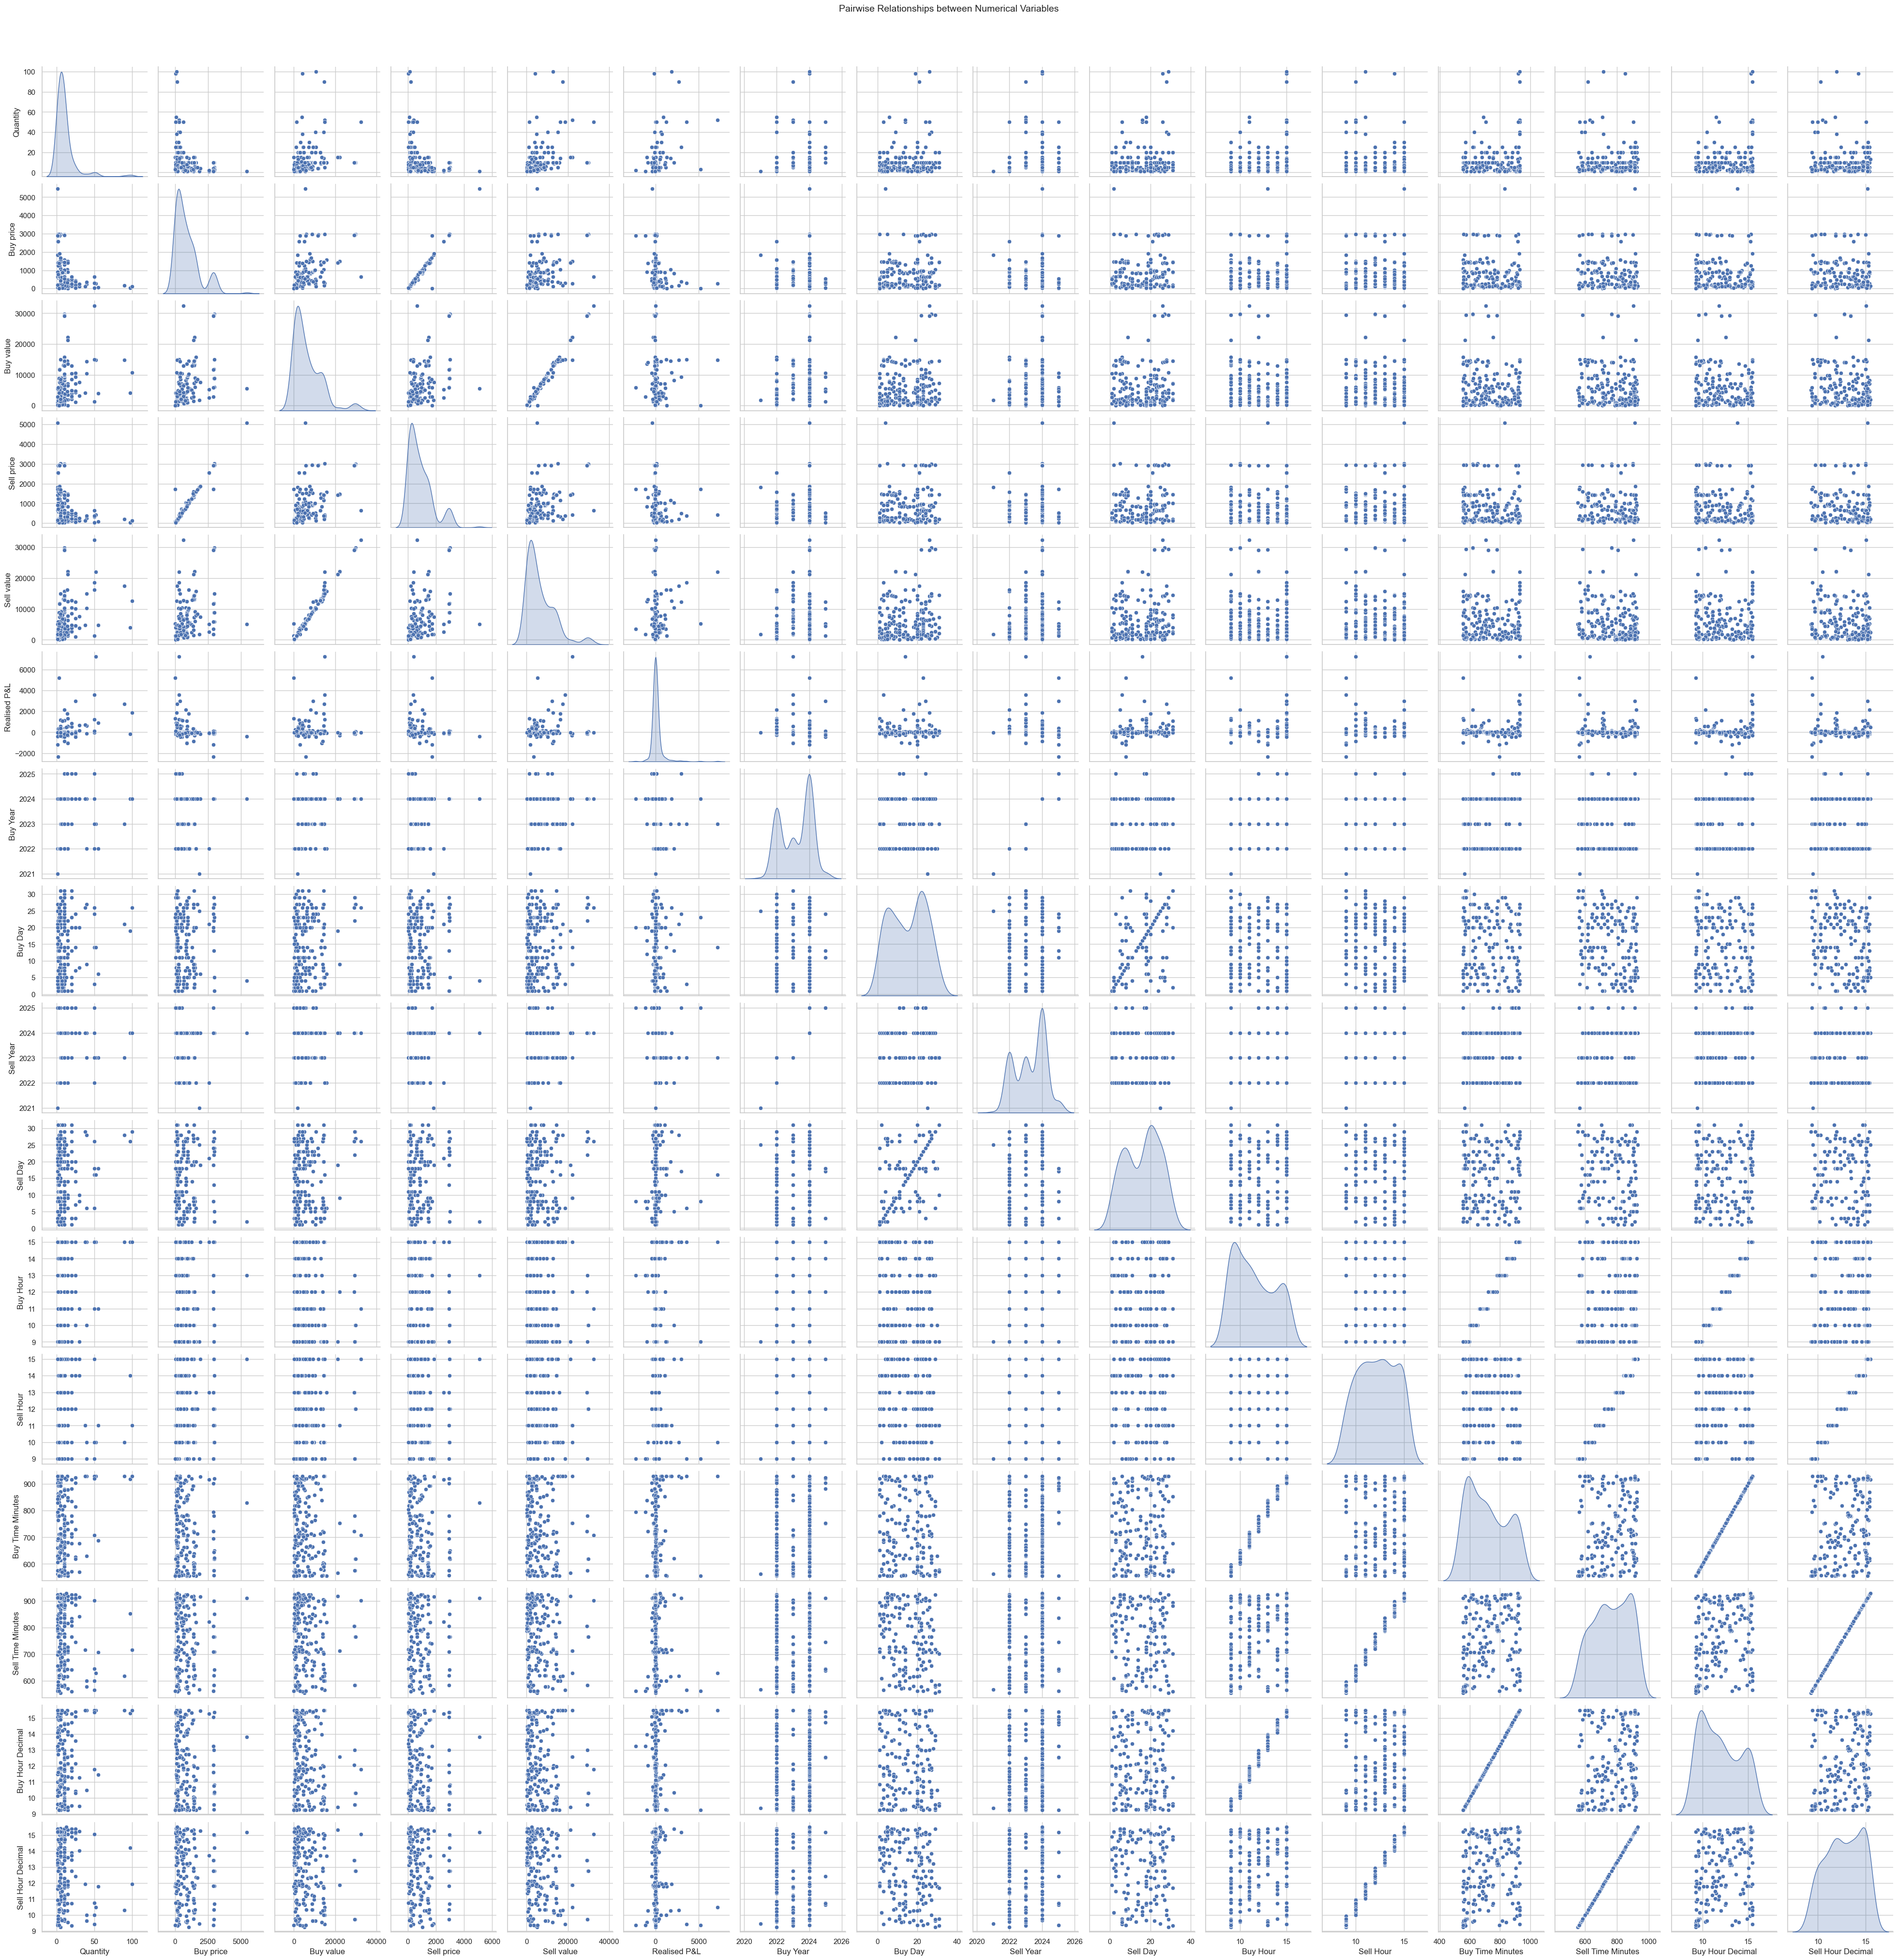

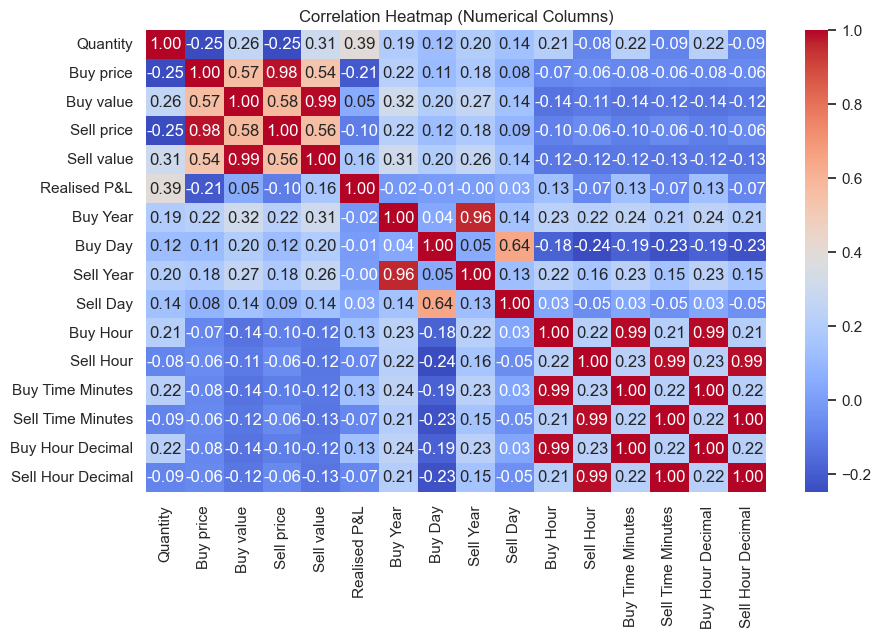

In [28]:
# Pairplot for all numerical features
sns.pairplot(pnl[numerical_cols], diag_kind='kde', corner=False)
plt.suptitle("Pairwise Relationships between Numerical Variables", y=1.02, fontsize=14)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pnl[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Columns)")
plt.show()

---------Plots between Numerical vs Categorical features

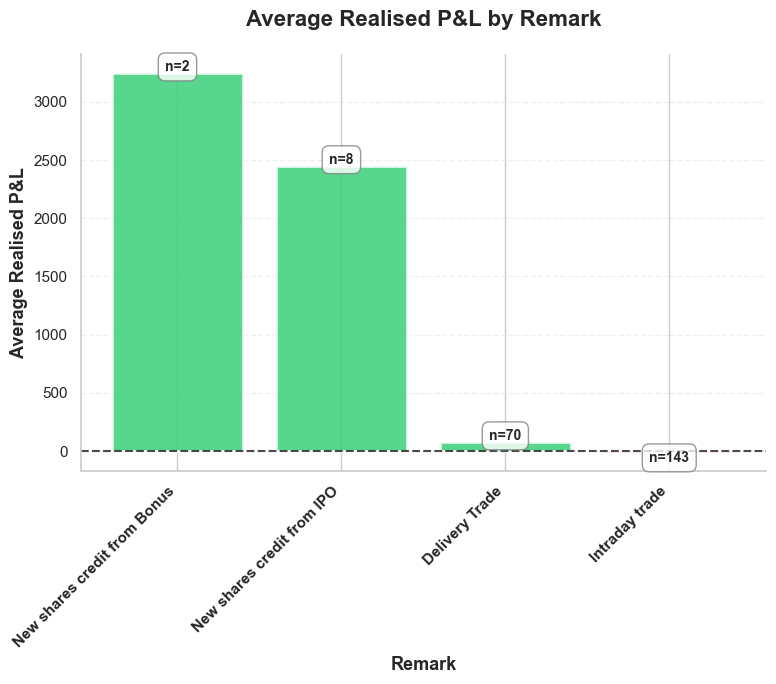

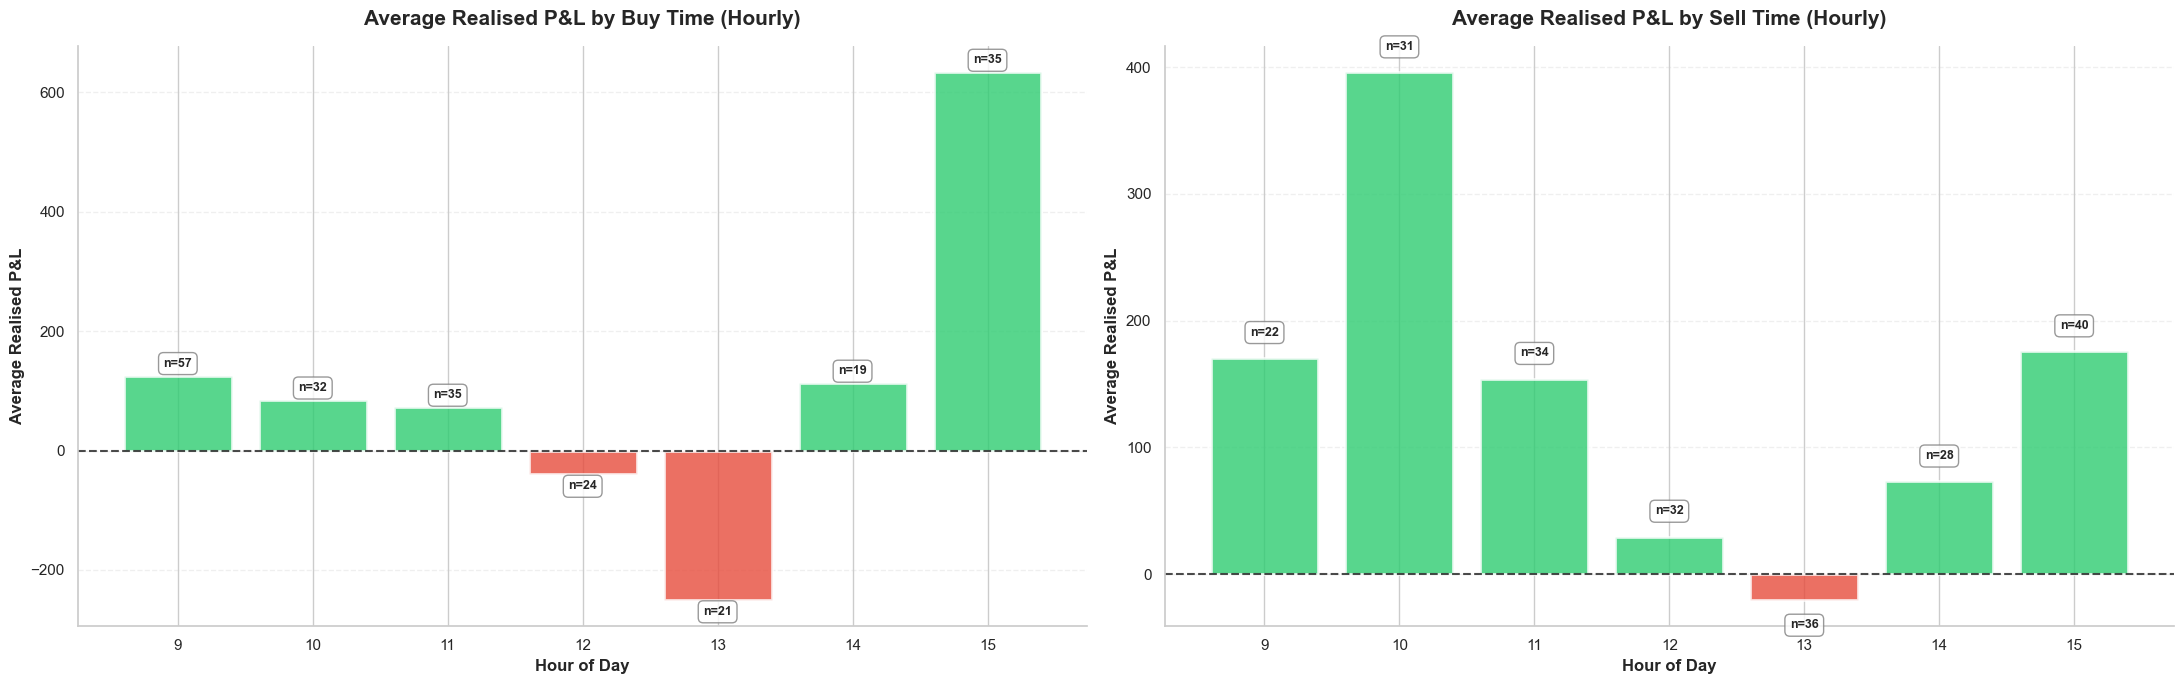

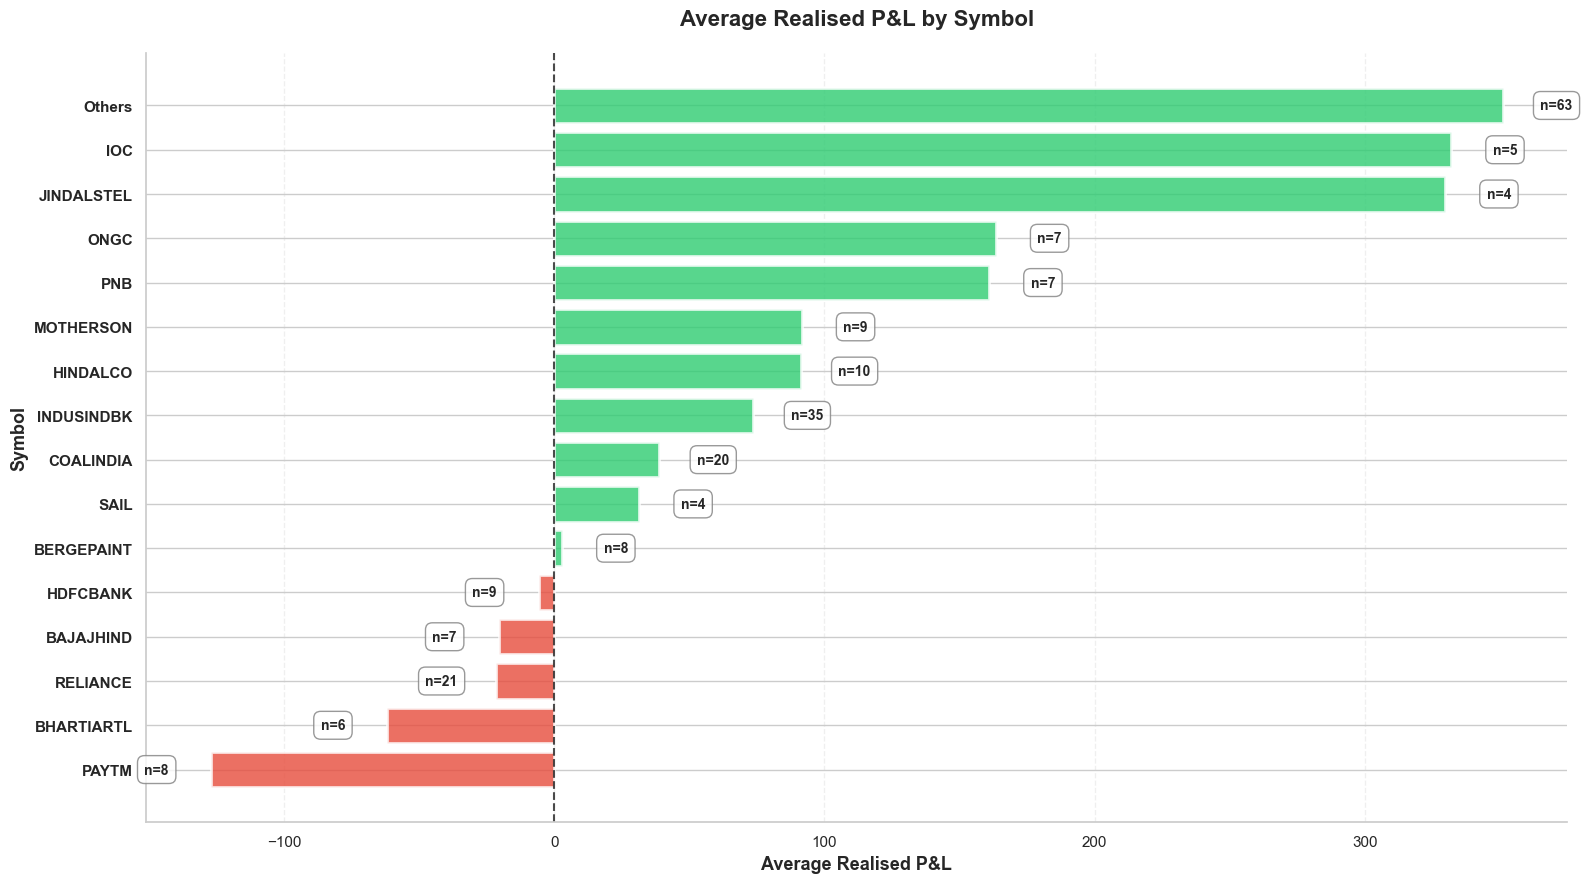

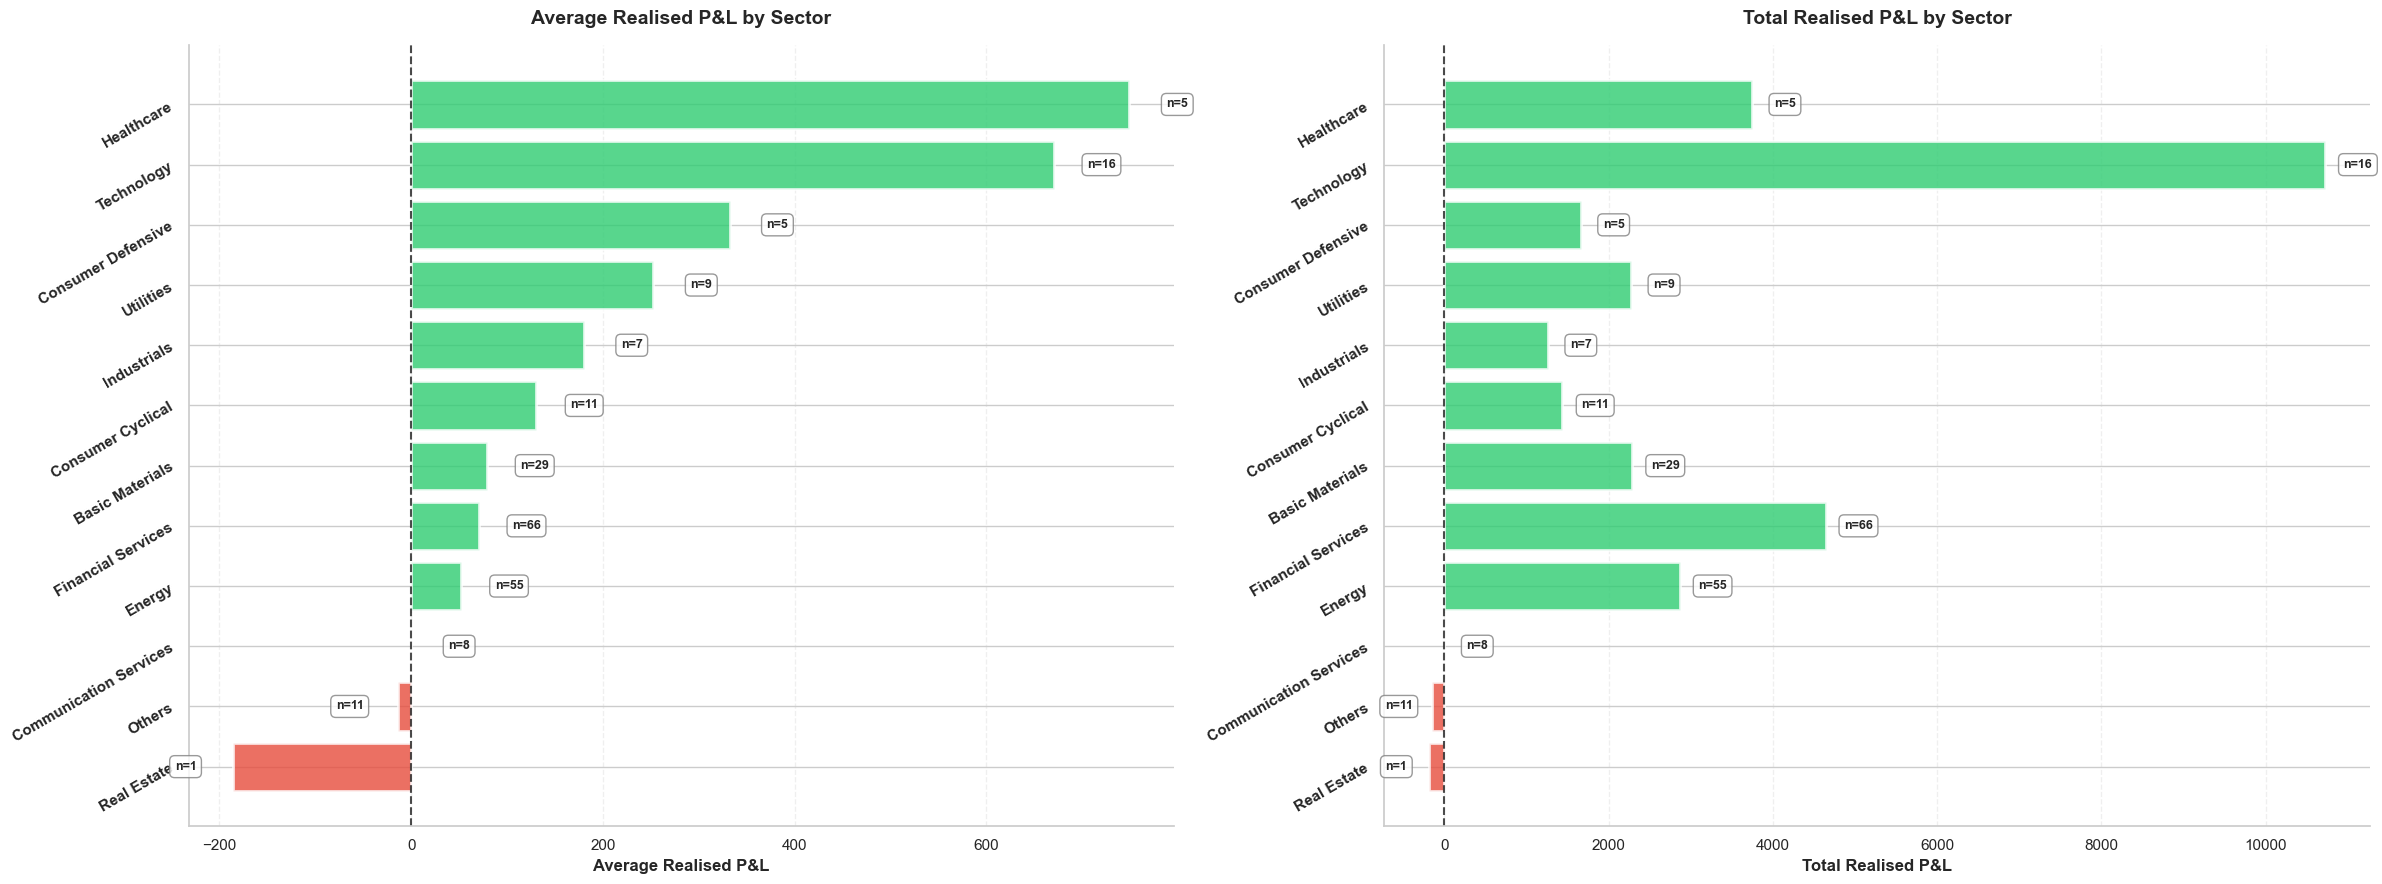

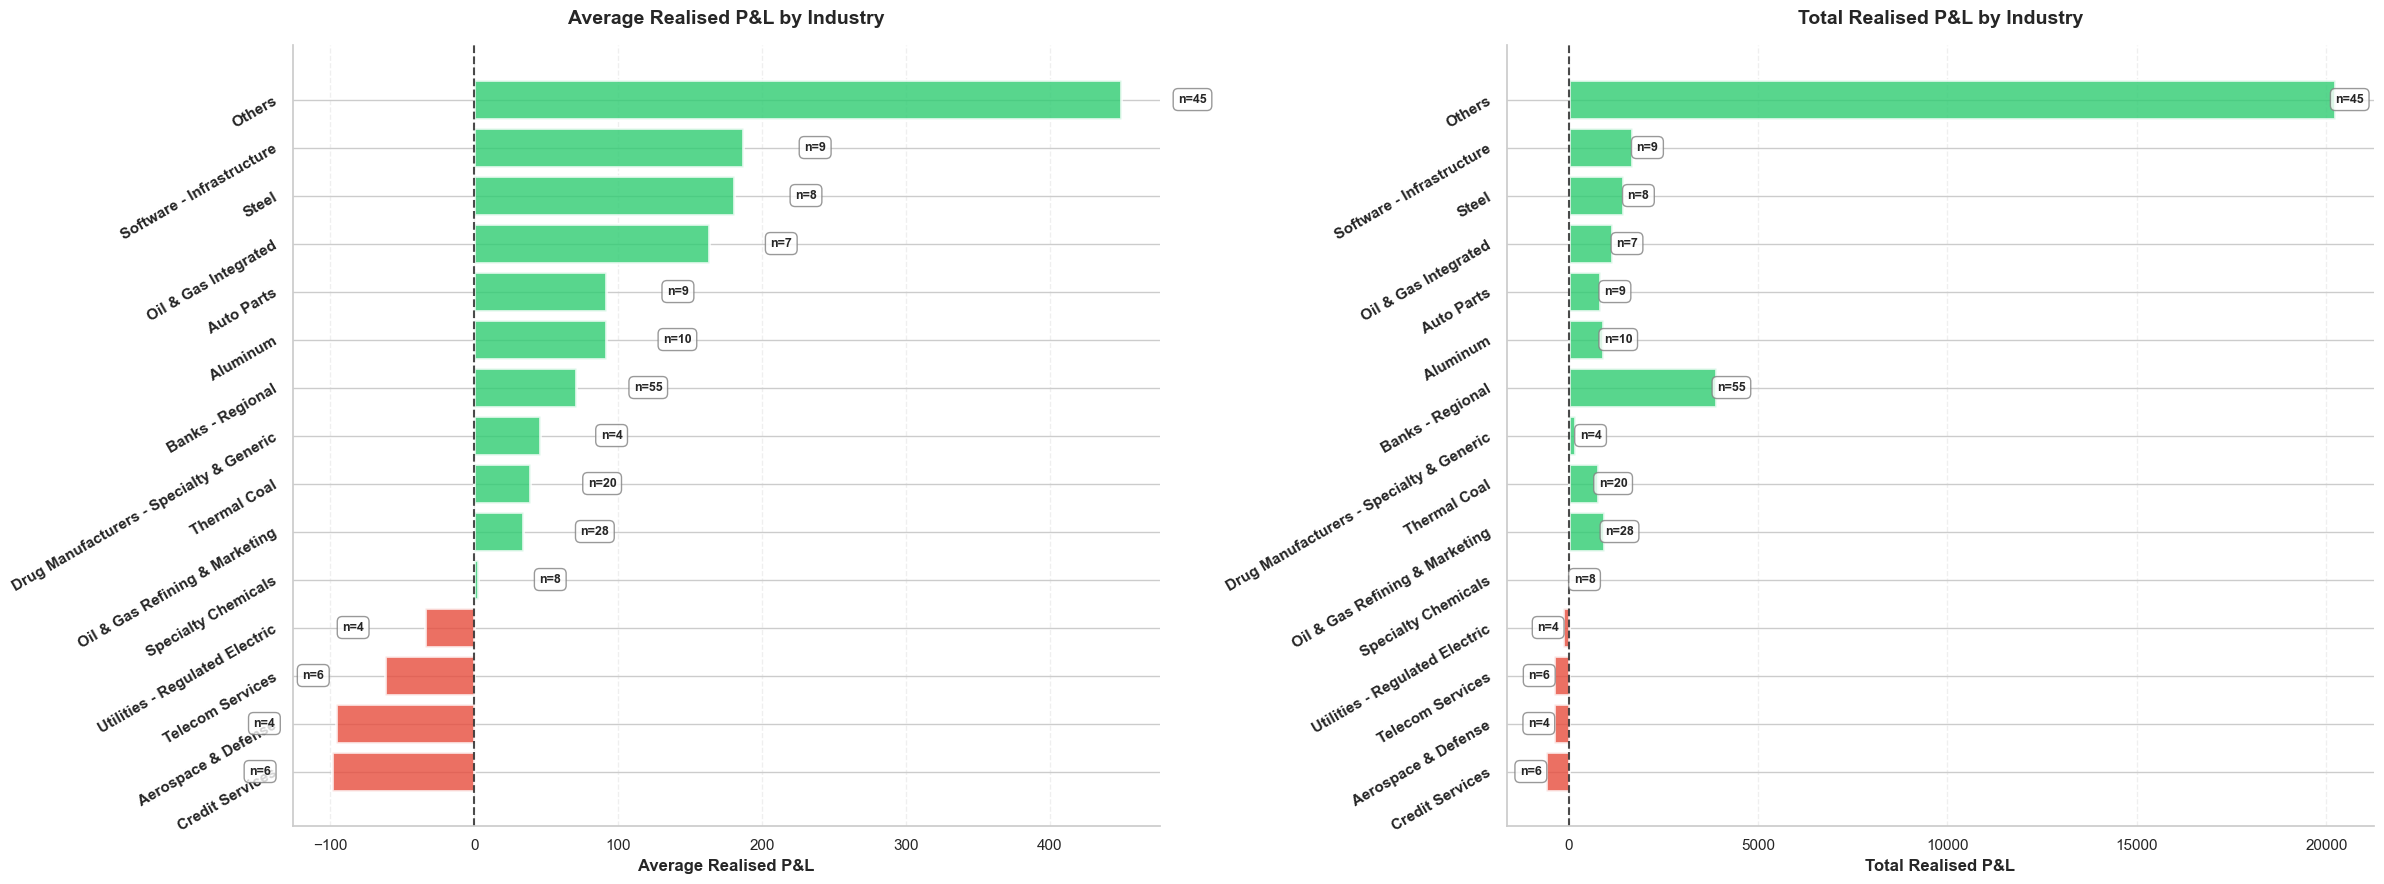

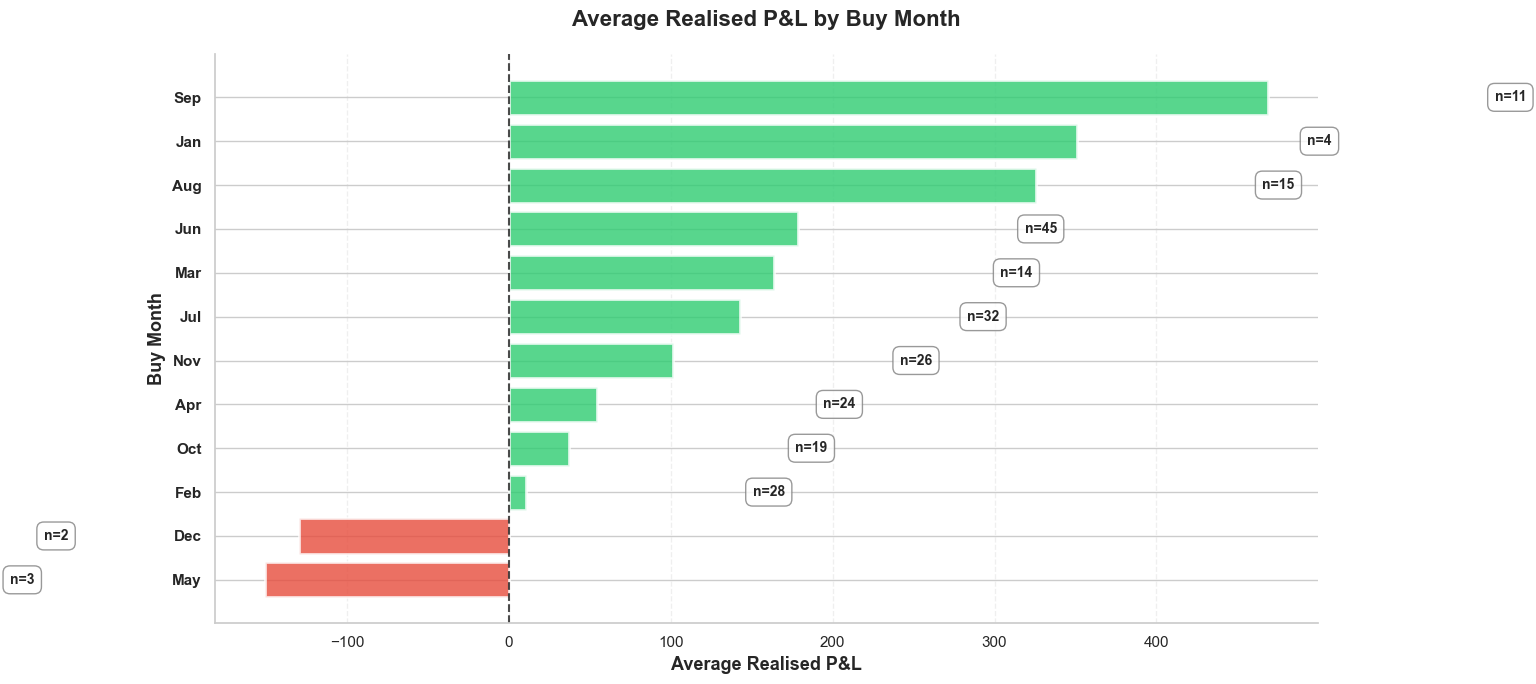

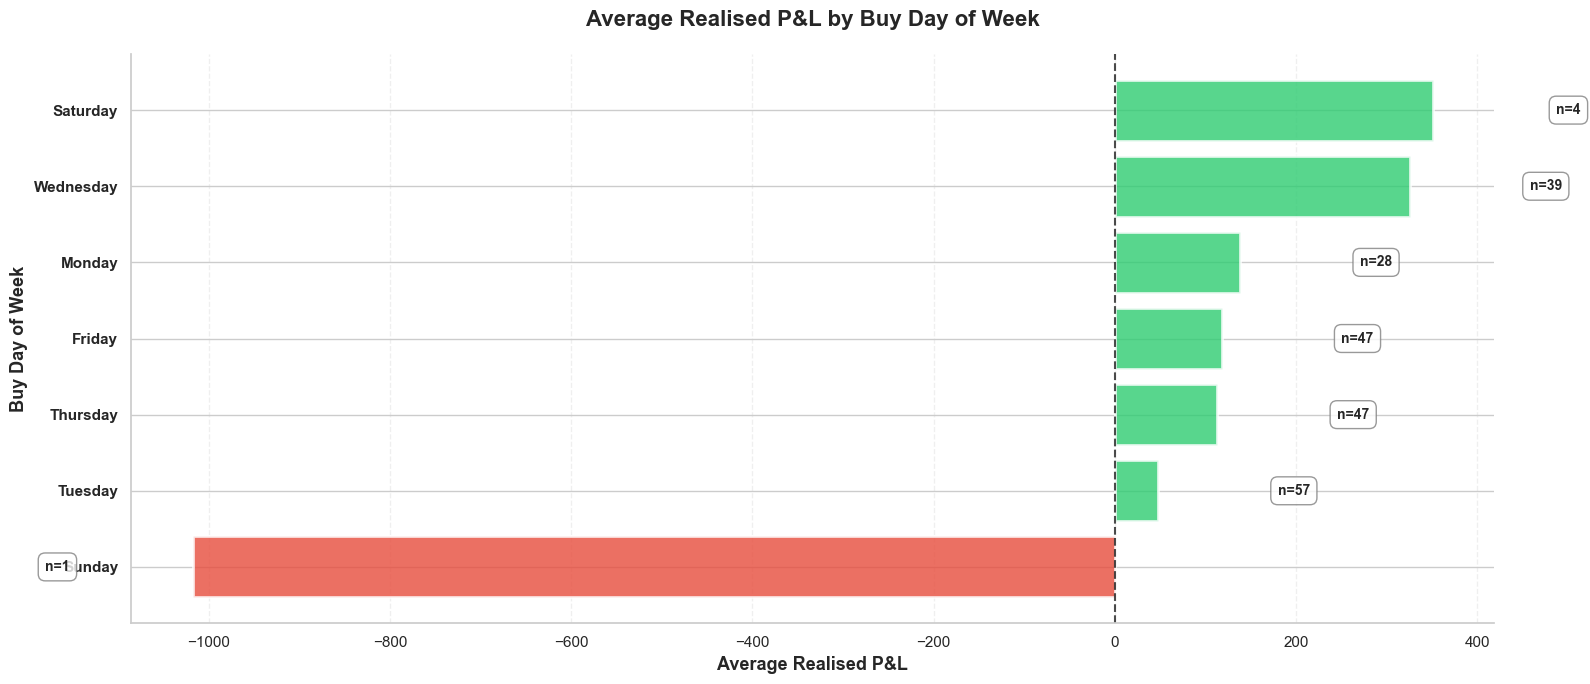

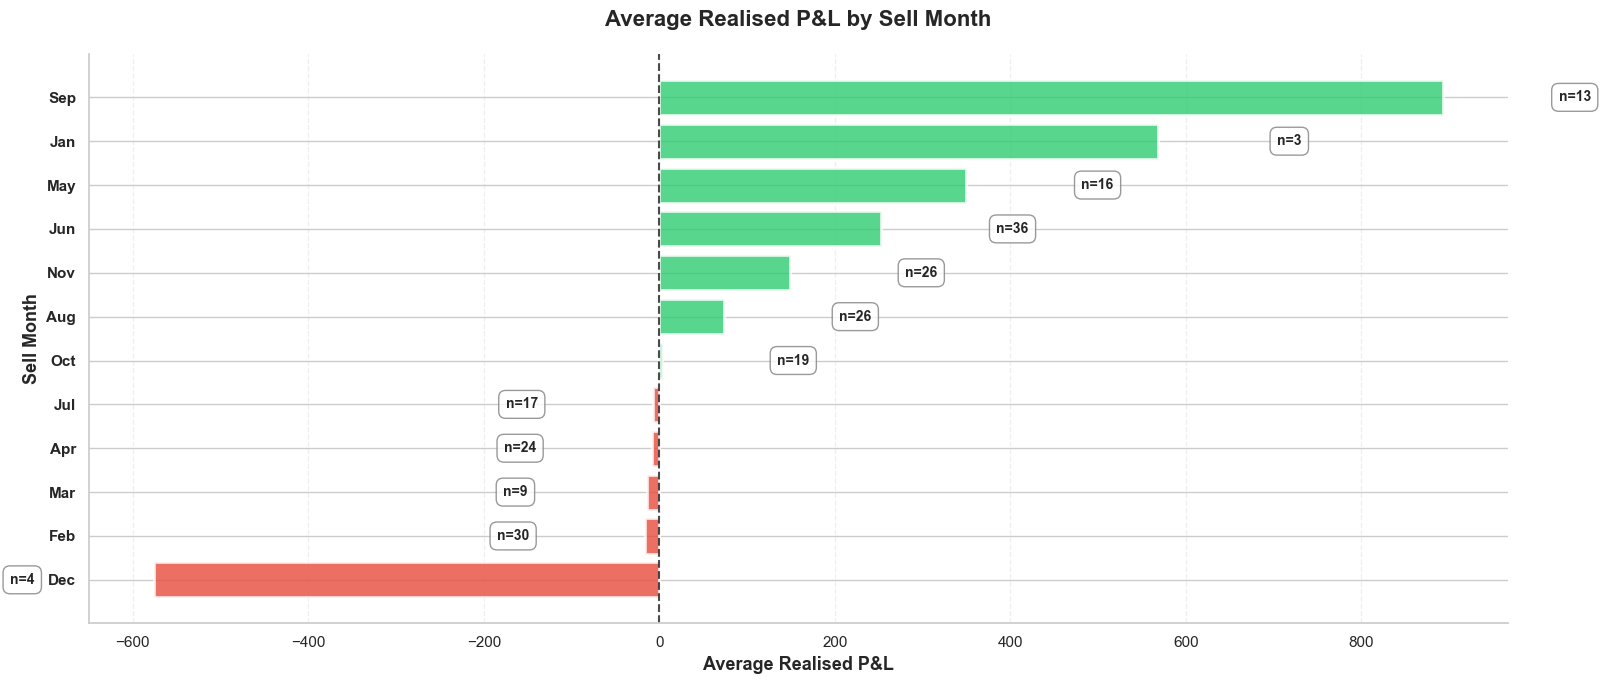

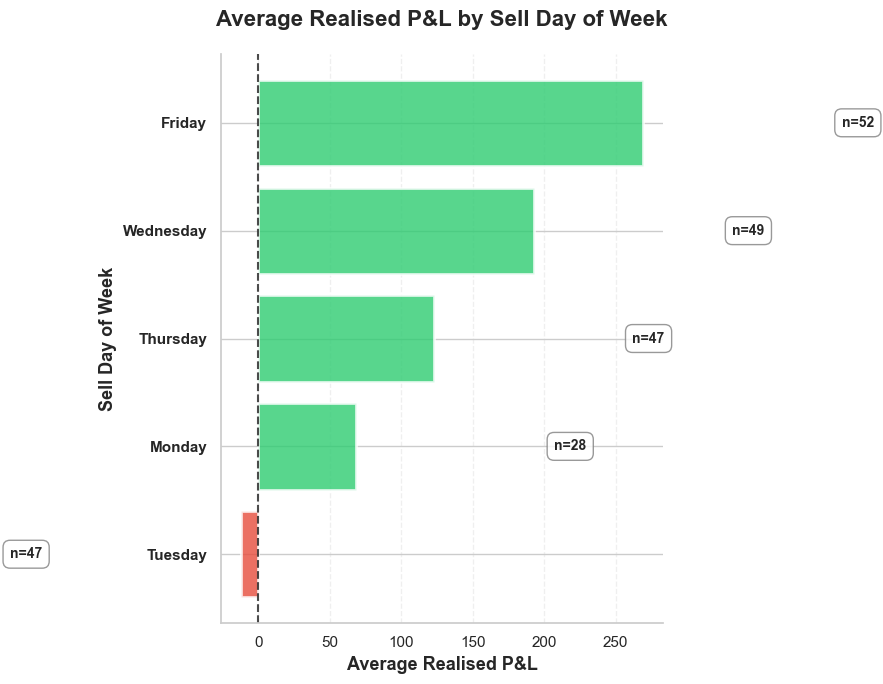

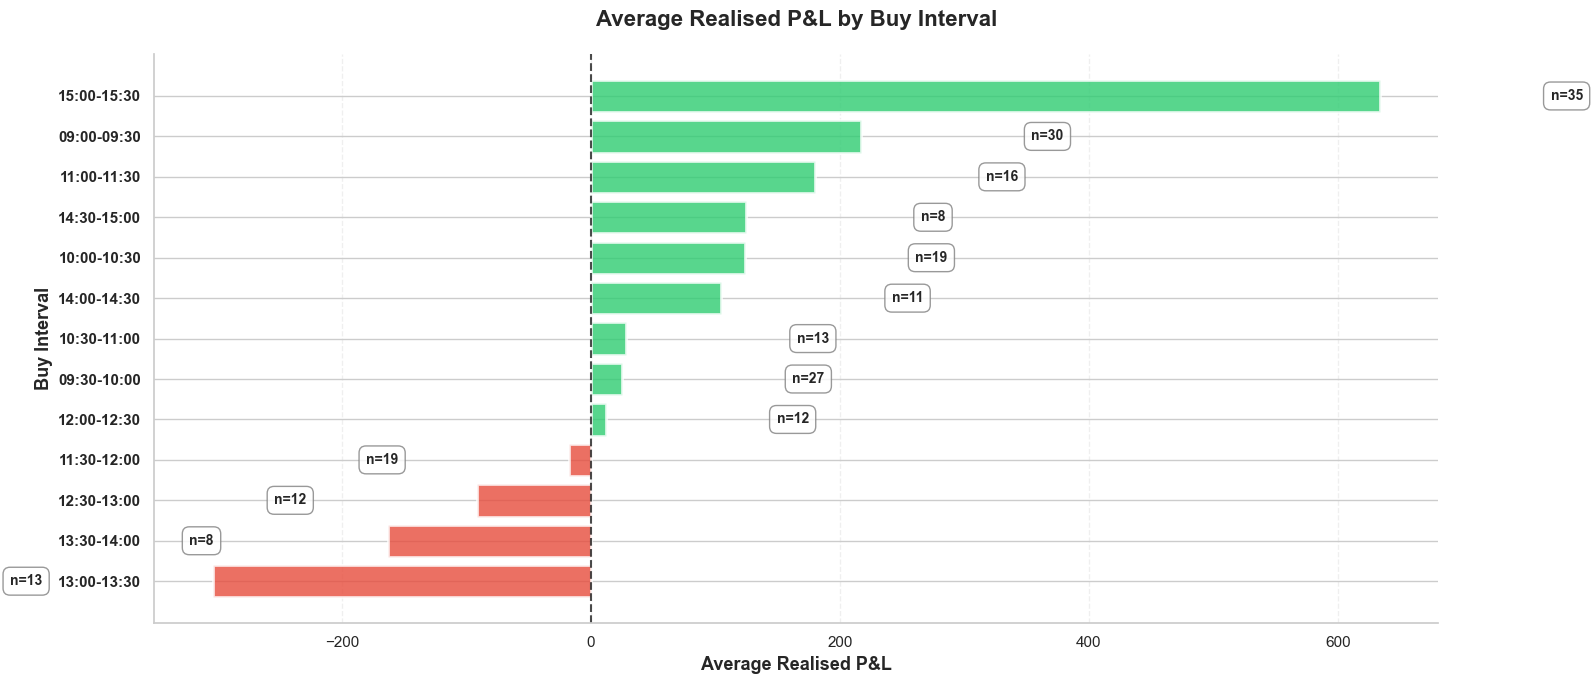

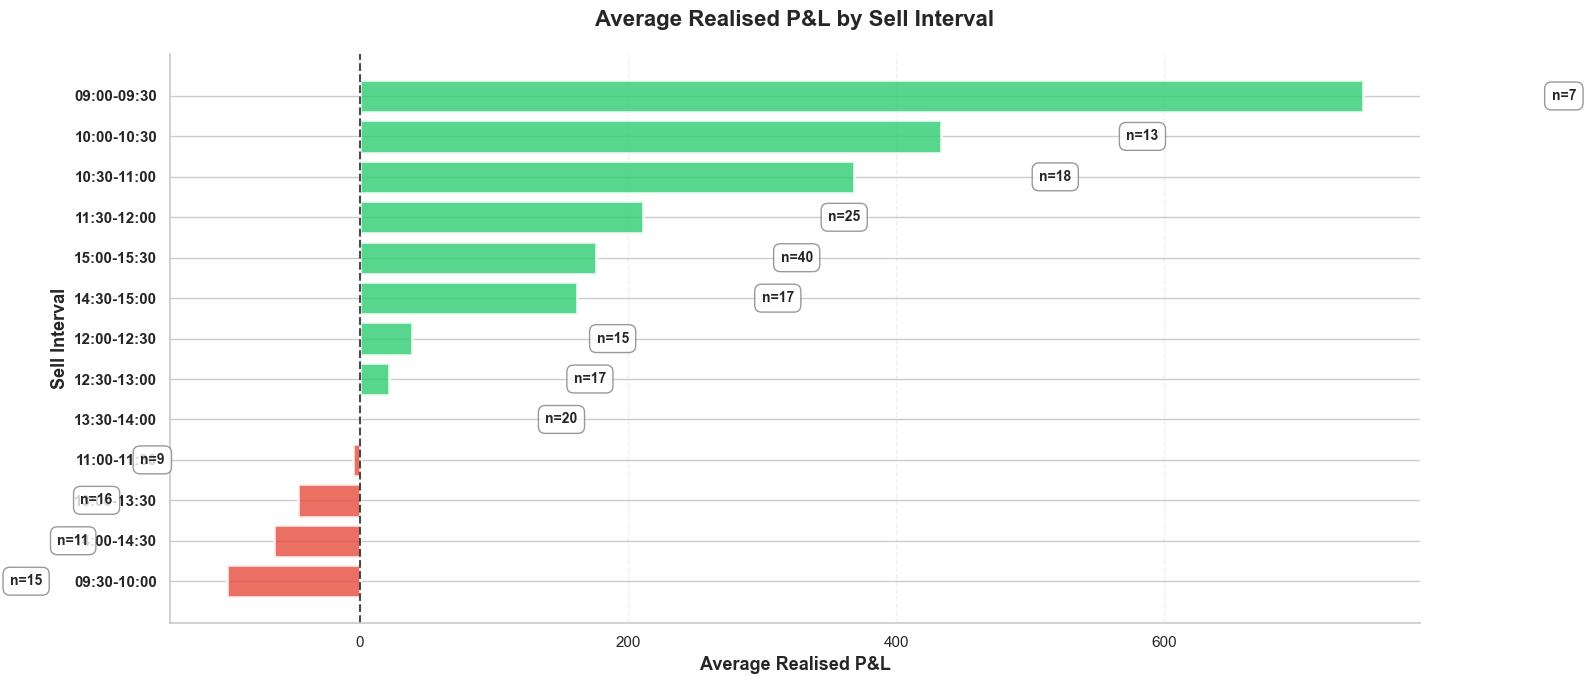

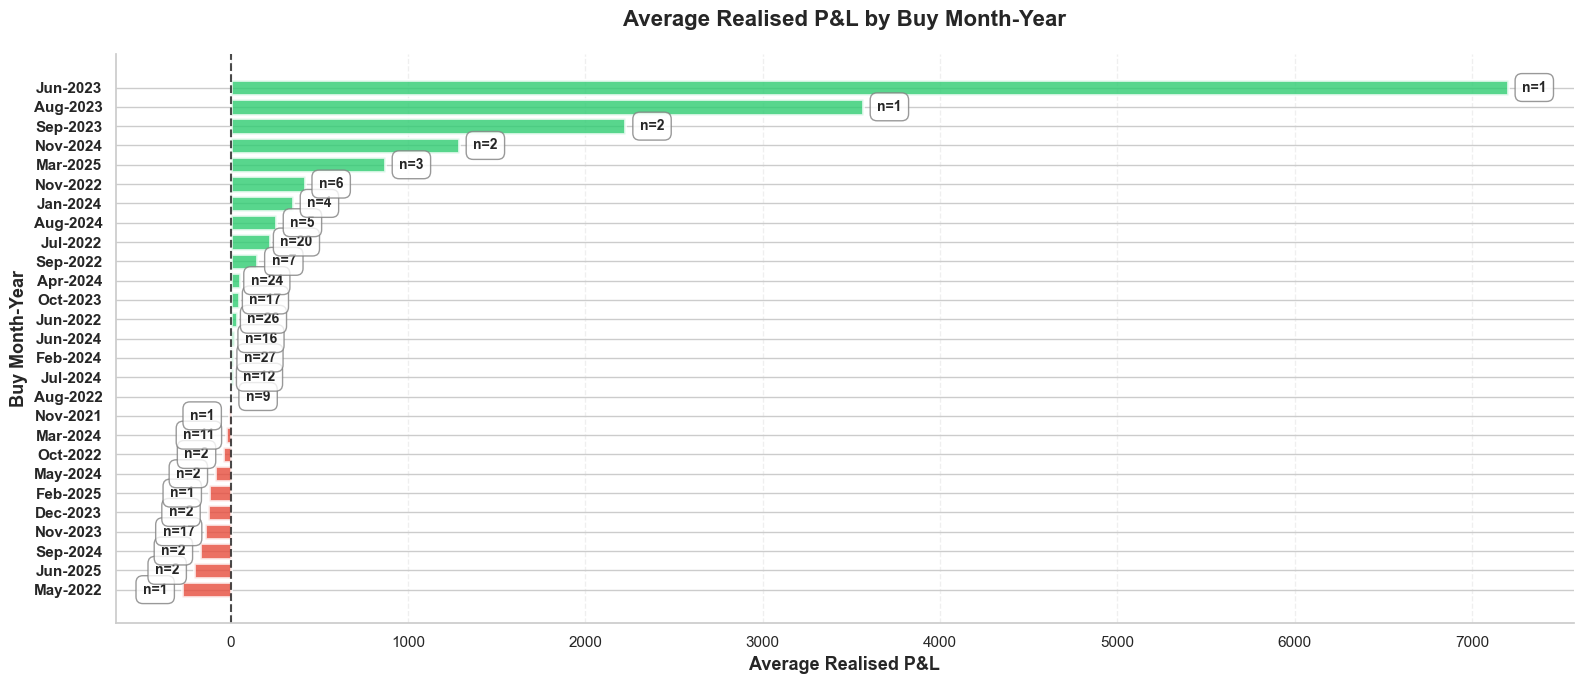

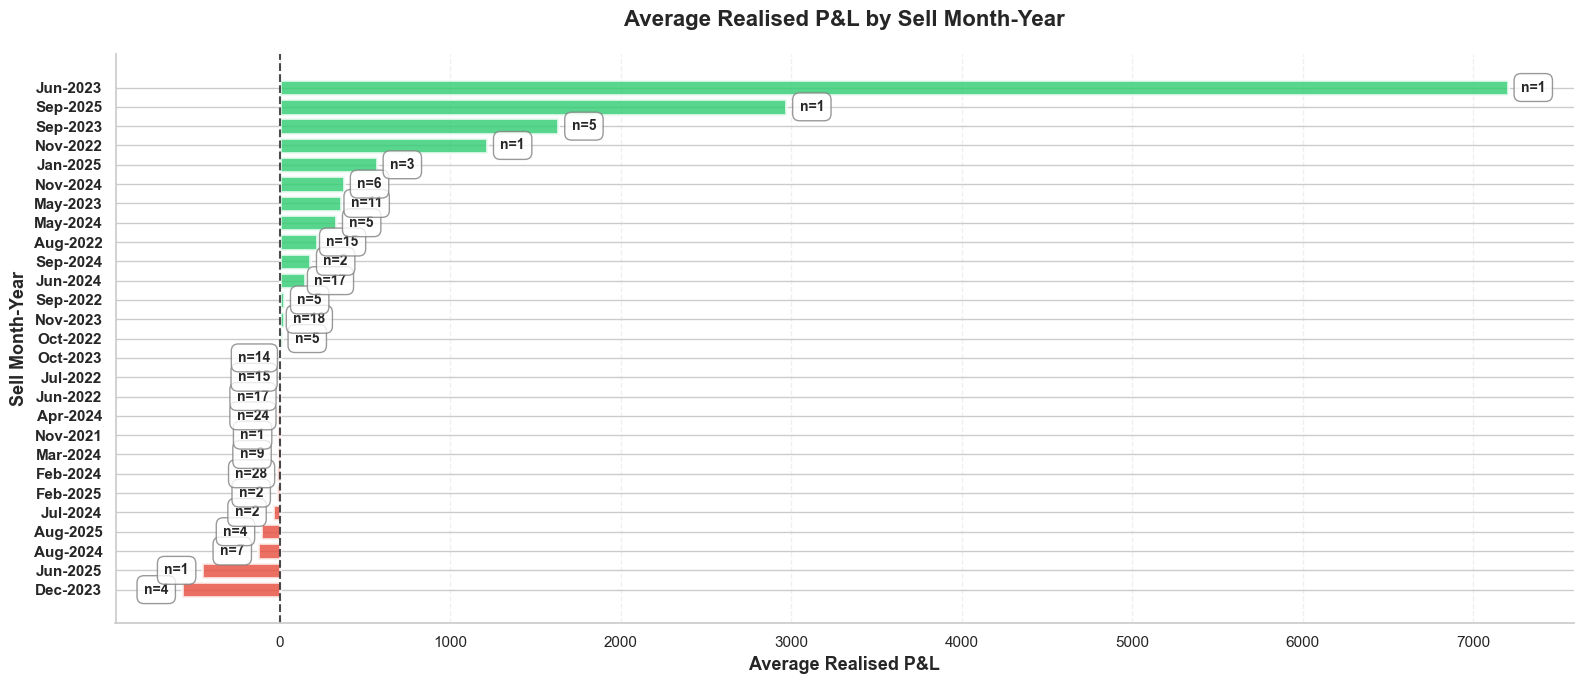

In [29]:
categorical_cols = pnl.select_dtypes(include=['object']).columns
categorical_cols_drop = categorical_cols.drop(['ISIN', 'Stock name', 'Buy date', 'Sell date'])
target = 'Realised P&L'

if target not in pnl.columns:
    print("Target column 'Realised P&L' not found — skipping plots.")
else:
    for col in categorical_cols_drop:
        n_unique = pnl[col].nunique()
        
        if col in ['Buy Time', 'Sell Time']:
            if col == 'Buy Time':
                fig, axes = plt.subplots(1, 2, figsize=(22, 7))
                
                for idx, time_col in enumerate(['Buy Time', 'Sell Time']):
                    pnl_time = pnl.copy()
                    pnl_time[f'{time_col}_Hour'] = pd.to_datetime(pnl_time[time_col], 
                                                                   format='%H:%M:%S', errors='coerce').dt.hour
                    
                    hourly_data = pnl_time.groupby(f'{time_col}_Hour')[target].agg(['mean', 'count']).reset_index()
                    hourly_data = hourly_data.sort_values(f'{time_col}_Hour')
                    
                    colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in hourly_data['mean']]
                    
                    axes[idx].bar(hourly_data[f'{time_col}_Hour'], hourly_data['mean'], 
                                 color=colors, alpha=0.8, edgecolor='white', linewidth=2)
                    axes[idx].set_title(f"Average {target} by {time_col} (Hourly)", 
                                       fontsize=15, fontweight='bold', pad=15)
                    axes[idx].set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
                    axes[idx].set_ylabel(f'Average {target}', fontsize=12, fontweight='bold')
                    axes[idx].axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
                    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
                    axes[idx].spines['top'].set_visible(False)
                    axes[idx].spines['right'].set_visible(False)
                    axes[idx].set_xticks(hourly_data[f'{time_col}_Hour'])
                    
                    for i, row in hourly_data.iterrows():
                        offset = 20 if row['mean'] > 0 else -20
                        axes[idx].text(row[f'{time_col}_Hour'], row['mean'] + offset, 
                                      f"n={int(row['count'])}", 
                                      ha='center', va='center', fontsize=9, fontweight='bold',
                                      bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                                               edgecolor='gray', alpha=0.8))
                
                plt.tight_layout()
                plt.show()
        
        elif col == 'Symbol':
            fig, ax = plt.subplots(figsize=(16, 9))
            stats = pnl.groupby(col)[target].agg(['mean', 'count']).reset_index()
            stats = stats.sort_values('mean', ascending=True)
            
            colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in stats['mean']]
            
            bars = ax.barh(range(len(stats)), stats['mean'], color=colors, alpha=0.8, 
                          edgecolor='white', linewidth=2)
            
            ax.set_yticks(range(len(stats)))
            ax.set_yticklabels(stats[col], fontsize=11, fontweight='bold')
            ax.set_title(f'Average {target} by {col}', fontsize=16, fontweight='bold', pad=20)
            ax.set_xlabel(f'Average {target}', fontsize=13, fontweight='bold')
            ax.set_ylabel(col, fontsize=13, fontweight='bold')
            ax.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.grid(axis='x', alpha=0.3, linestyle='--')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            
            for i, (idx, row) in enumerate(stats.iterrows()):
                offset = 20 if row['mean'] > 0 else -20
                ax.text(row['mean'] + offset, i, f"n={int(row['count'])}", 
                       va='center', ha='center', fontsize=10, fontweight='bold',
                       bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                                edgecolor='gray', alpha=0.8))
            
            plt.tight_layout()
            plt.show()
        
        elif col in ['Sector', 'Industry']:
            fig, axes = plt.subplots(1, 2, figsize=(24, 9))
            
            stats = pnl.groupby(col)[target].agg(['mean', 'sum', 'count']).reset_index()
            stats = stats.sort_values('mean', ascending=True)
            
            colors_mean = ['#2ecc71' if x > 0 else '#e74c3c' for x in stats['mean']]
            bars0 = axes[0].barh(range(len(stats)), stats['mean'], color=colors_mean, 
                                alpha=0.8, edgecolor='white', linewidth=2)
            
            axes[0].set_yticks(range(len(stats)))
            axes[0].set_yticklabels(stats[col], fontsize=11, fontweight='bold', rotation = 30)
            axes[0].set_title(f'Average {target} by {col}', fontsize=14, fontweight='bold', pad=15)
            axes[0].set_xlabel(f'Average {target}', fontsize=12, fontweight='bold')
            axes[0].axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
            axes[0].grid(axis='x', alpha=0.3, linestyle='--')
            axes[0].spines['top'].set_visible(False)
            axes[0].spines['right'].set_visible(False)
            
            for i, (idx, row) in enumerate(stats.iterrows()):
                offset = 50 if row['mean'] > 0 else -50
                axes[0].text(row['mean'] + offset, i, f"n={int(row['count'])}", 
                           va='center', ha='center', fontsize=9, fontweight='bold',
                           bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                                    edgecolor='gray', alpha=0.8))
            
            colors_total = ['#2ecc71' if x > 0 else '#e74c3c' for x in stats['sum']]
            bars1 = axes[1].barh(range(len(stats)), stats['sum'], color=colors_total, 
                                alpha=0.8, edgecolor='white', linewidth=2)
            
            axes[1].set_yticks(range(len(stats)))
            axes[1].set_yticklabels(stats[col], fontsize=11, fontweight='bold', rotation = 30)
            axes[1].set_title(f'Total {target} by {col}', fontsize=14, fontweight='bold', pad=15)
            axes[1].set_xlabel(f'Total {target}', fontsize=12, fontweight='bold')
            axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
            axes[1].grid(axis='x', alpha=0.3, linestyle='--')
            axes[1].spines['top'].set_visible(False)
            axes[1].spines['right'].set_visible(False)
            
            for i, (idx, row) in enumerate(stats.iterrows()):
                offset = 400 if row['sum'] > 0 else -400
                axes[1].text(row['sum'] + offset, i, f"n={int(row['count'])}", 
                           va='center', ha='center', fontsize=9, fontweight='bold',
                           bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                                    edgecolor='gray', alpha=0.8))
            
            plt.tight_layout()
            plt.show()

        elif col == 'Remark':
            fig, ax = plt.subplots(figsize=(8, 7))
            stats = pnl.groupby(col)[target].agg(['mean', 'count']).reset_index()
            stats = stats.sort_values('mean', ascending=False)
            
            colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in stats['mean']]
            
            bars = ax.bar(range(len(stats)), stats['mean'], color=colors, alpha=0.8, 
                         edgecolor='white', linewidth=2)
            
            ax.set_xticks(range(len(stats)))
            ax.set_xticklabels(stats[col], fontsize=11, fontweight='bold', rotation=45, ha='right')
            ax.set_title(f'Average {target} by {col}', fontsize=16, fontweight='bold', pad=20)
            ax.set_ylabel(f'Average {target}', fontsize=13, fontweight='bold')
            ax.set_xlabel(col, fontsize=13, fontweight='bold')
            ax.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.grid(axis='y', alpha=0.3, linestyle='--')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            
            for i, (idx, row) in enumerate(stats.iterrows()):
                offset = 50 if row['mean'] > 0 else -50
                ax.text(i, row['mean'] + offset, f"n={int(row['count'])}", 
                       ha='center', va='center', fontsize=10, fontweight='bold',
                       bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                                edgecolor='gray', alpha=0.8))
            
            plt.tight_layout()
            plt.show()
        
        else:
            fig, ax = plt.subplots(figsize=(16, 7))
            stats = pnl.groupby(col)[target].agg(['mean', 'count']).reset_index()
            stats = stats.sort_values('mean', ascending=True)
            
            colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in stats['mean']]
            
            bars = ax.barh(range(len(stats)), stats['mean'], color=colors, alpha=0.8, 
                          edgecolor='white', linewidth=2)
            
            ax.set_yticks(range(len(stats)))
            ax.set_yticklabels(stats[col], fontsize=11, fontweight='bold')
            ax.set_title(f'Average {target} by {col}', fontsize=16, fontweight='bold', pad=20)
            ax.set_xlabel(f'Average {target}', fontsize=13, fontweight='bold')
            ax.set_ylabel(col, fontsize=13, fontweight='bold')
            ax.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.grid(axis='x', alpha=0.3, linestyle='--')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            
            for i, (idx, row) in enumerate(stats.iterrows()):
                offset = 150 if row['mean'] > 0 else -150
                ax.text(row['mean'] + offset, i, f"n={int(row['count'])}", 
                       va='center', ha='center', fontsize=10, fontweight='bold',
                       bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                                edgecolor='gray', alpha=0.8))
            
            plt.tight_layout()
            plt.show()
            

-----------Plots between Categorical vs Categorical features

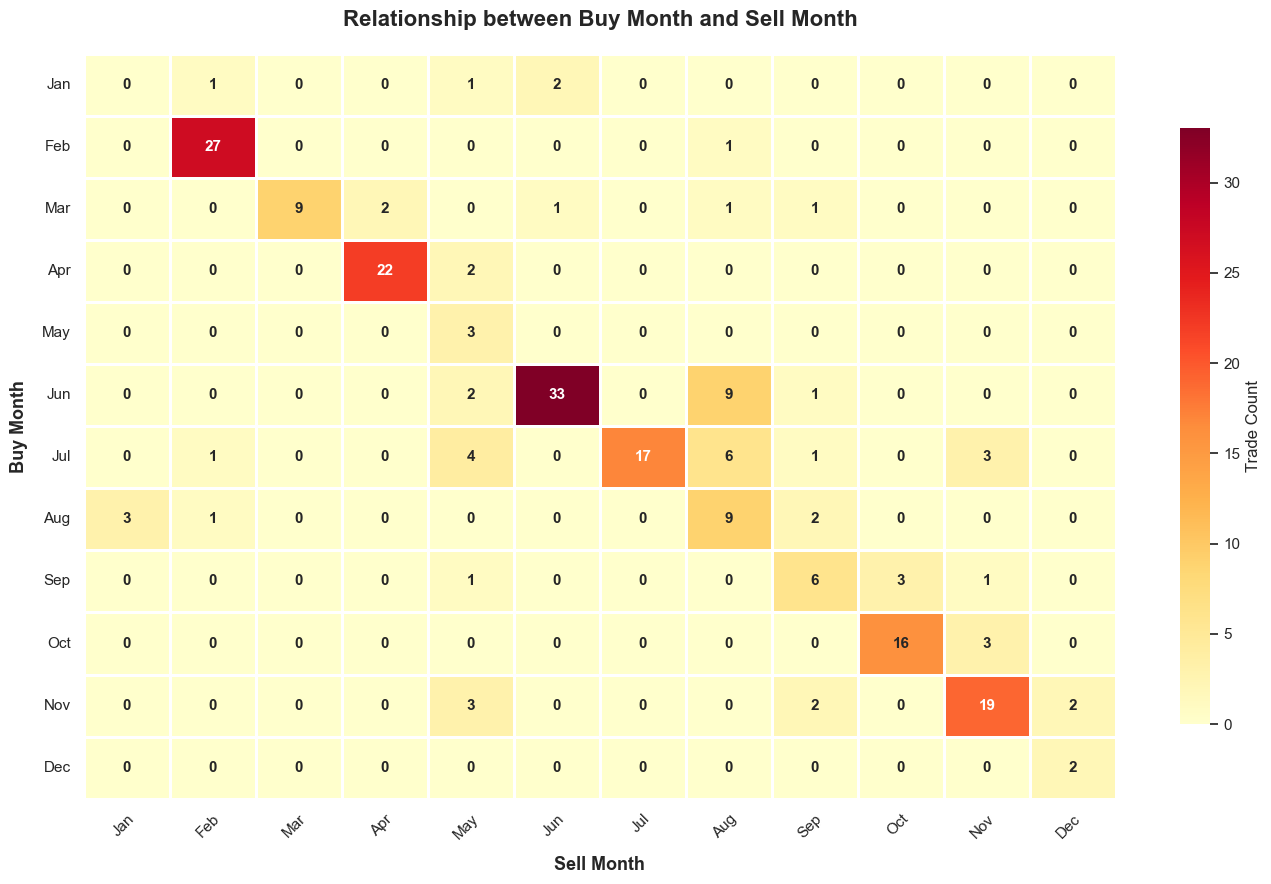

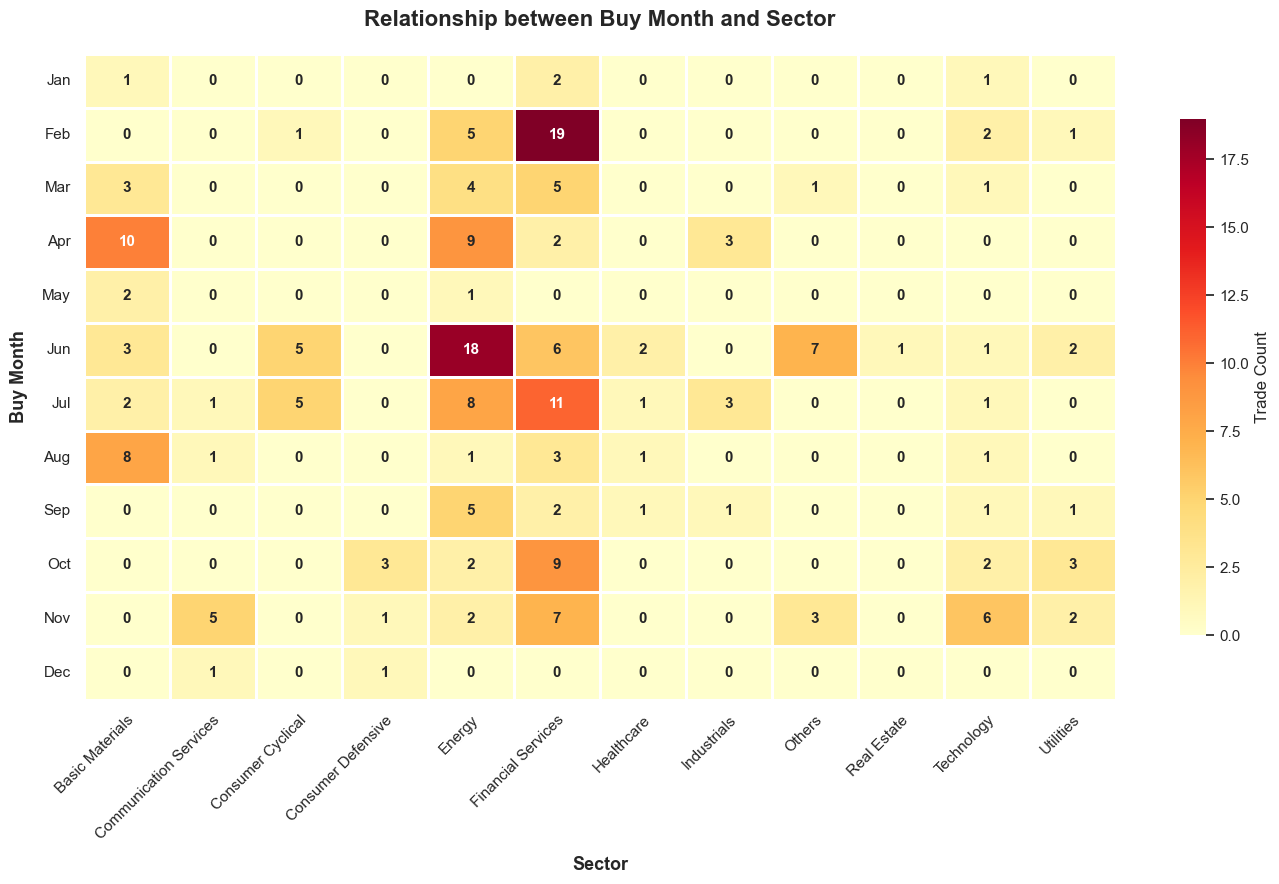

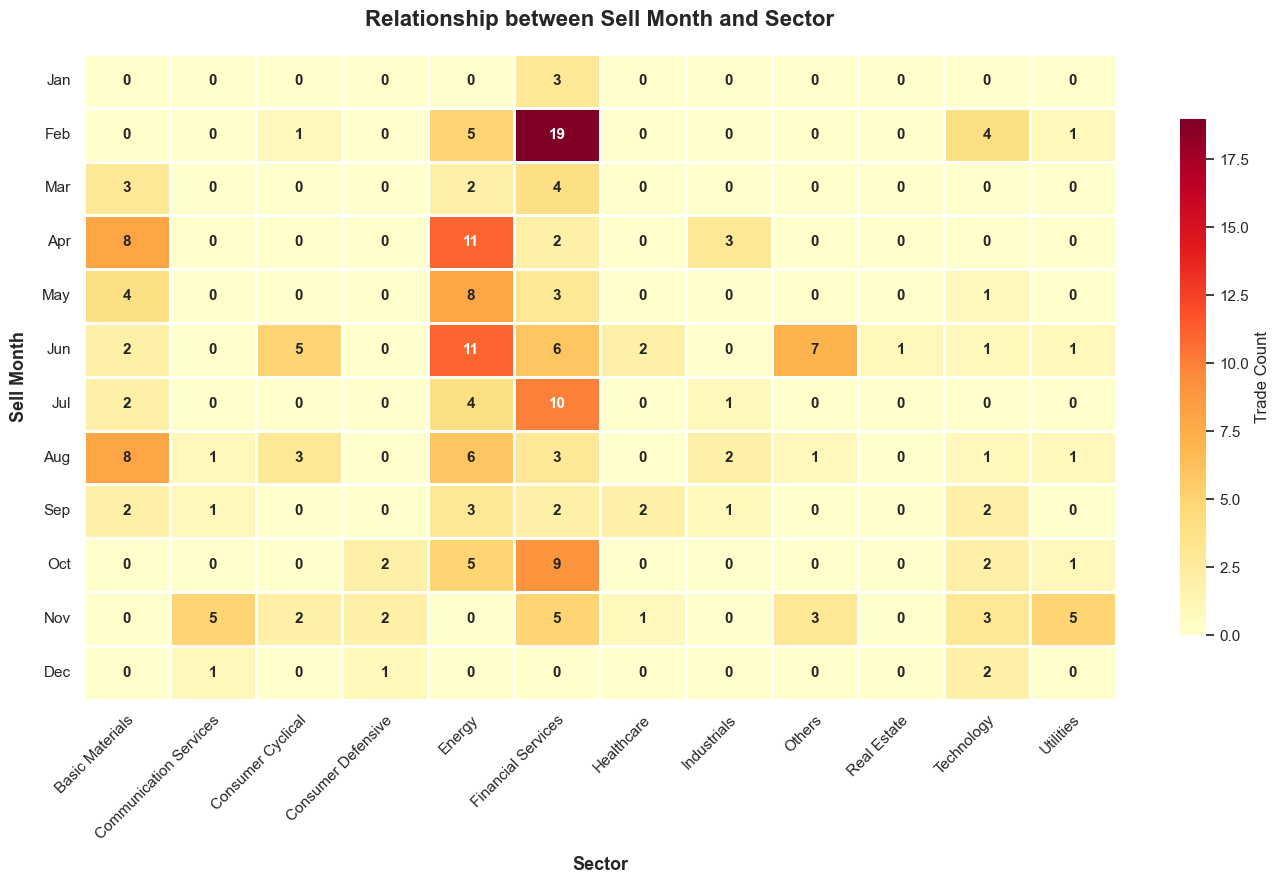

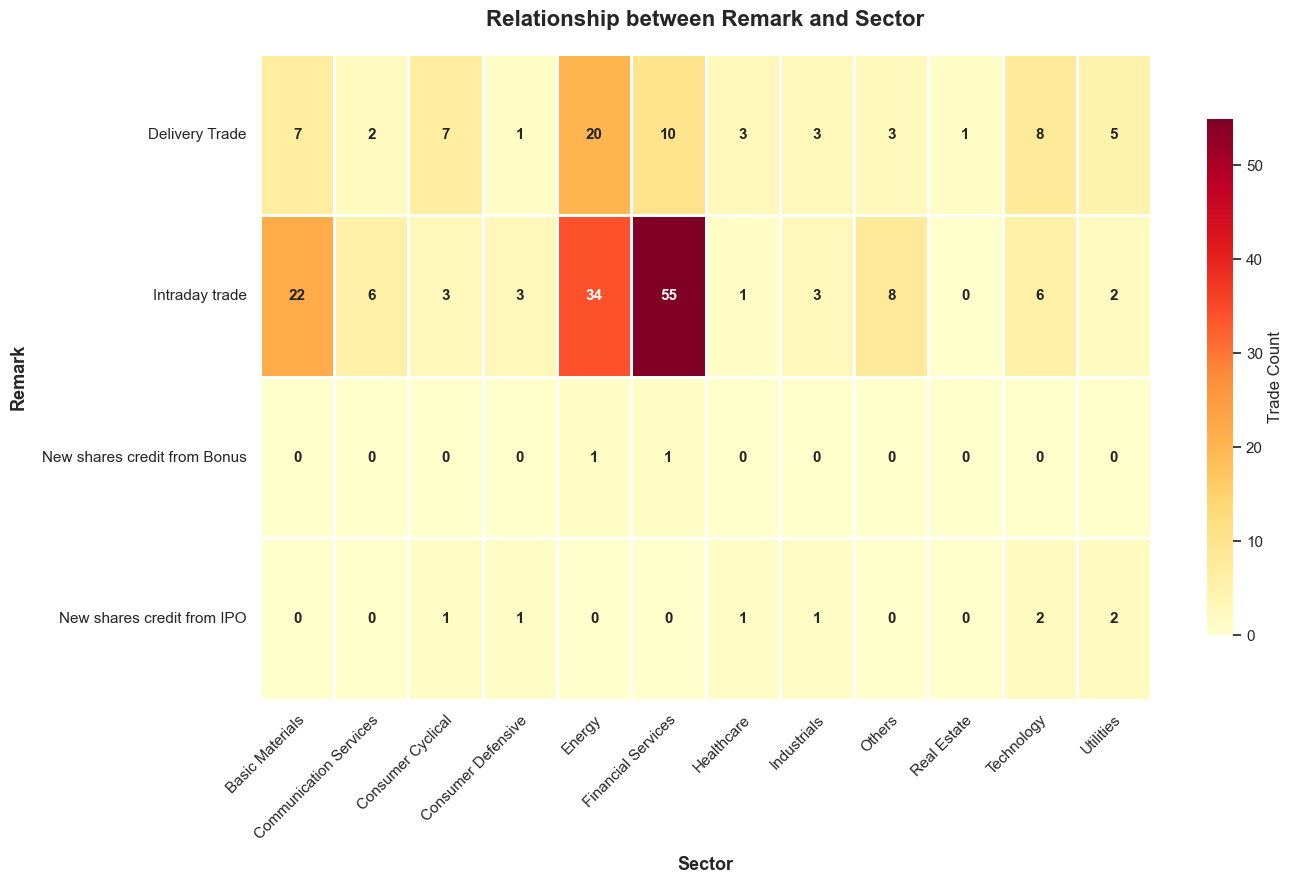

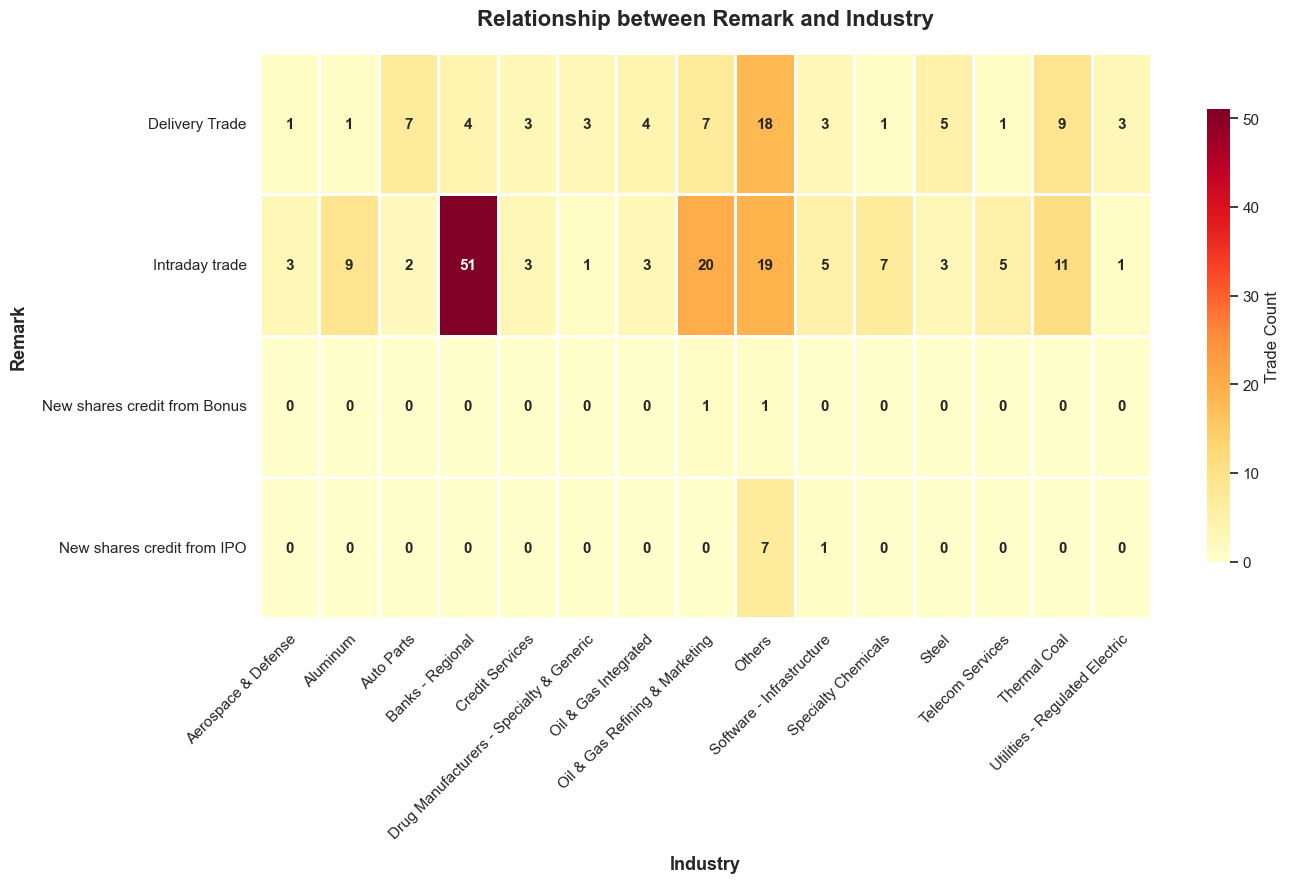

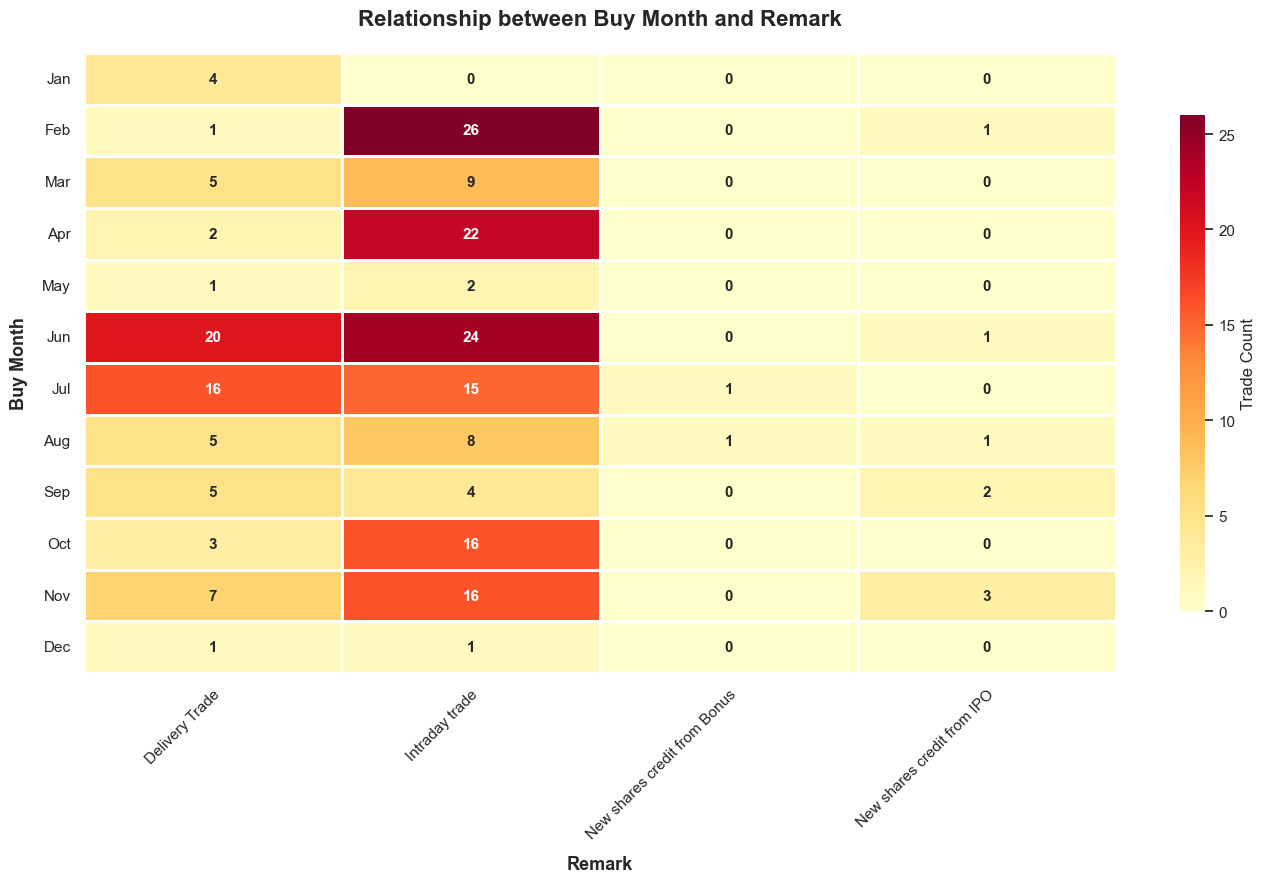

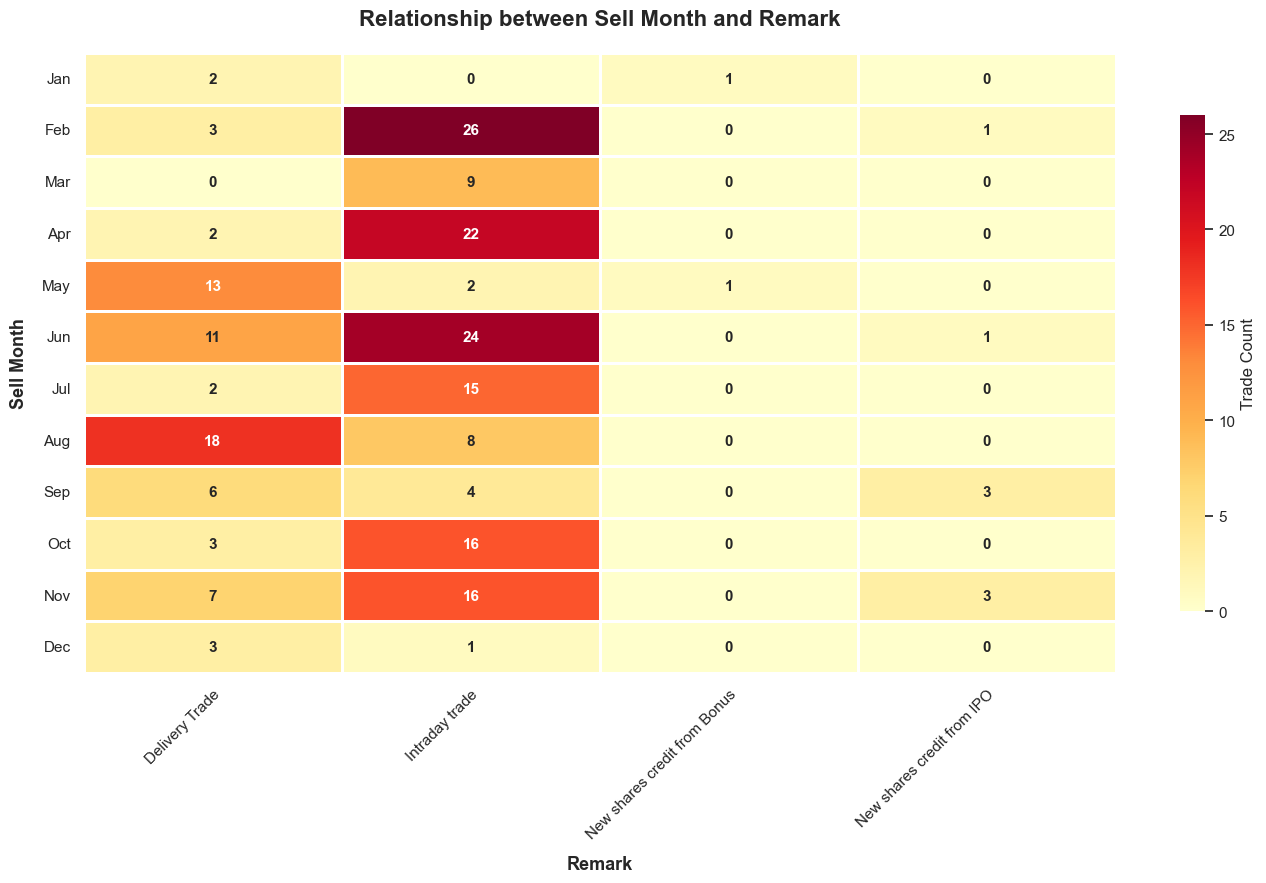

In [30]:
important_pairs = [
    ('Buy Month', 'Sell Month'),
    ('Buy Month', 'Sector'),
    ('Sell Month', 'Sector'),
    ('Remark', 'Sector'),
    ('Remark', 'Industry'),
    ('Buy Month', 'Remark'),
    ('Sell Month', 'Remark')
]

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for col1, col2 in important_pairs:
    if col1 in pnl.columns and col2 in pnl.columns:
        if pnl[col1].nunique() <= 20 and pnl[col2].nunique() <= 20:
            
            if col1 in ['Buy Month', 'Sell Month']:
                pnl_temp = pnl[pnl[col1].isin(month_order)].copy()
                pnl_temp[col1] = pd.Categorical(pnl_temp[col1], categories=month_order, ordered=True)
            else:
                pnl_temp = pnl.copy()
            
            if col2 in ['Buy Month', 'Sell Month']:
                pnl_temp = pnl_temp[pnl_temp[col2].isin(month_order)].copy()
                pnl_temp[col2] = pd.Categorical(pnl_temp[col2], categories=month_order, ordered=True)
            
            cross_tab = pd.crosstab(pnl_temp[col1], pnl_temp[col2])
            
            fig, ax = plt.subplots(figsize=(14, 9))
            
            sns.heatmap(cross_tab, cmap='YlOrRd', annot=True, fmt='d', 
                       linewidths=2, linecolor='white',
                       cbar_kws={'label': 'Trade Count', 'shrink': 0.8},
                       annot_kws={'fontsize': 11, 'fontweight': 'bold'},
                       ax=ax)
            
            ax.set_title(f"Relationship between {col1} and {col2}", 
                        fontsize=16, fontweight='bold', pad=20)
            ax.set_xlabel(col2, fontsize=13, fontweight='bold', labelpad=10)
            ax.set_ylabel(col1, fontsize=13, fontweight='bold', labelpad=10)
            
            ax.tick_params(axis='x', labelsize=11, rotation=45)
            ax.tick_params(axis='y', labelsize=11, rotation=0)
            
            plt.setp(ax.get_xticklabels(), ha='right', rotation_mode='anchor')
            
            plt.tight_layout()
            plt.show()    


--------- These plots...

we can also use the Pandas Profiller to apply the EDA to the User Trade History dataset

In [31]:
from pandas_profiling import ProfileReport
profile = ProfileReport(pnl, title="User Trade History Analysis")
profile.to_file("User Trade History Analysis.html")

C:\Users\kejri\AppData\Local\Temp\ipykernel_22116\1124256442.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\kejri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\ydata_profiling\model\typeset_relations.py:118: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  return pd.to_datetime(series, format="mixed")
C:\Users\kejri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\ydata_profiling\model\typeset_relations.py:118: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `objec

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
pnl.info()
print("\nValue Counts for Each Column:\n")

for col in pnl.columns:
    print(f"--- {col} ---")
    print(pnl[col].value_counts(dropna=False))  # include NaN counts
    print("\n")

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 223
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stock name         223 non-null    object 
 1   ISIN               223 non-null    object 
 2   Quantity           223 non-null    int64  
 3   Buy date           223 non-null    object 
 4   Buy price          223 non-null    float64
 5   Buy value          223 non-null    float64
 6   Sell date          223 non-null    object 
 7   Sell price         223 non-null    float64
 8   Sell value         223 non-null    float64
 9   Realised P&L       223 non-null    float64
 10  Remark             223 non-null    object 
 11  Buy Time           223 non-null    object 
 12  Sell Time          223 non-null    object 
 13  Symbol             223 non-null    object 
 14  Sector             223 non-null    object 
 15  Industry           223 non-null    object 
 16  Buy Year           223 non-null

# Feature Engineering

1. Feature Construction (Manually)

Since the realised profit and loss is not calculating the charges, taxes and brokerages paid by the user to the Broker and Exchange so we will be calculating them. 

In [33]:
# --- Base Values ---
buy_val = pnl['Buy value']
sell_val = pnl['Sell value']
turnover = buy_val + sell_val  # total trade value

# --- Brokerage (0.05% or ₹20 per executed order whichever is lower, both sides combined) ---
pnl['Brokerage'] = (turnover * 0.0005).clip(upper=40)  # Max ₹20 per side (40 total for buy+sell)

# --- Exchange Transaction Charges (NSE EQ: 0.00345%, BSE EQ: ~0.00297%) ---
pnl['Exchange Charges'] = turnover * 0.0000297

# --- SEBI Fees (₹10 per crore) ---
pnl['SEBI Charges'] = turnover * 0.000001

# --- IPF (Investor Protection Fund) ---
pnl['Investor Protection Fund'] = turnover * 0.000001

# --- Initialize other columns ---
pnl['STT'] = 0.0
pnl['Stamp Duty'] = 0.0
pnl['Demat Charges'] = 0.0

# --- Intraday Trades ---
mask_intraday = pnl['Remark'].str.contains('Intraday', case=False, na=False)
pnl.loc[mask_intraday, 'STT'] = sell_val * 0.00025
pnl.loc[mask_intraday, 'Stamp Duty'] = buy_val * 0.00003
pnl.loc[mask_intraday, 'Demat Charges'] = 0.0

# --- Delivery Trades ---
mask_delivery = ~mask_intraday & ~pnl['Remark'].str.contains('IPO', case=False, na=False)
pnl.loc[mask_delivery, 'STT'] = sell_val * 0.001
pnl.loc[mask_delivery, 'Stamp Duty'] = buy_val * 0.00015
pnl.loc[mask_delivery, 'Demat Charges'] = 13.5 * 1.18  # apply GST directly (13.5 + 18%)

# --- IPO Trades ---
mask_ipo = pnl['Remark'].str.contains('IPO', case=False, na=False)
pnl.loc[mask_ipo, 'STT'] = sell_val * 0.001
pnl.loc[mask_ipo, 'Stamp Duty'] = 0.0
pnl.loc[mask_ipo, 'Exchange Charges'] = sell_val * 0.0000297
pnl.loc[mask_ipo, 'SEBI Charges'] = sell_val * 0.000001
pnl.loc[mask_ipo, 'Investor Protection Fund'] = sell_val * 0.000001
pnl.loc[mask_ipo, 'Demat Charges'] = 13.5 * 1.18

# --- GST (18%) ---
# Apply only on Brokerage + Exchange Charges (per GST Act)
pnl['GST'] = (pnl['Brokerage'] + pnl['Exchange Charges']) * 0.18

# --- Total Charges (Sum Everything) ---
pnl['Total Charges'] = (
    pnl['Brokerage'] +
    pnl['Exchange Charges'] +
    pnl['SEBI Charges'] +
    pnl['Investor Protection Fund'] +
    pnl['STT'] +
    pnl['Stamp Duty'] +
    pnl['Demat Charges'] +
    pnl['GST']
).round(2)

pnl['Total Charges'].sum().round(2)

np.float64(3841.64)

Now, let's find the Gross and Net pnl and pnl % to better understand the profits and losses. This will give the idea of overall profits user generates. 

In [34]:
# Calculating the Gross and Net pnl and pnl %
pnl['Gross Realised P&L'] = pnl['Sell value'] - pnl['Buy value']
pnl['Gross Realised PnL %'] = (pnl['Gross Realised P&L'] / pnl['Buy value']) * 100
pnl['Net Realised P&L'] = pnl['Gross Realised P&L'] - pnl['Total Charges']
pnl['Net Realised PnL %'] = (pnl['Net Realised P&L'] / pnl['Buy value']) * 100
pnl = pnl.drop(columns= 'Realised P&L')

Now, let's find the holding period to understand the user's preference and find the most profitable holding period for the user.

In [35]:
# Ensure both date columns are proper datetime objects
pnl['Buy date'] = pd.to_datetime(pnl['Buy date'], errors='coerce')
pnl['Sell date'] = pd.to_datetime(pnl['Sell date'], errors='coerce')

# Now safely calculate holding period
pnl['Holding Period (Days)'] = (pnl['Sell date'] - pnl['Buy date']).dt.days

2. Feature Transformation

Since the name of the stock, ISIN value and the Symbol are all represents the same thing we can drop the Stock name and ISIN value features.

In [36]:
# Drop unnecessary columns (repetitive or identifiers)
pnl = pnl.drop(columns=['Stock name', 'ISIN', 'Symbol'], errors='ignore')

# Drop any duplicate records if exist
pnl = pnl.drop_duplicates()

# Create additional ratio features (optional but useful for ML)
pnl['PnL per Trade Value'] = pnl['Net Realised P&L'] / (pnl['Buy value'] + pnl['Sell value'])
pnl['Buy/Sell Price Ratio'] = pnl['Buy price'] / pnl['Sell price']

# Replace infinite or NaN values with 0
pnl = pnl.replace([np.inf, -np.inf], np.nan).fillna(0)

pnl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 223
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Quantity                  223 non-null    int64         
 1   Buy date                  223 non-null    datetime64[ns]
 2   Buy price                 223 non-null    float64       
 3   Buy value                 223 non-null    float64       
 4   Sell date                 223 non-null    datetime64[ns]
 5   Sell price                223 non-null    float64       
 6   Sell value                223 non-null    float64       
 7   Remark                    223 non-null    object        
 8   Buy Time                  223 non-null    object        
 9   Sell Time                 223 non-null    object        
 10  Sector                    223 non-null    object        
 11  Industry                  223 non-null    object        
 12  Buy Year                  2

Merging the Industry and Sector rows which are not appearing frequently

In [37]:
uncommon_industry = pnl['Industry'].value_counts() 
pnl['Industry'] = pnl['Industry'].replace(uncommon_industry[uncommon_industry < 6].index, 'Others')

uncommon_Sector = pnl['Sector'].value_counts() 
pnl['Sector'] = pnl['Sector'].replace(uncommon_Sector[uncommon_Sector <= 5].index, 'Others')

pnl['Industry'].value_counts()
pnl['Sector'].value_counts()

Sector
Financial Services        66
Energy                    55
Basic Materials           29
Others                    22
Technology                16
Consumer Cyclical         11
Utilities                  9
Communication Services     8
Industrials                7
Name: count, dtype: int64

In [38]:
pnl[['Buy date', 'Buy Day', 'Buy Day of Week', 'Buy Month', 'Buy Year', 'Buy Time', 'Buy Interval', 'Buy Hour', 'Buy Time Minutes', 'Buy Hour Decimal']].head()

Buy date  Buy Day Buy Day of Week Buy Month  Buy Year  Buy Time  \
0 2021-11-25       25        Thursday       Nov      2021  09:23:00   
1 2022-05-30       30          Monday       May      2022  10:29:00   
2 2022-06-02        2        Thursday       Jun      2022  09:34:00   
3 2022-06-03        3          Friday       Jun      2022  13:12:00   
4 2022-06-03        3          Friday       Jun      2022  10:32:00   

  Buy Interval  Buy Hour  Buy Time Minutes  Buy Hour Decimal  
0  09:00-09:30         9             563.0          9.383333  
1  10:00-10:30        10             629.0         10.483333  
2  09:30-10:00         9             574.0          9.566667  
3  13:00-13:30        13             792.0         13.200000  
4  10:30-11:00        10             632.0         10.533333

Now, let's do the train test split the data to apply the scaling and encoding to the train split and apply that same transformation to the test split. Let's encode and scale the features before applying the ML Models 

In [39]:
pnl.shape

['Quantity', 'Buy price', 'Buy value', 'Sell price', 'Sell value', 'Remark', 'Sector', 'Industry', 'Buy Year', 'Buy Month', 'Buy Day', 'Buy Day of Week', 'Sell Year', 'Sell Month', 'Sell Day', 'Sell Day of Week', 'Buy Time Minutes', 'Sell Time Minutes', 'Total Charges', 'Holding Period (Days)', 'PnL per Trade Value']


['Quantity',
 'Buy price',
 'Buy value',
 'Sell price',
 'Sell value',
 'Remark',
 'Sector',
 'Industry',
 'Buy Year',
 'Buy Month',
 'Buy Day',
 'Buy Day of Week',
 'Sell Year',
 'Sell Month',
 'Sell Day',
 'Sell Day of Week',
 'Buy Time Minutes',
 'Sell Time Minutes',
 'Total Charges',
 'Holding Period (Days)',
 'PnL per Trade Value']

In [40]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

# Step 1: Reinitialize encoders with proper settings
ss = StandardScaler()
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Step 2: Remove target and leakage columns

X = pnl[['Quantity', 'Buy price', 'Sell price', 'Remark', 'Sector', 'Industry', 'Buy Year', 'Buy Month', 'Buy Day', 'Buy Day of Week', 'Sell Year', 'Sell Month', 'Sell Day', 'Sell Day of Week', 'Buy Time Minutes', 'Sell Time Minutes', 'Total Charges', 'Holding Period (Days)', 'PnL per Trade Value']]

y = pnl['Net Realised P&L']

# Step 3: Check which columns actually exist in X
print("Available columns in X:")
print(X.columns.tolist())

# Step 4: Define transformers based on existing columns
# Filter to only existing columns

numerical_cols = ['Quantity', 'Buy price', 'Buy value', 'Sell price', 'Sell value', 'Total Charges', 'Holding Period (Days)']
numerical_cols = [col for col in numerical_cols if col in X.columns]

ordinal_cols = ['Buy Year', 'Buy Month', 'Buy Day', 'Buy Day of Week', 
                'Sell Year', 'Sell Month', 'Sell Day', 'Sell Day of Week']
ordinal_cols = [col for col in ordinal_cols if col in X.columns]

categorical_cols = ['Remark', 'Sector', 'Industry']
categorical_cols = [col for col in categorical_cols if col in X.columns]

print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Ordinal columns ({len(ordinal_cols)}): {ordinal_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

Available columns in X:
['Quantity', 'Buy price', 'Sell price', 'Remark', 'Sector', 'Industry', 'Buy Year', 'Buy Month', 'Buy Day', 'Buy Day of Week', 'Sell Year', 'Sell Month', 'Sell Day', 'Sell Day of Week', 'Buy Time Minutes', 'Sell Time Minutes', 'Total Charges', 'Holding Period (Days)', 'PnL per Trade Value']

Numerical columns (5): ['Quantity', 'Buy price', 'Sell price', 'Total Charges', 'Holding Period (Days)']
Ordinal columns (8): ['Buy Year', 'Buy Month', 'Buy Day', 'Buy Day of Week', 'Sell Year', 'Sell Month', 'Sell Day', 'Sell Day of Week']
Categorical columns (3): ['Remark', 'Sector', 'Industry']


Model------

MODEL TRAINING AND EVALUATION

             Model       RMSE        MAE       R²        MAPE
    Random Forest 310.341430 151.052815 0.781968  151.677670
          XGBoost 316.338886 159.139987 0.773459  141.566664
         LightGBM 375.354303 219.595829 0.681049 1790.682010
Gradient Boosting 517.507488 198.419839 0.393718  106.715219
            Ridge 535.113704 261.114527 0.351763 1248.610696
            Lasso 573.222497 263.351497 0.256146 1463.038344

BEST MODEL: Random Forest (R² = 0.7820)


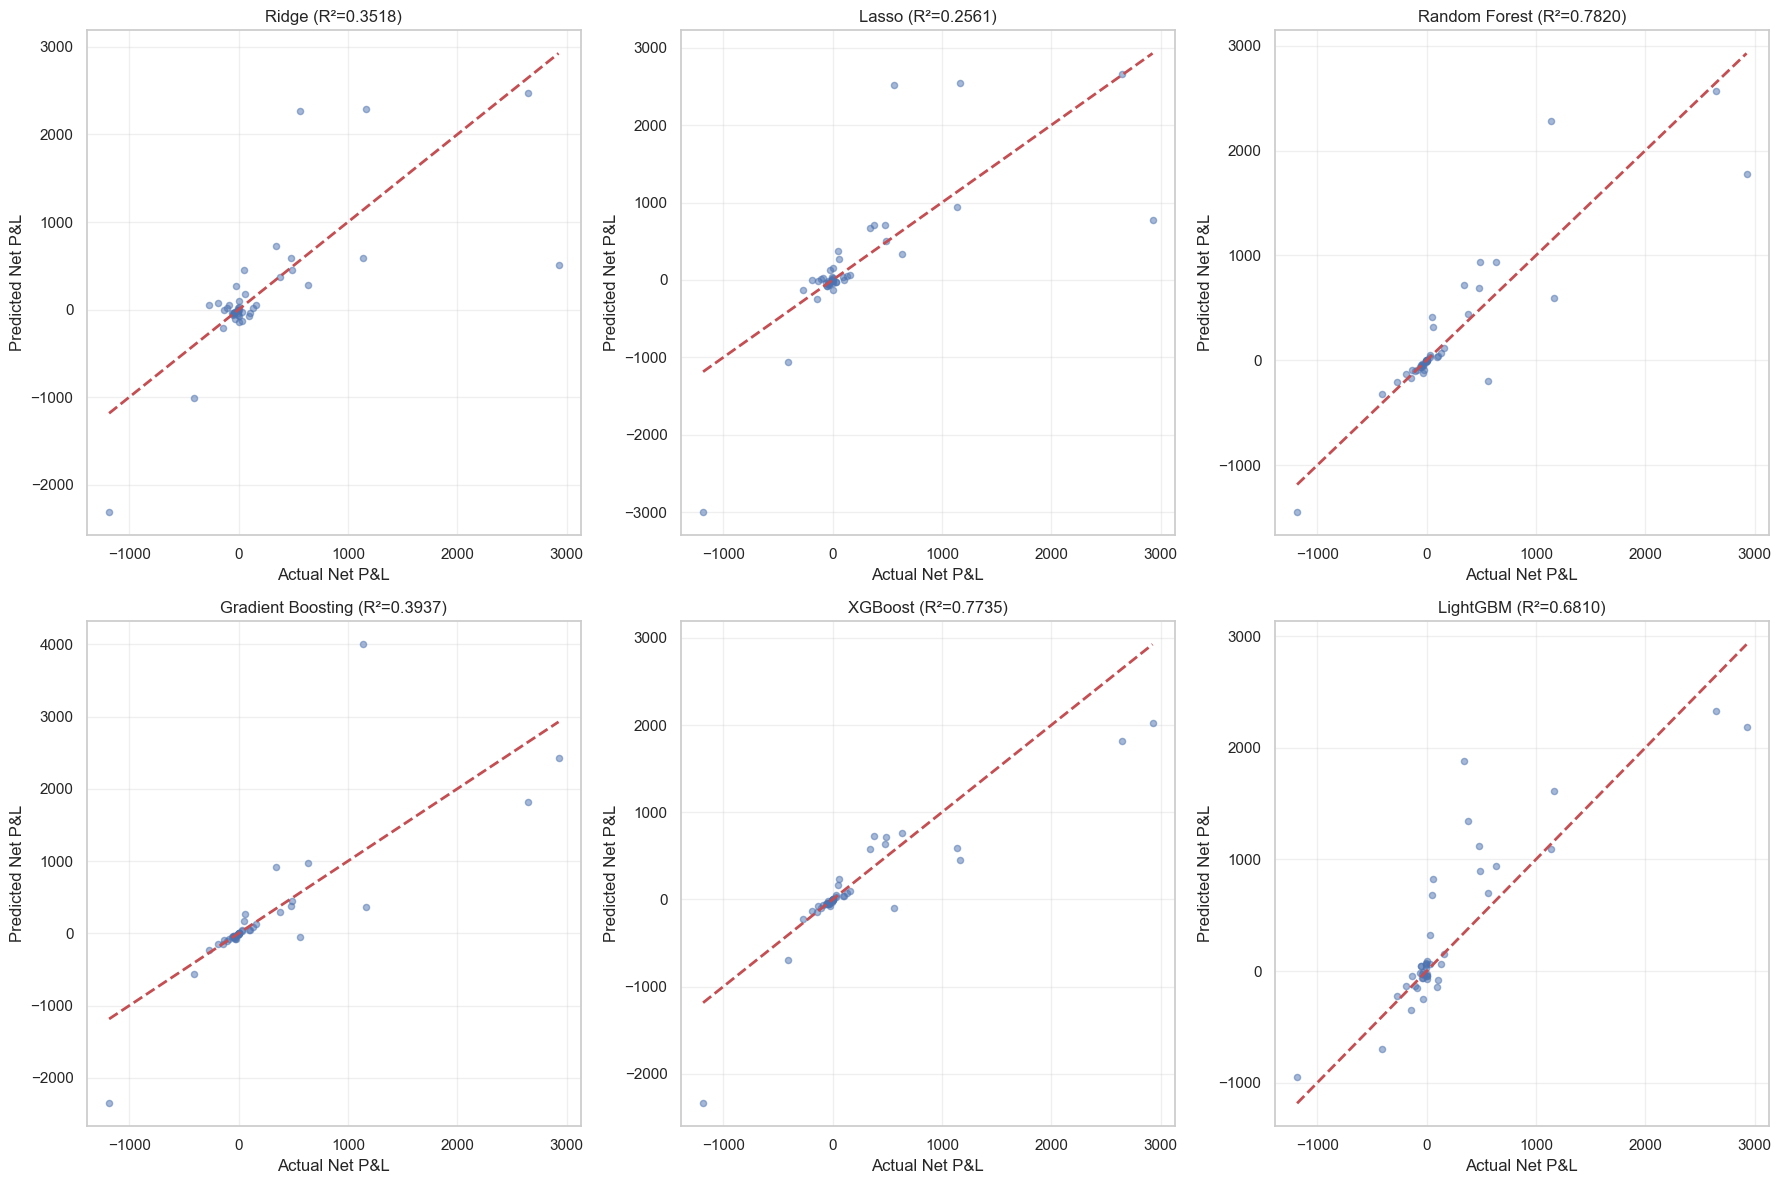


FEATURE IMPORTANCE - Random Forest

Top 20 Features:
                                Feature  Importance
                    PnL per Trade Value    0.544638
                          Total Charges    0.268608
                      Sell Time Minutes    0.061979
                       Buy Time Minutes    0.024793
                               Quantity    0.014927
                  Holding Period (Days)    0.010283
                             Sell price    0.008225
                                Buy Day    0.007563
                               Sell Day    0.007003
                        Industry_Others    0.006862
                       Sell Day of Week    0.005300
                        Buy Day of Week    0.005275
                              Buy price    0.005242
                              Buy Month    0.005080
                             Sell Month    0.004665
Industry_Oil & Gas Refining & Marketing    0.003566
                               Buy Year    0.002936
      Rema

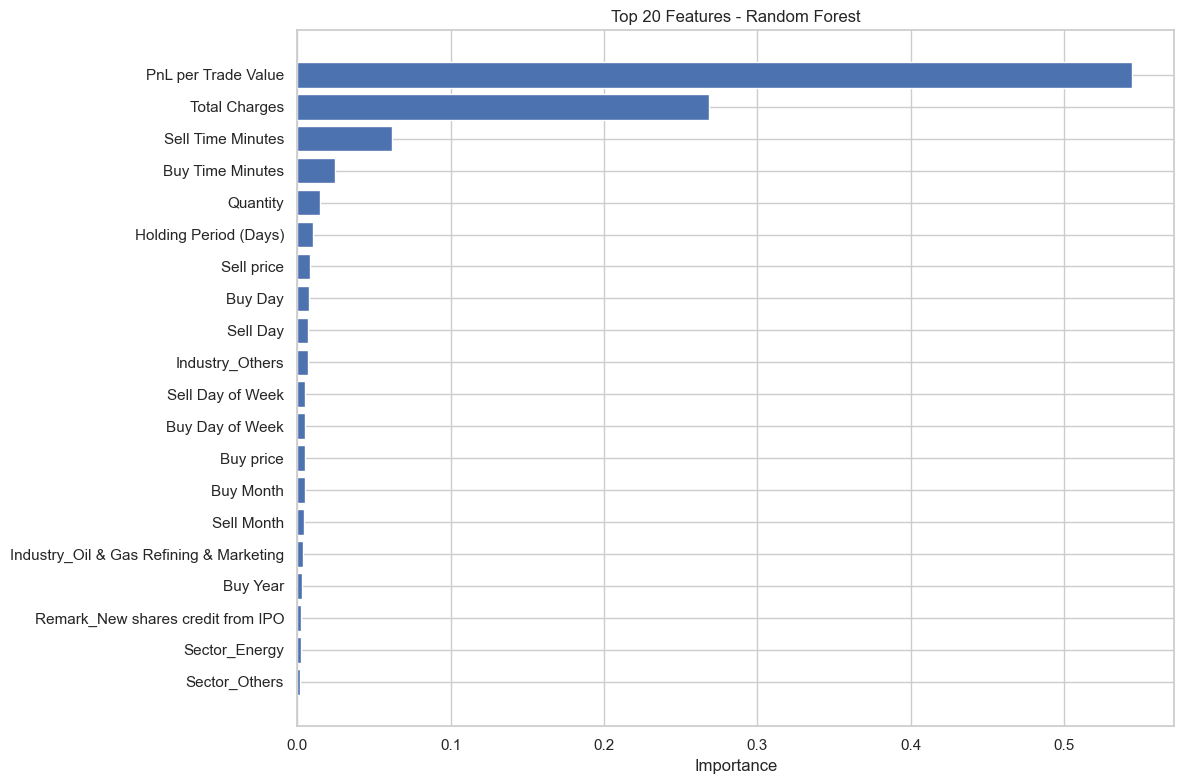


SHAP ANALYSIS

Top 20 Features by SHAP Importance:
                          Feature  SHAP_Importance
              PnL per Trade Value       334.862723
                    Total Charges        85.546416
                         Quantity        15.546208
                 Buy Time Minutes        12.827109
                Sell Time Minutes        11.066751
                  Buy Day of Week         6.999629
            Holding Period (Days)         4.231471
                         Sell Day         3.689110
                        Buy price         3.476990
                          Buy Day         3.148875
                       Sell price         2.919627
                  Industry_Others         2.606035
                       Sell Month         2.513676
                        Buy Month         2.505201
    Industry_Oil & Gas Integrated         2.298427
                 Sell Day of Week         2.074470
Remark_New shares credit from IPO         1.690609
                        Sell Y

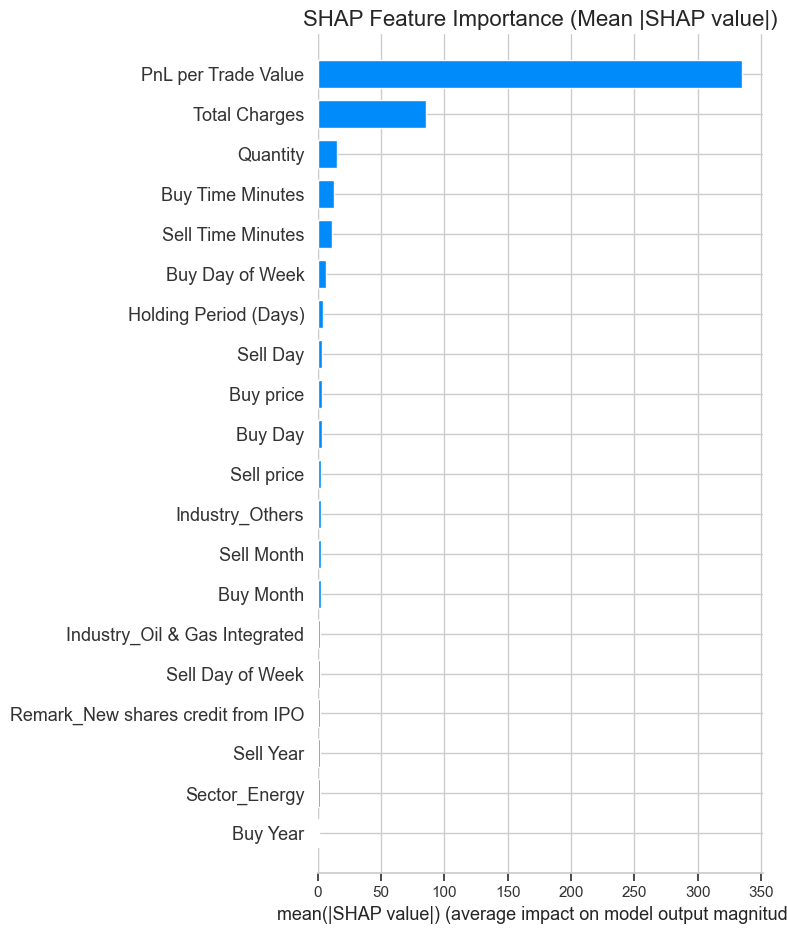

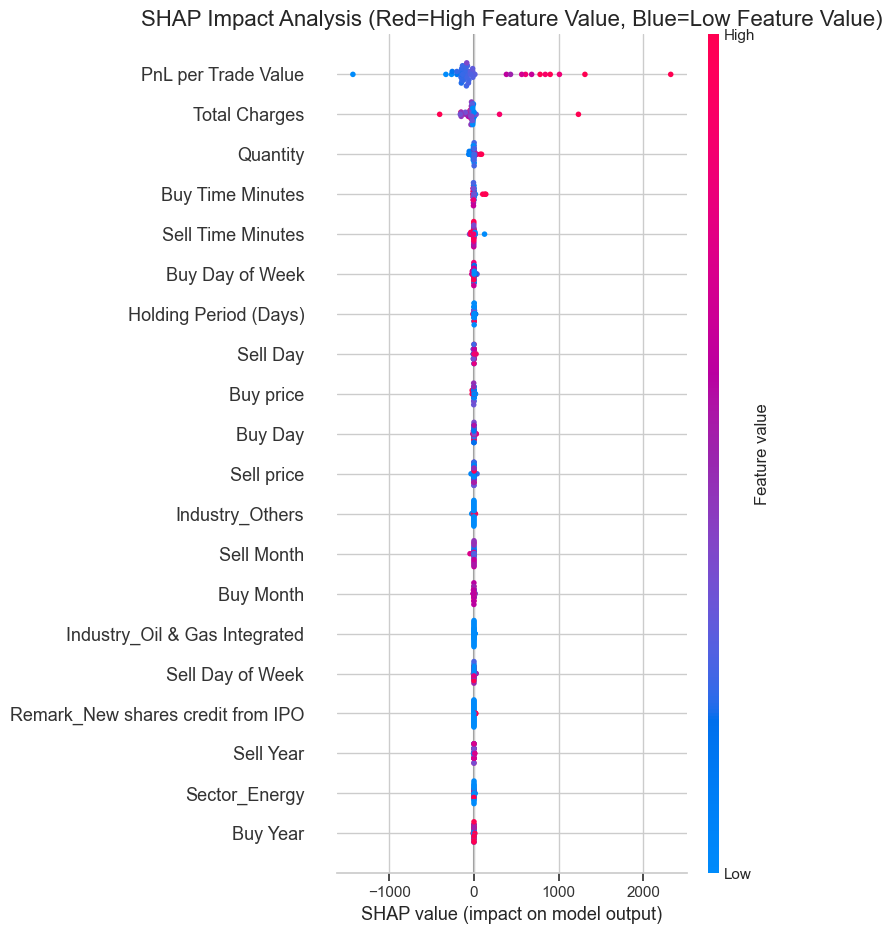

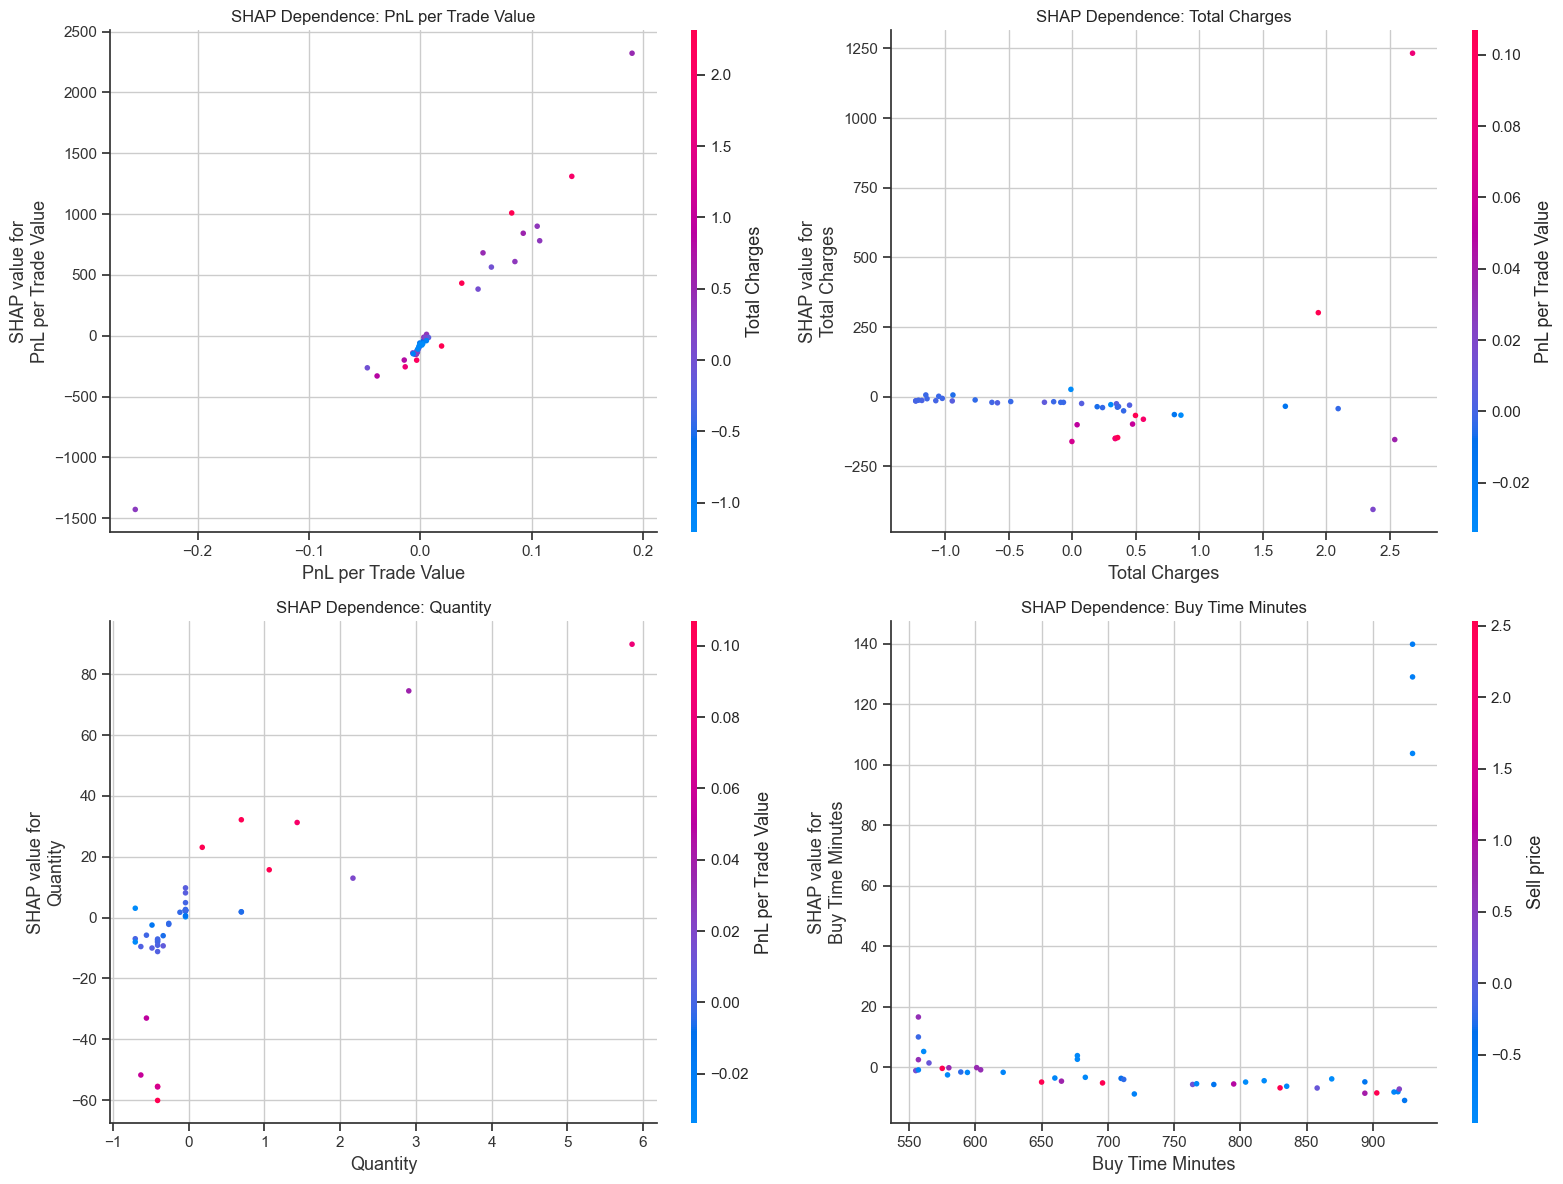

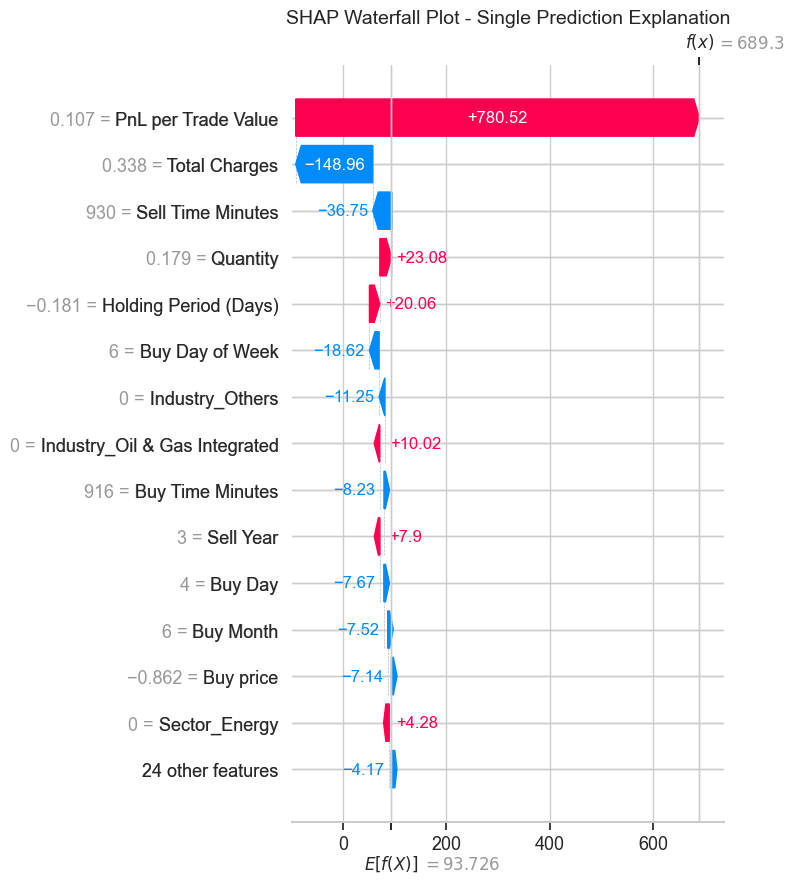


MODEL DEPLOYMENT READY
Best Model: Random Forest
R² Score: 0.7820
Files Saved:
  - best_model_random_forest.pkl
  - column_transformer.pkl


In [41]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import shap
import joblib

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

trfs = [
    ('ohe', ohe, categorical_cols),
    ('oe', oe, ordinal_cols),
    ('ss', ss, numerical_cols)
]

ct = ColumnTransformer(transformers=trfs, remainder='passthrough', verbose_feature_names_out=False)

X_train_trf = ct.fit_transform(X_train)
X_test_trf = ct.transform(X_test)

X_train_trf = pd.DataFrame(X_train_trf, columns=ct.get_feature_names_out())
X_test_trf = pd.DataFrame(X_test_trf, columns=ct.get_feature_names_out())

models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=6, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, n_jobs=-1),
    'LightGBM': LGBMRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, n_jobs=-1, verbose=-1)
}

results = []
trained_models = {}

print("="*80)
print("MODEL TRAINING AND EVALUATION")
print("="*80)

for name, model in models.items():
    model.fit(X_train_trf, y_train)
    y_pred = model.predict(X_test_trf)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test.values - y_pred) / np.where(y_test.values != 0, y_test.values, 1))) * 100
    
    results.append({'Model': name, 'RMSE': rmse, 'MAE': mae, 'R²': r2, 'MAPE': mape})
    trained_models[name] = model

results_df = pd.DataFrame(results).sort_values('R²', ascending=False)
print("\n", results_df.to_string(index=False))

best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_r2 = results_df.iloc[0]['R²']

print(f"\n{'='*80}")
print(f"BEST MODEL: {best_model_name} (R² = {best_r2:.4f})")
print(f"{'='*80}")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test_trf)
    r2 = r2_score(y_test, y_pred)
    
    axes[idx].scatter(y_test, y_pred, alpha=0.5, s=20)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Net P&L')
    axes[idx].set_ylabel('Predicted Net P&L')
    axes[idx].set_title(f'{name} (R²={r2:.4f})')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

tree_models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']
if best_model_name in tree_models:
    print(f"\n{'='*80}")
    print(f"FEATURE IMPORTANCE - {best_model_name}")
    print(f"{'='*80}")
    
    feature_importance = pd.DataFrame({
        'Feature': X_train_trf.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 20 Features:")
    print(feature_importance.head(20).to_string(index=False))
    
    plt.figure(figsize=(12, 8))
    top_n = 20
    plt.barh(feature_importance['Feature'][:top_n], feature_importance['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Features - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

print(f"\n{'='*80}")
print("SHAP ANALYSIS")
print(f"{'='*80}")

if best_model_name in tree_models:
    explainer = shap.TreeExplainer(best_model)
    sample_size = min(100, len(X_test_trf))
    X_sample = X_test_trf.sample(n=sample_size, random_state=42)
    shap_values = explainer.shap_values(X_sample)
else:
    background = shap.sample(X_train_trf, 100)
    explainer = shap.KernelExplainer(best_model.predict, background)
    sample_size = min(50, len(X_test_trf))
    X_sample = X_test_trf.sample(n=sample_size, random_state=42)
    shap_values = explainer.shap_values(X_sample)

shap_importance = pd.DataFrame({
    'Feature': X_sample.columns,
    'SHAP_Importance': np.abs(shap_values).mean(axis=0)
}).sort_values('SHAP_Importance', ascending=False)

print("\nTop 20 Features by SHAP Importance:")
print(shap_importance.head(20).to_string(index=False))

print(f"\n{'='*80}")
print("📊 WHAT THE MODEL ACTUALLY LEARNED (In Plain English)")
print(f"{'='*80}\n")

top_features_shap = shap_importance.head(10)

print("🔍 ANALYZING YOUR TRADING PATTERNS...\n")

for rank, row in enumerate(top_features_shap.iterrows(), 1):
    idx, data = row
    feature = data['Feature']
    importance = data['SHAP_Importance']
    
    feature_idx = list(X_sample.columns).index(feature)
    feature_shap = shap_values[:, feature_idx]
    feature_values = X_sample[feature].values
    
    avg_positive = feature_shap[feature_shap > 0].mean() if (feature_shap > 0).any() else 0
    avg_negative = feature_shap[feature_shap < 0].mean() if (feature_shap < 0).any() else 0
    correlation = np.corrcoef(feature_values, feature_shap)[0, 1]
    
    print(f"{rank}. **{feature.upper()}**")
    
    if 'PnL per Trade Value' in feature or 'PNL' in feature:
        print(f"   💡 This is basically measuring your trade size relative to profit.")
        print(f"   📈 Impact: MASSIVE (score: {importance:.1f})")
        print(f"   🎯 What it means: Your profit per rupee invested is THE most important factor.")
        print(f"      → Better risk-reward ratios = better overall P&L")
    
    elif 'Buy Time' in feature or 'Sell Time' in feature:
        time_type = "ENTRY" if 'Buy' in feature else "EXIT"
        print(f"   ⏰ Your {time_type} timing matters a LOT (score: {importance:.1f})")
        
        if correlation > 0.1:
            print(f"   📈 Pattern detected: Later in the day = MORE profit")
            if 'Buy' in feature:
                print(f"      → You make better decisions after market opens")
                print(f"      → Morning rush trades are hurting you")
            else:
                print(f"      → Holding till later improves your exits")
        elif correlation < -0.1:
            print(f"   📉 Pattern detected: Early timing = MORE profit")
            if 'Buy' in feature:
                print(f"      → Your best entries are in the first 30-60 minutes")
                print(f"      → Late entries are costing you money")
            else:
                print(f"      → Quick exits work better for your style")
        else:
            print(f"   ⚖️ Timing effect is MIXED - depends on the specific trade")
    
    elif 'Holding Period' in feature:
        print(f"   📅 How long you hold positions (score: {importance:.1f})")
        if correlation > 0.15:
            print(f"   📈 CLEAR PATTERN: Longer holds = Better profits")
            print(f"      → You're exiting too early!")
            print(f"      → Let your winners run - patience pays off")
        elif correlation < -0.15:
            print(f"   📉 CLEAR PATTERN: Quick trades = Better profits")
            print(f"      → You're a scalper/day trader at heart")
            print(f"      → Holding overnight is reducing returns")
        else:
            print(f"   ⚖️ No clear pattern - holding period varies by trade type")
    
    elif 'Total Charges' in feature or 'Brokerage' in feature or 'STT' in feature:
        print(f"   💸 Trading costs are KILLING your profits (score: {importance:.1f})")
        print(f"   💰 Average damage: ₹{abs(avg_negative):.2f} per trade")
        print(f"   ⚠️ KEY INSIGHT: You're overtrading or using expensive broker")
        print(f"      → Reduce trade frequency")
        print(f"      → Switch to discount broker if possible")
    
    elif 'Buy price' in feature or 'Sell price' in feature:
        print(f"   💵 Price levels matter (score: {importance:.1f})")
        if 'Buy' in feature:
            if correlation < 0:
                print(f"   📉 Pattern: Lower buy prices = Better returns")
                print(f"      → You're good at buying dips")
            else:
                print(f"   📈 Pattern: Higher buy prices = Better returns")
                print(f"      → Momentum trading works for you")
        else:
            print(f"   📊 Exit price quality affects P&L significantly")
    
    elif 'Sector' in feature:
        sector_name = feature.replace('ohe_', '').replace('Sector_', '').replace('_', ' ')
        print(f"   🏢 {sector_name.upper()} sector performance (score: {importance:.1f})")
        if avg_positive > abs(avg_negative):
            print(f"   ✅ This sector is PROFITABLE for you (+₹{avg_positive:.2f} avg)")
            print(f"      → Trade more in this sector")
        else:
            print(f"   ❌ This sector is HURTING you (-₹{abs(avg_negative):.2f} avg)")
            print(f"      → Avoid or reduce exposure here")
    
    elif 'Industry' in feature:
        industry_name = feature.replace('ohe_', '').replace('Industry_', '').replace('_', ' ')
        print(f"   🏭 {industry_name.upper()} industry (score: {importance:.1f})")
        if avg_positive > abs(avg_negative):
            print(f"   ✅ Strong performance: +₹{avg_positive:.2f} average")
        else:
            print(f"   ❌ Weak performance: -₹{abs(avg_negative):.2f} average")
    
    elif 'Quantity' in feature:
        print(f"   📦 Position size impact (score: {importance:.1f})")
        print(f"   💡 Larger positions amplify both wins AND losses")
        if correlation > 0:
            print(f"      → Bigger positions = better overall returns")
            print(f"      → You might be sizing too small")
        else:
            print(f"      → Bigger positions = worse returns")
            print(f"      → You're over-leveraging")
    
    elif 'Day of Week' in feature:
        day_name = feature.split('_')[-1] if '_' in feature else 'Unknown'
        print(f"   📆 {day_name} trading pattern (score: {importance:.1f})")
        if avg_positive > 30:
            print(f"   ✅ BEST DAY: Average +₹{avg_positive:.2f}")
        elif avg_negative < -30:
            print(f"   ❌ WORST DAY: Average -₹{abs(avg_negative):.2f}")
    
    else:
        print(f"   📊 Significant factor (score: {importance:.1f})")
    
    print()

print(f"{'='*80}")
print("🎯 FINAL ACTIONABLE INSIGHTS")
print(f"{'='*80}\n")

insights = []

charges_features = [f for f in shap_importance['Feature'] if 'Charges' in f or 'Brokerage' in f or 'STT' in f]
if charges_features:
    total_charges_impact = shap_importance[shap_importance['Feature'].isin(charges_features)]['SHAP_Importance'].sum()
    if total_charges_impact > 15:
        insights.append("💸 **Your losses mainly come from high brokerage/charges.**")
        insights.append("   → Switch to discount broker or reduce trade frequency\n")

buy_time_features = [f for f in X_sample.columns if 'Buy' in f and ('Time' in f or 'Hour' in f or 'Interval' in f)]
if buy_time_features:
    feature_idx = list(X_sample.columns).index(buy_time_features[0])
    time_values = X_sample.iloc[:, feature_idx].values
    time_shap = shap_values[:, feature_idx]
    
    early_trades = time_values < np.percentile(time_values, 33)
    late_trades = time_values > np.percentile(time_values, 67)
    
    early_impact = time_shap[early_trades].mean()
    late_impact = time_shap[late_trades].mean()
    
    if early_impact > late_impact + 20:
        insights.append("⏰ **You consistently profit more in early morning trades.**")
        insights.append("   → Focus on first 1-2 hours after market open\n")
    elif late_impact > early_impact + 20:
        insights.append("⏰ **Afternoon trades show better profitability.**")
        insights.append("   → Avoid morning rush, trade after 11 AM\n")

sector_features = [f for f in shap_importance['Feature'][:10] if 'Sector' in f or 'Industry' in f]
if len(sector_features) >= 2:
    insights.append("🏢 **Certain sectors are hurting your P&L.**")
    insights.append("   → Check which sectors have negative SHAP values above\n")

holding_features = [f for f in X_sample.columns if 'Holding Period' in f]
if holding_features:
    hp_idx = list(X_sample.columns).index(holding_features[0])
    hp_corr = np.corrcoef(X_sample.iloc[:, hp_idx].values, shap_values[:, hp_idx])[0, 1]
    
    if hp_corr < -0.2:
        insights.append("⏱️ **Holding too long is reducing your profits.**")
        insights.append("   → Exit faster, don't let winners turn into losers\n")
    elif hp_corr > 0.2:
        insights.append("⏱️ **You exit too early - longer holds improve returns.**")
        insights.append("   → Be patient, let trends play out\n")

if insights:
    for insight in insights:
        print(insight)
else:
    print("📊 Model shows mixed patterns - profitability depends on combination of factors")

print(f"\n{'='*80}")
print("✅ ANALYSIS COMPLETE - Now you know EXACTLY what drives your P&L!")
print(f"{'='*80}")

plt.figure(figsize=(14, 8))
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False, max_display=20)
plt.title("SHAP Feature Importance (Mean |SHAP value|)", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
shap.summary_plot(shap_values, X_sample, show=False, max_display=20)
plt.title("SHAP Impact Analysis (Red=High Feature Value, Blue=Low Feature Value)", fontsize=16)
plt.tight_layout()
plt.show()

top_features = shap_importance.head(4)['Feature'].tolist()
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    feature_idx = list(X_sample.columns).index(feature)
    shap.dependence_plot(feature_idx, shap_values, X_sample, ax=axes[idx], show=False)
    axes[idx].set_title(f"SHAP Dependence: {feature}", fontsize=12)

plt.tight_layout()
plt.show()

sample_idx = 0
plt.figure(figsize=(20, 3))
shap.waterfall_plot(shap.Explanation(values=shap_values[sample_idx], 
                                      base_values=explainer.expected_value,
                                      data=X_sample.iloc[sample_idx],
                                      feature_names=X_sample.columns.tolist()),
                    max_display=15, show=False)
plt.title(f"SHAP Waterfall Plot - Single Prediction Explanation", fontsize=14)
plt.tight_layout()
plt.show()

joblib.dump(best_model, f'best_model_{best_model_name.replace(" ", "_").lower()}.pkl')
joblib.dump(ct, 'column_transformer.pkl')

print(f"\n{'='*80}")
print("MODEL DEPLOYMENT READY")
print(f"{'='*80}")
print(f"Best Model: {best_model_name}")
print(f"R² Score: {best_r2:.4f}")
print(f"Files Saved:")
print(f"  - best_model_{best_model_name.replace(' ', '_').lower()}.pkl")
print(f"  - column_transformer.pkl")
print(f"{'='*80}")

In [42]:
# Insights generator: plug this in and run after you have
# shap_importance (DataFrame), shap_values (shap.Explanation or np.array), X_sample (DataFrame)
import numpy as np
import pandas as pd
import textwrap

def generate_detailed_insights(shap_importance, shap_values, X_sample, top_n=15):
    """
    Prints extremely detailed, user-friendly insights derived from SHAP output.
    - shap_importance: DataFrame with columns ['Feature','SHAP_Importance'] (sorted desc)
    - shap_values: shap.Explanation object OR numpy array (samples x features)
    - X_sample: DataFrame used to compute SHAP values (columns align with shap values)
    - top_n: how many top features to analyze in detail
    """
    # Normalize shap_values to numeric array
    if hasattr(shap_values, "values"):
        shap_array = np.array(shap_values.values)
    else:
        shap_array = np.array(shap_values)
    # Safety checks
    assert shap_array.shape[1] == X_sample.shape[1], "Feature count mismatch between shap_values and X_sample"

    # Select top features
    top_df = shap_importance.head(top_n).reset_index(drop=True)

    sep = "=" * 80
    print(f"\n{sep}")
    print("📊 WHAT THE MODEL ACTUALLY LEARNED (IN PLAIN ENGLISH)")
    print(sep + "\n")

    print("🔍 ANALYZING YOUR TRADING PATTERNS...\n")

    def safe_corr(a, b):
        try:
            if np.std(a) == 0 or np.std(b) == 0:
                return 0.0
            c = np.corrcoef(a, b)[0, 1]
            if np.isnan(c):
                return 0.0
            return float(c)
        except Exception:
            return 0.0

    def clean_name(name):
        # make feature display name human friendly
        s = name
        s = s.replace("ohe_", "").replace("oe_", "")
        s = s.replace("_", " ").replace(".", " ").strip()
        return s

    for rank, row in top_df.iterrows():
        feature = row['Feature']
        impact = row['SHAP_Importance']
        try:
            feat_idx = list(X_sample.columns).index(feature)
        except ValueError:
            # fallback attempt: match by cleaned name
            matches = [i for i, c in enumerate(X_sample.columns) if feature.lower() in c.lower()]
            feat_idx = matches[0] if matches else None

        if feat_idx is None:
            continue

        feature_shap = shap_array[:, feat_idx]
        feature_values = X_sample.iloc[:, feat_idx].values

        avg_pos = feature_shap[feature_shap > 0].mean() if (feature_shap > 0).any() else 0.0
        avg_neg = feature_shap[feature_shap < 0].mean() if (feature_shap < 0).any() else 0.0
        corr = safe_corr(feature_values.astype(float, copy=False), feature_shap)

        display_name = clean_name(feature)
        print(f"{rank+1}. {display_name.upper()} (impact score: {impact:.4f})")

        # Core interpretation rules (prioritized)
        lname = display_name.lower()

        # PnL and trade-value related features
        if 'pnl' in lname or 'per trade value' in lname or 'trade value' in lname:
            print(textwrap.indent(
                "• What this means: This feature measures profit scaled to trade size. "
                "High importance here means your returns are strongly tied to how much capital you risk per trade.",
                '   '))
            print(textwrap.indent(f"• Typical effect: Avg positive contribution = ₹{avg_pos:.2f}, avg negative = ₹{abs(avg_neg):.2f}", '   '))
            print(textwrap.indent("• Suggested action: normalize position sizing, compute expected P&L per unit exposure, and avoid very small-profit setups where charges eat gains.", '   '))

        # Time features (Buy/Sell/Hour/Interval)
        elif any(k in lname for k in ['buy time', 'sell time', 'buy hour', 'sell hour', 'interval', 'hour']):
            which = "ENTRY (buy)" if 'buy' in lname else ("EXIT (sell)" if 'sell' in lname else "TIME")
            print(textwrap.indent(f"• What this means: {which} timing influences outcomes. SHAP shows timing changes push predictions up/down.", '   '))
            print(textwrap.indent(f"• Correlation with SHAP: {corr:.3f}", '   '))
            if corr > 0.12:
                print(textwrap.indent("• Pattern: Later times tend to increase expected P&L for these trades. You might be better at letting the market settle before entering/exiting.", '   '))
                print(textwrap.indent("• Action: Shift more entries/exits into the later time buckets where your historical edge exists.", '   '))
            elif corr < -0.12:
                print(textwrap.indent("• Pattern: Earlier times correlate with higher expected P&L — your edge is in the open/first-hour moves.", '   '))
                print(textwrap.indent("• Action: Prioritize first-hour setups and reduce trades in low-edge hours.", '   '))
            else:
                print(textwrap.indent("• Pattern: Mixed effect — timing matters in combination with other features (e.g., sector, charges).", '   '))
                print(textwrap.indent("• Action: Use a rule: only trade at these times if other conditions (sector, charges) are favorable.", '   '))

        # Holding period
        elif 'holding' in lname or 'hold' in lname:
            print(textwrap.indent("• What this means: How long you keep a position changes profit expectation.", '   '))
            print(textwrap.indent(f"• Correlation with SHAP: {corr:.3f}", '   '))
            if corr > 0.18:
                print(textwrap.indent("• Pattern: Longer holds = better profits. You currently cut winners too early.", '   '))
                print(textwrap.indent("• Action: Consider trailing stops and give winning trades more runway.", '   '))
            elif corr < -0.18:
                print(textwrap.indent("• Pattern: Short/quick exits = better profits. You are effectively a scalper.", '   '))
                print(textwrap.indent("• Action: Avoid overnight or multi-day holds unless the edge is strong.", '   '))
            else:
                print(textwrap.indent("• Pattern: No single holding duration dominates — success depends on trade context.", '   '))

        # Charges related
        elif any(k in lname for k in ['charge', 'brokerage', 'stt', 'gst', 'total charges', 'stamp duty', 'demat']):
            print(textwrap.indent("• What this means: Transaction costs are directly reducing your Net P&L.", '   '))
            print(textwrap.indent(f"• Typical drag: avg negative SHAP contribution = ₹{abs(avg_neg):.2f}", '   '))
            print(textwrap.indent("• Pattern: Even otherwise profitable trades often flip to losses after charges.", '   '))
            print(textwrap.indent("• Action: (1) Reduce trade frequency, (2) increase per-trade target to justify cost, (3) consider a lower-cost broker for scalping.", '   '))

        # Price-related
        elif any(k in lname for k in ['buy price', 'sell price', 'price ratio', 'buy/sell price', 'price']):
            print(textwrap.indent("• What this means: Entry/exit price levels strongly affect realized return.", '   '))
            if 'buy' in lname:
                if corr < -0.12:
                    print(textwrap.indent("• Pattern: Lower buy price (buying dips) yields better returns.", '   '))
                    print(textwrap.indent("• Action: Focus on confirmed support zones and use limit entries.", '   '))
                elif corr > 0.12:
                    print(textwrap.indent("• Pattern: Higher buy prices (momentum entries) work better for you.", '   '))
                    print(textwrap.indent("• Action: Use breakout confirmation rules; avoid buying weak pullbacks.", '   '))
                else:
                    print(textwrap.indent("• Pattern: Mixed — combine price signals with momentum/volume filters.", '   '))
            else:
                print(textwrap.indent("• Exit price quality strongly determines P&L — good exits = bigger realized profits.", '   '))
                print(textwrap.indent("• Action: Improve exit rules (targets + trailing stops) and avoid emotional exits.", '   '))

        # Sector / Industry
        elif 'sector' in lname or 'industry' in lname:
            pretty = display_name.replace('sector', '').replace('industry', '').strip()
            print(textwrap.indent(f"• What this means: This categorical feature measures sector/industry-specific performance.", '   '))
            print(textwrap.indent(f"• Avg contribution when positive = ₹{avg_pos:.2f}; when negative = ₹{abs(avg_neg):.2f}", '   '))
            if abs(avg_pos) > abs(avg_neg):
                print(textwrap.indent(f"• Pattern: {pretty} tends to be profitable for you historically.", '   '))
                print(textwrap.indent("• Action: Consider increasing exposure or allocating a focused watchlist for this sector.", '   '))
            else:
                print(textwrap.indent(f"• Pattern: {pretty} underperforms — it often reduces your Net P&L.", '   '))
                print(textwrap.indent("• Action: Reduce position size or avoid this sector unless setup quality is exceptional.", '   '))

        # Quantity
        elif 'quantity' in lname or 'position size' in lname:
            print(textwrap.indent("• What this means: Position size amplifies both profit and loss.", '   '))
            print(textwrap.indent(f"• Correlation with SHAP: {corr:.3f}", '   '))
            if corr > 0.08:
                print(textwrap.indent("• Pattern: Larger sizes historically correlated with better returns — you size up when confident.", '   '))
                print(textwrap.indent("• Action: Keep a disciplined sizing rule (e.g., % of equity or volatility-based sizing).", '   '))
            else:
                print(textwrap.indent("• Pattern: Larger sizes amplify mistakes and often lead to worse outcomes.", '   '))
                print(textwrap.indent("• Action: Cap max position size and scale into positions instead of going all-in.", '   '))

        # Day of week / other
        elif 'day' in lname or 'weekday' in lname:
            print(textwrap.indent("• What this means: The day of week correlates with your edge (emotional cycles, news cadence).", '   '))
            print(textwrap.indent(f"• Avg positive contribution = ₹{avg_pos:.2f}; avg negative = ₹{abs(avg_neg):.2f}", '   '))
            print(textwrap.indent("• Action: Track day-wise P&L and avoid low-edge days.", '   '))

        else:
            # Generic fallback
            print(textwrap.indent("• What this means: This feature significantly influences predicted P&L in your history.", '   '))
            print(textwrap.indent(f"• Avg positive contribution = ₹{avg_pos:.2f}; avg negative = ₹{abs(avg_neg):.2f}", '   '))
            print(textwrap.indent("• Action: Investigate this feature in combination with others to form rules (e.g., time + sector + charges).", '   '))

        print()  # blank line between features

    # -------------------------
    # Aggregated actionable insights
    # -------------------------
    print(sep)
    print("🎯 FINAL ACTIONABLE INSIGHTS (PRIORITIZED)")
    print(sep + "\n")

    insights = []

    # Charges summary
    charges_keys = [f for f in shap_importance['Feature'] if any(k in f.lower() for k in ['charge', 'brokerage', 'stt', 'gst', 'total charges', 'stamp', 'demat'])]
    if charges_keys:
        ch_imp = shap_importance[shap_importance['Feature'].isin(charges_keys)]['SHAP_Importance'].sum()
        if ch_imp > 0.8 * shap_importance['SHAP_Importance'].sum() * 0.15:  # heuristic
            insights.append(("Costs are a major drag", [
                "Your average realized profit is being reduced materially by transaction costs.",
                "Prioritize trades where expected gross P&L >> total charges (target net margin).",
                "For scalping, charges must be < X% of expected edge — otherwise skip.",
                "Consider a lower-cost broker or reduce trade frequency."
            ]))

    # Timing summary (use first buy-time-like column if exists)
    buy_time_cols = [c for c in X_sample.columns if 'buy' in c.lower() and ('time' in c.lower() or 'hour' in c.lower() or 'interval' in c.lower())]
    if buy_time_cols:
        idx = X_sample.columns.tolist().index(buy_time_cols[0])
        time_vals = X_sample.iloc[:, idx].values
        time_shap = shap_array[:, idx]
        early_mask = time_vals <= np.percentile(time_vals, 33)
        late_mask = time_vals >= np.percentile(time_vals, 67)
        early_avg = time_shap[early_mask].mean() if early_mask.any() else 0
        late_avg = time_shap[late_mask].mean() if late_mask.any() else 0
        if early_avg > late_avg + abs(early_avg)*0.2:
            insights.append(("Morning edge", [
                "You perform best in the morning window.",
                "Allocate more capital and focus to the first 60–90 minutes of trading.",
                "Avoid late-day trades unless other conditions are ideal."
            ]))
        elif late_avg > early_avg + abs(late_avg)*0.2:
            insights.append(("Afternoon edge", [
                "You perform better later in the session — market settlement benefits you.",
                "Consider filters that reduce early volatility exposure.",
                "Schedule watchlists for setups after 11:00 AM."
            ]))

    # Holding period summary
    hold_cols = [c for c in X_sample.columns if 'holding' in c.lower() or 'hold' in c.lower()]
    if hold_cols:
        idx = X_sample.columns.tolist().index(hold_cols[0])
        hp_corr = safe_corr(X_sample.iloc[:, idx].values.astype(float), shap_array[:, idx])
        if hp_corr > 0.18:
            insights.append(("Be more patient with winners", [
                "Longer holds tend to increase profits — you're likely cutting winners early.",
                "Use trailing stops that scale out over time rather than fixed tight targets.",
                "Backtest a 2x–3x holding horizon to see improvement in realized gains."
            ]))
        elif hp_corr < -0.18:
            insights.append(("Shorter holds suit you", [
                "You are better at short-term scalps; long holds reduce performance.",
                "Avoid overnight positions and favor intraday strategies.",
                "Keep targets tight and exits mechanical."
            ]))

    # Sector summary
    sector_feats = [f for f in shap_importance['Feature'] if 'sector' in f.lower() or 'industry' in f.lower()]
    if sector_feats:
        pos = []
        neg = []
        for f in sector_feats:
            try:
                i = list(X_sample.columns).index(f)
            except ValueError:
                continue
            shp = shap_array[:, i]
            if np.nanmean(shp[shp>0]) > abs(np.nanmean(shp[shp<0])):
                pos.append(f)
            else:
                neg.append(f)
        if neg:
            insights.append(("Sector caution", [
                f"Some sectors (e.g., {', '.join([clean_name(x) for x in neg[:3]])}) have negative historic impact.",
                "Limit exposure or require stricter entry rules in these sectors.",
                "Build sector-specific rules or skip these sectors unless the setup is exceptionally strong."
            ]))
        if pos:
            insights.append(("Sector opportunity", [
                f"Some sectors (e.g., {', '.join([clean_name(x) for x in pos[:3]])}) have historically helped your returns.",
                "Create a watchlist focused on these sectors and optimize position sizing around them."
            ]))

    # Quantity / sizing
    qty_cols = [c for c in X_sample.columns if 'quantity' in c.lower() or 'position' in c.lower() or 'size' in c.lower()]
    if qty_cols:
        idx = list(X_sample.columns).index(qty_cols[0])
        corr_qty = safe_corr(X_sample.iloc[:, idx].values.astype(float), shap_array[:, idx])
        if corr_qty < -0.1:
            insights.append(("Size discipline needed", [
                "Larger sizes amplify losses — enforce max position size limits.",
                "Use volatility-adjusted sizing or fixed percent risk per trade."
            ]))
        else:
            insights.append(("Sizing works", [
                "Your sizing tends to correlate with higher returns — continue disciplined scaling."
            ]))

    # Print prioritized insights
    if insights:
        for title, bullets in insights:
            print(f"🔸 {title.upper()}")
            for b in bullets:
                print("   -", b)
            print()
    else:
        print("📊 Model shows mixed patterns — no single high-confidence recommendation. Consider collecting more data and re-evaluating after fresh trades.\n")

    print(sep)
    print("✅ ANALYSIS COMPLETE — these are concrete, prioritized actions you can apply today.")
    print(sep + "\n")

    # Return structured insights for programmatic use if needed
    structured = {
        "top_features": top_df,
        "aggregated_insights": insights
    }
    return structured

# Example usage:
structured_out = generate_detailed_insights(shap_importance, shap_values, X_sample, top_n=15)


📊 WHAT THE MODEL ACTUALLY LEARNED (IN PLAIN ENGLISH)

🔍 ANALYZING YOUR TRADING PATTERNS...

1. PNL PER TRADE VALUE (impact score: 334.8627)
   • What this means: This feature measures profit scaled to trade size. High importance here means your returns are strongly tied to how much capital you risk per trade.
   • Typical effect: Avg positive contribution = ₹820.25, avg negative = ₹158.36
   • Suggested action: normalize position sizing, compute expected P&L per unit exposure, and avoid very small-profit setups where charges eat gains.

2. TOTAL CHARGES (impact score: 85.5464)
   • What this means: Transaction costs are directly reducing your Net P&L.
   • Typical drag: avg negative SHAP contribution = ₹58.32
   • Pattern: Even otherwise profitable trades often flip to losses after charges.
   • Action: (1) Reduce trade frequency, (2) increase per-trade target to justify cost, (3) consider a lower-cost broker for scalping.

3. QUANTITY (impact score: 15.5462)
   • What this means: Pos